In [22]:
import csv
import time
import pandas as pd
import numpy as np
import re
import string
# for using counter
import collections
# for visualisations
import matplotlib
import matplotlib.pyplot as plt
# from __future__ import print_function
# import sys
# print(sys.executable)

## Introduction

The following is a Project on 'how an individual can leverage data available over social media such as Twitter'. 
The types of analysis that we could perform such as:
* Select a Subject or topic of discussion (for us this is **Cambridge Analytics issue faced by Facebook**) 
* Mood classification or Sentimenet analysis 
* geospatial analysis and other forms of intuitive visualisations

For ultimately being able to better communicating results to stakeholders. This is a growing feild of study and research by policy, psychology and science students.

There are several parts to this tutorial but largely we could divide them into three parts:
* Access Twitter API
    * Authentication (oauth2)
    * Pagination
    * Rate Limiting
* Simple Sentiment Analysis (using TextBlob or our own classifier)
* Geo-Spatial Analysis

(**Note:** references used to develp code chunks would be provided above the chunk along with description)

## Authentication

Most large web scale companies use a combination of authentication and rate limiting to control access to their data to ensure that everyone using it abides by them. Twitter uses the oauth2 authentication and hence we will go forward to apply for a developer account.

## Twitter API Access

**1.** Create a Twitter Account (if you dont have one already)

**2.** Go [here](https://apps.twitter.com/app/new) and log in. 

**3.** In 'Application Management' - 'Create an Application'. Enter 'Name', 'Description' & 'Website' (can be dummy)

## Authentication

Most large web scale companies use a combination of authentication and rate limiting to control access to their data to ensure that everyone using it abides by them. Twitter uses the oauth2 authentication and hence we will go forward to apply for a developer account.

## Twitter API Access

**1.** Create a Twitter Account (if you dont have one already)

**2.** Go [here](https://apps.twitter.com/app/new) and log in. 

**3.** In 'Application Management' - 'Create an Application'. Enter 'Name', 'Description' & 'Website' (can be dummy)

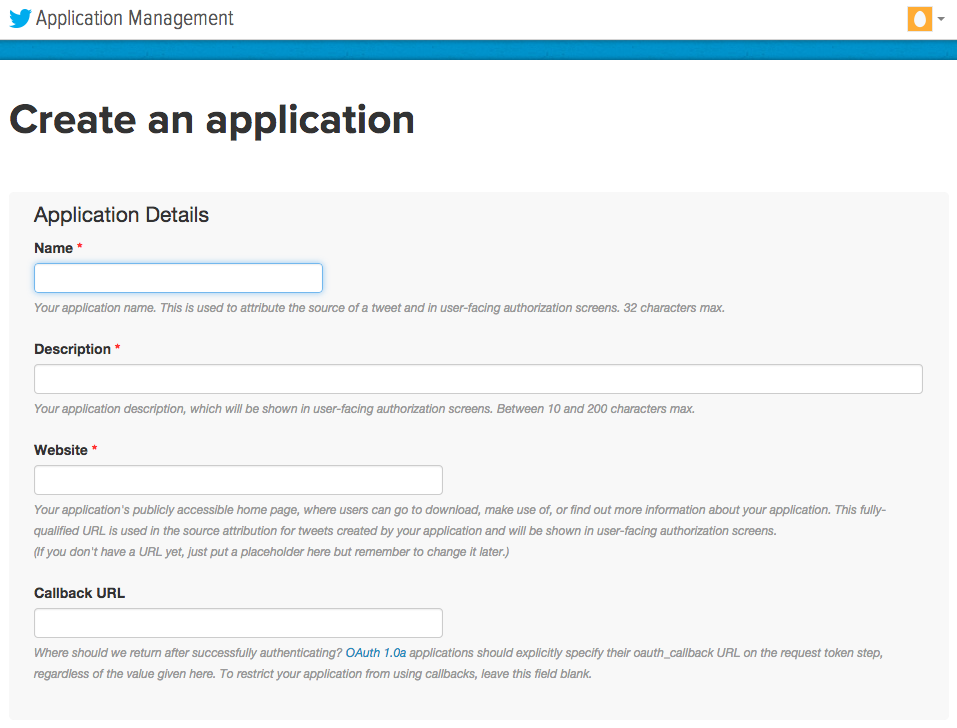

**4.** Accept the Terms of Service and click 'Create the application'

**5.** Go to 'Keys and Access Tokens'. Scroll down and select 'Create my Access Tokens' to get the Access key and Secret as well

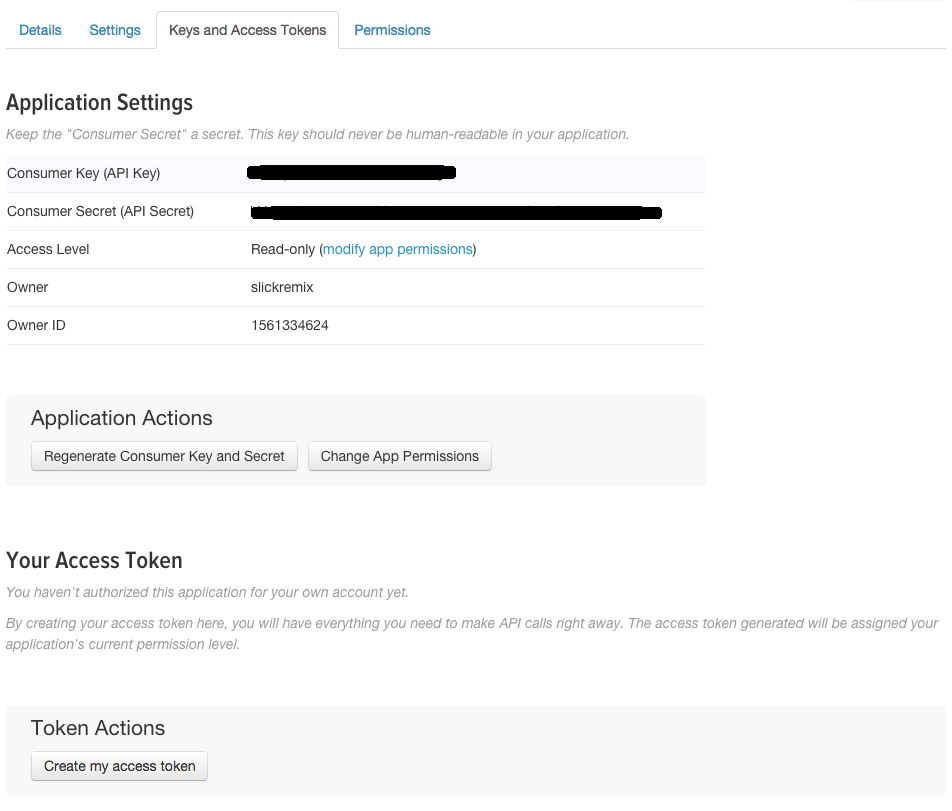

**6.** Save the keys in one file (as shown below) and access (or extract) them using the below function:

![snapshot%20of%20the%20folder%201.JPG](attachment:snapshot%20of%20the%20folder%201.JPG)

```python
>>> print(api_key, api_secret, access_token_key, access_token_secret)

api_key = "your_api_key"
api_secret = "your_api_secret"
access_token_key = "your_access_token_key"
access_token_secret = "your_access_token_secret"
```

In [3]:
def read_api_key(filepath):
    """
    Read the Twitter API Key information from file.
    Args:
        filepath (string): File containing all the API/Access Key & Secret
    Returns:
        api_key (string): The API Key
        api_secret (string): The API Secret
        access_token_key (string): The Access Token Key
        access_token_secret (string): The Access Token secret
        
    """
    with open(filepath, 'r') as f:
        store_text_file = f.read()
        api_key = re.findall(r'api_key = "(\w+)"', str(store_text_file))[0]
        api_secret = re.findall(r'api_secret = "(\w+)"', str(store_text_file))[0]
        access_token_key = re.findall(r'access_token_key = "(\w+-\w+)"', str(store_text_file))[0]
        access_token_secret = re.findall(r'access_token_secret = "(\w+)"', str(store_text_file))[0]
    return (api_key, api_secret, access_token_key, access_token_secret)     
    
api_key, api_secret, access_token_key, access_token_secret = read_api_key("secret document.txt")

## Twitter API

We will first explore 'Twitter' by simply exploring the **request** library. The procedure is as mentoined below:
* First 'API key & secret' and encode in the ASCII  format
* Use the **base64** library to encode the the key.
* Authorization in the 'headers' parameters where we pass this encoded key (along with some other parameters).
* Check for Status (200 OK) and keys that we can use from data response (access_token).
* Extract the tweets
* Our observations from 'studying the tweets'

Source:

* [References 1](https://speca.io/speca/twitter-rest-api-v1.1)
* References 2 : Influence used from a prior idea that we had in Practical Data Science course

(**Note:** This is a simple User Authentication that permits 180 requests per 15 mins and maximum 100 tweets per each)

In [4]:
import oauth2 as oauth
import base64
import requests
import json

In [5]:
key_secret = '{}:{}'.format(api_key, api_secret).encode('ascii')
b64_encoded_key = base64.b64encode(key_secret)
b64_encoded_key = b64_encoded_key.decode('ascii')

In [6]:
url = '{}oauth2/token'.format('https://api.twitter.com/')

headers = {
    'Authorization': 'Basic {}'.format(b64_encoded_key),
    'Content-Type': 'application/x-www-form-urlencoded;charset=UTF-8'
}

data = {
    'grant_type': 'client_credentials'
}

auth_resp = requests.post(url, headers=headers, data=data)
print('Status Code (check) : ',auth_resp.status_code)
print('Keys in data response : ', auth_resp.json().keys())

Status Code (check) :  200
Keys in data response :  dict_keys(['token_type', 'access_token'])


### Lets Extract tweets:

* Simply re-use the tokens access tokens as in above. Here the **json** library can be put to work.
* Create a 'Search Parameter' with the following keys:
    * 'search query' as 'facebook'
    * 'language' as 'en' (ISO format)
    * 'result' as 'popular' (can be 'mixed' or 'recent' as well)
    * 'count of tweets' as 5 (to sample, maximum can be 100)

In [7]:
access_token = auth_resp.json()['access_token']
search_headers = {
    'Authorization': 'Bearer {}'.format(access_token)    
}

search_params = {
    'q': 'facebook',
    'lang': 'en',
    'result_type': 'popular',
    'count': 5
}

url = '{}1.1/search/tweets.json'.format('https://api.twitter.com/')

search_resp = requests.get(url, headers=search_headers, params=search_params)
tweet_data = search_resp.json()
for x in tweet_data['statuses']:
    print(x['text'])
    print(" ------------------------------ ")

Surrounded by police on all sides, tracked by a helicopter, a group of young Black women come face the face w/ deat… https://t.co/KyAMGv0zLV
 ------------------------------ 
Tory chair @BrandonLewis defended decision to reinstate racist Pendle councillor. Apparently she meant to delete th… https://t.co/xE8rjwk9qe
 ------------------------------ 
Black women move bags to car as they leave an AirBnB. Cops lock down neighborhood, bring in helicopter. White neigh… https://t.co/bK9jpnkFvj
 ------------------------------ 
Did Mark Zuckerberg lie to Congress? Damning new evidence show models derived from Facebook data not deleted as Zuc… https://t.co/62XHTxg68f
 ------------------------------ 
WhatsApp co-founder Jan Koum is leaving Facebook after clashing over data privacy https://t.co/iQ0y6ksGji https://t.co/8oHRWoHAZ5
 ------------------------------ 


### Observation from exploring above tweets

We can observe the following:
* Several tweets are not being able to process and are getting cut-out from the text, this is because of the charachter limit.
* Once we save this text on-to a csv like file several white spaces (tabs, newlines, etc.) will ruin the formatting of our table
* There is alot of unecessary text like emoticons, links, hastags, slangs etc. in our tweets text that we do not require
* We have displayed 5 popular tweets related to the search  There are a few caveats to pagination, rate limiting and ultimately authentication (user & application) that make a difference to the way we approach the problem

## Access Twitter using 'Tweepy' 

As we have discussed above 'user authentication' has its own limitations. "Tweepy" is a well known twitter library that has been developed which will increase the request to 450 per 15 minuites. It gives fexibillity to user to better manage **pagination** & **rate limiting** (wait_on_rate_limit & wait_on_rate_limit_notify). It returns a simple json, that can be easily parsed and information can be extracted.

We would like to attempt to access twitter using 'tweepy' and extract a small sample of 5 tweets to analyse its working. Also, get the 'full text' of the tweet and not use incomplete tweets going forward.

(**Note:** For more information on Tweepy, please click on the [link](http://docs.tweepy.org/en/v3.5.0/).



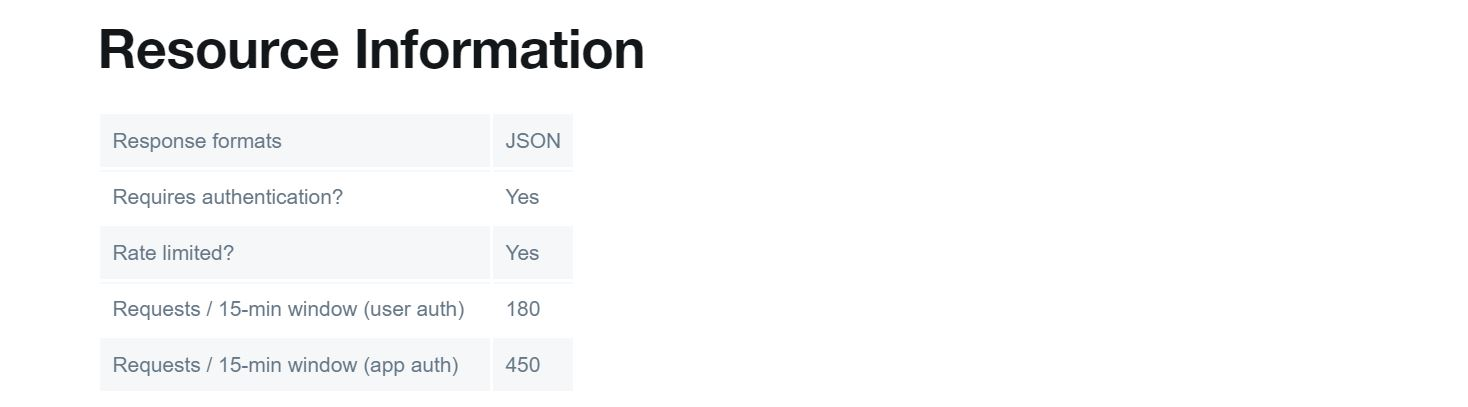

Source:

[Reference 1](https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets)

In [8]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import Stream
from tweepy import OAuthHandler

In [9]:
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token_key, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [10]:
fetched_tweets = api.search(q = 'facebook', lang='en', tweet_mode="extended", show_user=True, count = 5)
for one_tweet in fetched_tweets:
    print(one_tweet.full_text)
    print(" ----------------- ")

Retweeted #RealTalkWithAnele 6pm SABC3 (@RealTalkOn3):

After being rejected 3years @AudioTheBrand - Fezile Dhlamini then decided to push his own start-up, Green Scooter. Tonight he joins us on... https://t.co/3WrEsSRRQR
 ----------------- 
RT @KerryThomas20: I’ve been emailing the link to my friends and family who are not on twitter &amp; Facebook asking them to sign. I encourage…
 ----------------- 
RT @blroperchick: Hey Twitter, I’m starting my own business making custom rodeo shirts! I will be making them and posting them for sale and…
 ----------------- 
RT @INorBY2020: Live Stream on Facebook from 1950s Battlebus 8 May 2018 12.15 with Michael Mansfield QC. @BBCnews @ITVnews @channel4 @Skyne…
 ----------------- 
RT @ArtyLMSN: Top10 Facebook Growth Rate @ 7 May 18
1 #PunBNK48 +2391
2 #CherprangBNK48 +1502
3 #NoeyBNK48 +1421
4 #OrnBNK48 +1299
5 #Music…
 ----------------- 


### Observation from exploring tweets

We can observe the following:
* Manage 'retweeted tweets', as they are incomplete even after using (tweet_mode='extended') which was supposed to get the complete tweet text but did not :(.
* We still need to clean the text to read the feilds in our csvfile (tabs, newlines, etc.), which might ruin the formatting of our table and prevent us from performing our tasks.
* There is still alot of noise in our text like links, emoticons, hastags, punctuations etc.

Lets create the following:
* Cleaning tweets function: that will deal with our point 2 and 3 above.
* Code that maintain retweets as well and saves other feilds to a csv file. 

In [12]:
def clean_my_tweets(text_tweet):
    # convert into lower space
    check_text = text_tweet.lower()
    # strip /n from the lines in the text
    check_text = check_text.strip()
    # replace - with spaces
    new_str = check_text.replace("-", " ")
    # replace 's with null
    new_str = new_str.replace("'s", "")
    # replace ' with blank
    new_str = new_str.replace("'", "")
    # replace " with blank
    new_str = new_str.replace('"', "")
    # replace . with blank (beacuse countries are sometimes abbreviated using the same)
    new_str = new_str.replace('.', "")
    # remove mentions such as @realdonaltrump, managing mentions
    new_str = re.sub(r"@[\w]+", " ", new_str)
    # remove hashtags such as #deletefacebook
    new_str = re.sub(r"#[\w]+", " ", new_str)
    # remove urls such as https://t.co/nxIgrc3hdi
    new_str = re.sub(r"http\S+", " ", new_str)
    # replace any punctuation using import string.punctuation also removes special charachters
    for c in string.punctuation:
        new_str = new_str.replace(c, " ")
    # replace all types of white spaces : matches any whitespace character \r \n \t \f \v
    text_content = re.sub(r"\s+", " ", new_str)
    return text_content

Run the below test cases for tweets (cleaning them)

In [13]:
# print(clean_my_tweets("*On, Facebook* --- ' ~!@#$%^&*`_+=;|  oianc's \n \n Girl : Tell me something that I don't know."))
# print(clean_my_tweets("https://t.co/nxIgrc3hdi oianc's \n \n @realdonaltrump : Tell me something that I don't know. "))
# print(clean_my_tweets("#deletefacebook Tell me I'm confused, What to do ... ???  https://t.co/nxIgrc3hdi "))
# print(clean_my_tweets("""zuckerberg so we censor conservatives, regulate me ... https://t.co/ois0endefq right 
#             facebook = dashboard for cia/nsa, cambridge analytics junk, but good  left hrc &amp; bho. #qanon right, fb value 
#             heads down, down @realdonaldtrump https://t.co/lsk6klryll"""))
print(clean_my_tweets("""mark zuckerberg new the power of facebook. we know immigrants/cannot legally participate in the  
             election process, (ask foxnews about mexican immigrants) zuck offered the  whole emotion changing ad  
             campaign machine to the russian/u.k./mercers analytics. peanut money for a coup https://t.co/0nbbnswsry"""))

mark zuckerberg new the power of facebook we know immigrants cannot legally participate in the election process ask foxnews about mexican immigrants zuck offered the whole emotion changing ad campaign machine to the russian uk mercers analytics peanut money for a coup 


## Tweepy 'Cursor' versus 'Search'

Tweepy has three functionalities to extract data:
* Cursor
* Search
* Stream Listner

We will demonstrate 2 and not include stream listner as it will be a repetition of first two and the usage does not change.
The difference exists in the use cases, how each may be useful solution to adop as per a particular problem statement.

### Tweepy 'Cursor'

The cursor is a recently implemented functionality and is supposed to bring an improvement over the search function in terms of "rate limiting" & "pagination" which it manages by itself.

Search for **#deletefacebook**, **facebook**, **Mark Zuckerberg**, **Cambridge Analytica** and accordingly read other details.

Apply the **retweeted check** and accordingly display the full text

Apply **cleaning** before displaying the tweet

In [14]:
search_terms = '#deletefacebook OR facebook OR Mark Zuckerberg OR Cambridge Analytica'
counter = 0
# save in a csv file
with open('facebook_related_tweets_cursor.csv', 'w', newline='', encoding='utf-8') as csvFacebook:
    writer_facebook = csv.writer(csvFacebook, delimiter=',')
    writer_facebook.writerow(['row_id', 'screen_name', 'tweet_text', 'coordinates'])
    # use the Search API (api.search) in cursor
    for tweet in tweepy.Cursor(api.search, q=search_terms, lang="en", tweet_mode="extended").items(5) : # return 5 tweets        
        counter = counter + 1
        # check for retweets
        if tweet.full_text[0:4] == 'RT @' and hasattr(tweet, 'retweeted_status'):
            cleaned_tweet = clean_my_tweets(tweet.retweeted_status.full_text)
            print(cleaned_tweet)
            writer_facebook.writerow([counter, tweet.author.screen_name, cleaned_tweet, tweet.coordinates])
        else:
            cleaned_tweet = clean_my_tweets(tweet.full_text)
            print(cleaned_tweet)
            writer_facebook.writerow([counter, tweet.author.screen_name, cleaned_tweet, tweet.coordinates])
        print(" ------------------ ")
    #Display how many tweets we have collected
    print("Downloaded {} tweets".format(counter))

when it came to harvesting data cambridge analytica was an amateur operation compared to what academics have been up to for years 
 ------------------ 
america you need to watch this testimony from live in uk parliament now did cambridge analytica use psychological insights derived from facebook data in the trump campaign yes 
 ------------------ 
cambridge analytica foldswhy now today revealed two crucial ‘indisputable’ facts it’s absolutely linked to aiq amp brexit and trump campaign had access to psych profiles derived from facebook data 
 ------------------ 
cambridge analytica kept facebook data models through us election 
 ------------------ 
massachusetts ag maura healy is launching an investigation into cambridge analytica 
 ------------------ 
Downloaded 5 tweets


## Start using Twitter to store in CSV

### Tweepy 'Search'

Although, **cursor** is a newer functionality and needs much lesser code. I will still go ahead and use the **search** functionality. 

We can see from observing the csv file in which we save the feilds that the coordinates are very hard to find and require additional checks before they can be stored in a csv file. 

Additionally we will also record and use the below parts in the code:
* Define a limit, 'maximum number of tweets' that we wish to download
* Keep the 'number of tweets returned per query' constant (i.e. 100)
* Use **max_id** & **since_id** to keep a record of donwnloaded tweets and avoid any duplication
* Keep a delay timer, so as to avoid rate limit
* store the query in the csv file with the additional checks of **retweet_status** & **coordinates** 

                                   "tweet -- coordinates -- coordinates"

**Our Objective : **
* Search for 1 Million Tweets (as max number of rows of a csv file is 1,048,576)

Hence we will run our file and wait for the total number of tweets to reach a limit or extract all the tweets related to the topics defined.

Source: 
* [Reference 1](https://www.karambelkar.info/2015/01/how-to-use-twitters-search-rest-api-most-effectively./)
* [Reference 2](http://www.dealingdata.net/2016/07/23/PoGo-Series-Tweepy/)

**Note on Since_ID:** If results from a specific ID onwards are reqd, set since_id to that ID. Else default to no lower limit, go as far back as API allows.

**Note on Max_ID:** If results only below a specific ID are, set max_id to that ID. Else default to no upper limit, start from the most recent tweet matching the search query.

In [15]:
search_terms = 'facebook OR Mark Zuckerberg OR #deletefacebook OR Cambridge Analytica'

maxTweets = 1000 
tweetsPerQry = 100  

sinceId = None
max_id = -1
tweetCount = 0
counter = 0
query_per_sec = 15*60/180.0  #180 per 15 minutes just to be safe as we know that we have 450 per 15 minuites

# store in a csv file
with open('facebook_related_tweets_search.csv', 'w', newline='', encoding='utf-8') as csvFacebook:
    writer_facebook = csv.writer(csvFacebook, delimiter=',')
    writer_facebook.writerow(['row_id', 'screen_name', 'tweet_text', 'location',
                              'lat_coord', 'lon_coord'])
    # also include location information
    while tweetCount < maxTweets:
        last_update = 0
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets = api.search(q=search_terms, count=tweetsPerQry, lang="en", tweet_mode="extended", 
                                            result_type='mixed')
                else:
                    new_tweets = api.search(q=search_terms, count=tweetsPerQry, lang="en", tweet_mode="extended", 
                                            result_type='mixed', since_id=sinceId)
            else:
                if (not sinceId):
                    new_tweets = api.search(q=search_terms, count=tweetsPerQry, lang="en", tweet_mode="extended", 
                                            result_type='mixed', max_id=str(max_id - 1))
                else:
                    new_tweets = api.search(q=search_terms, count=tweetsPerQry, lang="en", tweet_mode="extended", 
                                            result_type='mixed', max_id=str(max_id - 1), since_id=sinceId)
            # sleep / delay to avoid rate limit
            time.sleep(query_per_sec) 
            if not new_tweets:
                print("No tweets left to search for !")
                break
            # save in csv file
            for tweet in new_tweets:
                counter = counter + 1
                # condition to manage missing coordinates
                if tweet.coordinates is not None:
                    pri_XY_coord = [tweet.coordinates['coordinates'][0], tweet.coordinates['coordinates'][1]]
                else:
                    pri_XY_coord = ['','']
                # condition to manage retweets
                if tweet.full_text[0:4] == 'RT @' and hasattr(tweet, 'retweeted_status'):
                    cleaned_tweet = clean_my_tweets(tweet.retweeted_status.full_text)
                    writer_facebook.writerow([counter, tweet.author.screen_name, cleaned_tweet, tweet.user.location,
                                              pri_XY_coord[1], pri_XY_coord[0]])
                else:
                    cleaned_tweet = clean_my_tweets(tweet.full_text)
                    writer_facebook.writerow([counter, tweet.author.screen_name, cleaned_tweet, tweet.user.location,
                                              pri_XY_coord[1], pri_XY_coord[0]])
            # for countdown
            tweetCount = tweetCount + len(new_tweets)
            print("Countdown {} (downloaded {})".format(maxTweets-tweetCount, tweetCount))
            max_id = new_tweets[-1].id
        # exception erro catch
        except tweepy.TweepError as e:
            # Just exit if any error
            print("Exception caught (error) : " + str(e))
            break

Countdown 900 (downloaded 100)
Countdown 800 (downloaded 200)
Countdown 700 (downloaded 300)
Countdown 600 (downloaded 400)
Countdown 500 (downloaded 500)
Countdown 400 (downloaded 600)
Countdown 300 (downloaded 700)
Countdown 200 (downloaded 800)
Countdown 100 (downloaded 900)
Countdown 0 (downloaded 1000)


# The Coordinates problem

Coordinates are extreemly hard to find for the tweets as the users have not shared or geo-tagged their tweets hence we need to take another feild that would be better in terms of obtaining the latitude and Longitude. 

In the above chunk of code we are recording the coordinates of the geo-tagged tweets, where the user tags the tweet by enabling and sharing the location. We will continue to record these coordinates but as our **secondary lat & long**. 

In the below chuck we are going to record those tweets where the users have enabled their location, which can be seen by:

                            "tweet -- place -- bounding box -- coordinates"

This gives us a bounding box, where we will apply a calculation to get the center and save the coordinates of those as our **primary lat & long**.

* Total number of tweets found related to our search terms : **362,753**
* Total number of primary coordinates found: **1195**
* Total number of secondary coordinates found: **50**

**Time delay are extreemly useful** used as "query_per_sec" in our code. This prevents twitter from identifying us as a bot and restricting our access.

Hence, the decision to select the 'bounding box' feild was a much better one than simply using 'coordinates' feild.

(**Note:** The end file was renamed and stored as "facebook_related_tweets.csv")

In [17]:
search_terms = 'facebook OR Mark Zuckerberg OR #deletefacebook OR Cambridge Analytica'

# uncomment below line if you wish to run this file and leave it overnight to extract tweets.
# maxTweets = 1000000 # 1 Million tweets
# comment below line if you wish to run this file and leave it overnight to extract tweets.
maxTweets = 1000 # 1 Million tweets
tweetsPerQry = 100  
sinceId = None
max_id = -1
tweetCount = 0
counter = 0
query_per_sec = 15*60/180.0  #180 per 15 minutes just to be safe as we know that we have 450 per 15 minuites

# save data in csv file
with open('facebook_related_tweets_final.csv', 'w', newline='', encoding='utf-8') as csvFacebook:
    writer_facebook = csv.writer(csvFacebook, delimiter=',')
    writer_facebook.writerow(['row_id', 'screen_name', 'tweet_text', 'location',
                              'lat_coord', 'lon_coord', 'lat_box_coord', 'lon_box_coord'])
    # added primary and secondary coordinates along with location of the user
    while tweetCount < maxTweets:
        last_update = 0
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets = api.search(q=search_terms, count=tweetsPerQry, lang="en", tweet_mode="extended", 
                                            result_type='mixed')
                else:
                    new_tweets = api.search(q=search_terms, count=tweetsPerQry, lang="en", tweet_mode="extended", 
                                            result_type='mixed', since_id=sinceId)
            else:
                if (not sinceId):
                    new_tweets = api.search(q=search_terms, count=tweetsPerQry, lang="en", tweet_mode="extended", 
                                            result_type='mixed', max_id=str(max_id - 1))
                else:
                    new_tweets = api.search(q=search_terms, count=tweetsPerQry, lang="en", tweet_mode="extended", 
                                            result_type='mixed', max_id=str(max_id - 1), since_id=sinceId)
            # sleep / delay to avoid rate limiting
            time.sleep(query_per_sec) 
            if not new_tweets:
                print("No tweets left to search for !")
                break
            # save in csv file
            for tweet in new_tweets:
                counter = counter + 1
                # condition to manage missing primary coordinates
                if tweet.place is not None:
                    bound_box_tweet = tweet.place.bounding_box.coordinates[0]                                    
                    pri_XY_coord = [(bound_box_tweet[0][0] + bound_box_tweet[2][0])/2, 
                          (bound_box_tweet[0][1] + bound_box_tweet[2][1])/2]
                else:
                    pri_XY_coord = ["",""]
                # condition to manage missing secondary coordinates
                if tweet.coordinates is not None:
                    sec_XY_coord = [tweet.coordinates['coordinates'][0], tweet.coordinates['coordinates'][1]]
                else:
                    sec_XY_coord = ['','']
                # condition to manage retweets
                if tweet.full_text[0:4] == 'RT @' and hasattr(tweet, 'retweeted_status'):
                    cleaned_tweet = clean_my_tweets(tweet.retweeted_status.full_text)
                    writer_facebook.writerow([counter, tweet.author.screen_name, cleaned_tweet, tweet.user.location,
                                              sec_XY_coord[1], sec_XY_coord[0], pri_XY_coord[1], pri_XY_coord[0]])
                else:
                    cleaned_tweet = clean_my_tweets(tweet.full_text)
                    writer_facebook.writerow([counter, tweet.author.screen_name, cleaned_tweet, tweet.user.location,
                                              sec_XY_coord[1], sec_XY_coord[0], pri_XY_coord[1], pri_XY_coord[0]])
            # countdown the downloaded tweets
            tweetCount = tweetCount + len(new_tweets)
            print("Countdown {} (downloaded {})".format(maxTweets-tweetCount, tweetCount))
            max_id = new_tweets[-1].id
        # error exception catching
        except tweepy.TweepError as e:
            # Just exit if any error
            print("Exception caught (error) : " + str(e))
            break

Countdown 900 (downloaded 100)
Countdown 800 (downloaded 200)
Countdown 700 (downloaded 300)
Countdown 600 (downloaded 400)
Countdown 500 (downloaded 500)
Countdown 400 (downloaded 600)
Countdown 300 (downloaded 700)
Countdown 200 (downloaded 800)
Countdown 100 (downloaded 900)
Countdown 0 (downloaded 1000)


### Some visual before we dive deep into the code again

We will analyse the tweeets text using a simple word cloud. This will give a visual to the audience about the contents of the tweets related to our search terms. 

Of course, there is some bias and we can see some serch terms within the word cloud but this would not reduce the value of the visual itself.

For this you would require the **wordcloud library** and read the contents of the above dataframe that we have created from "facebook_related_tweets.csv". Personally we had alot of trouble installing using pip so if by chance you do run into the same problems then we have attached the image below (which you will see if you get run the below chunk as well).



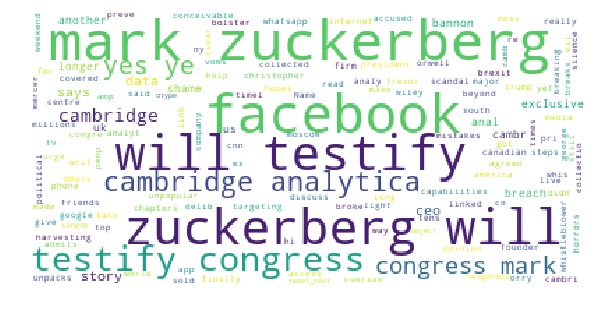

In [33]:
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS # so that we may remove the stop words

classify_tweets = pd.read_csv('facebook_related_tweets.csv', dtype={'location':object})

mpl.rcParams['figure.figsize']=(10.0,8.0)    #(6.0,4.0)
mpl.rcParams['font.size']=8                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

wordcloud = WordCloud(background_color='white',
                      stopwords = STOPWORDS,
                      max_words=200,
                      max_font_size=40, 
                      random_state=42
                      ).generate(str(classify_tweets['tweet_text']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig("word_cloud_saved.png", dpi=3000)

## Using Google Geo-code to extract more locations

we used google

In [34]:
classify_tweets = pd.read_csv('facebook_related_tweets.csv', dtype={'location':object})

In [40]:
# print(classify_tweets.head(5))
locations_save = classify_tweets.loc[:, 'location'].astype(np.object)
counter = 0
locations_cleaned_list = []
# print(locations_save.head(5))
with open('google_locations.csv', 'w', newline='', encoding='utf-8') as csvFacebook:
    writer_facebook = csv.writer(csvFacebook, delimiter=',')
    writer_facebook.writerow(['row_id', 'old_location','cleaned_location'])
    for i in locations_save.unique():
        if i is not np.NaN:
            # strip /n from the lines in the text
            new_str = i.strip()
            # remove mentions such as @realdonaltrump
            new_str = re.sub(r"@[\w]+", " ", new_str)
            # remove hashtags such as #deletefacebook
            new_str = re.sub(r"#[\w]+", " ", new_str)
            # replace / with spaces
            new_str = new_str.replace("/", ", ")
            # replace | with spaces
            new_str = new_str.replace("|", ", ")
            # replace , with ", "
            new_str = new_str.replace(",", ", ")
            # split to replace whitepace with " "
            text_content = " ".join(new_str.split())
            write_location = text_content
            # increment counter
            counter = counter + 1
            writer_facebook.writerow([counter, i, write_location])

#### Cleaning the locations, as sometimes we can have poorly typed locations, which when searched for may not give a result

In [43]:
google_locations = pd.read_csv('google_locations.csv', dtype={'cleaned_location':object})
google_locations.head(5)

,row_id,old_location,cleaned_location
0,1,"Manhattan, NY","Manhattan, NY"
1,2,"Pevensey Bay, England","Pevensey Bay, England"
2,3,"Odessa, TX","Odessa, TX"
3,4,"Philadelphia, PA","Philadelphia, PA"
4,5,BRAZIL South America,BRAZIL South America


#### Using the google link we will simply return a json, that we can parse and extract the locations (latitude and longitude) to be saved within the file with respect to the cleaned locations (or the unique original locations from the tweets file)

In [ ]:
cleaned_locations_save = google_locations.loc[:, 'cleaned_location'].astype(np.object)
counter = 0
with open('google_geocode_locations_save.csv', 'w', newline='', encoding='utf-8') as csvFacebook:
    writer_facebook = csv.writer(csvFacebook, delimiter=',')
    writer_facebook.writerow(['row_id', 'cleaned_location', 'latitude', 'longitude'])
    for i in cleaned_locations_save:
        counter = counter + 1
        # if the cleaned location has some text
        if i is not np.NaN:
            new_str = i.replace(" ", "+")
            print(new_str)
            response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?&address='+new_str)
            loc_json = response.json()
            time.sleep(60/300.0)
            # if there is a result returned form google response
            if  loc_json.get("results", []):
                print("... extracted")
                latitude = loc_json['results'][0]['geometry']['location']['lat']
                longitude = loc_json['results'][0]['geometry']['location']['lng']
                writer_facebook.writerow([counter, i, latitude, longitude])

In [ ]:
google_locations = pd.read_csv('google_locations.csv', dtype={'cleaned_location':object})
google_locations.head(5)

In [1]:
from textblob import TextBlob
import time
import pandas as pd
import numpy as np
import json
import csv
import requests
import re
import string

In [2]:
# classify_tweets = pd.read_csv('list_users_3.csv', dtype={'screen_name':object})
# print(classify_tweets.head(5))
# users_screen_names = classify_tweets.loc[:, 'screen_name'].astype(np.object)
# all_unique_users = users_screen_names.unique()
# print(all_unique_users.shape)
# print(users_screen_names.shape)
# classify_tweets = pd.read_csv('facebook_related_tweets.csv', dtype={'location':object})
# print(classify_tweets.head(5))
# users_screen_names = classify_tweets.loc[:, 'screen_name'].astype(np.object)
# all_unique_users = users_screen_names.unique()
# print(all_unique_users.shape)
# print(users_screen_names.shape)

(51948,)
(51948,)


In [3]:
# with open('list_users.csv', 'w', newline='', encoding='utf-8') as csvFacebook:
#     writer_facebook = csv.writer(csvFacebook, delimiter=',')
#     writer_facebook.writerow(['row_id', 'screen_name'])
#     file_path = 'https://twitter.com/'
#     counter = 0
#     for name in all_unique_users:
#         writer_facebook.writerow([counter, name])

In [4]:
import os
import sys
import bs4
import urllib
import requests

with open('twitter_users.csv', 'w', newline='', encoding='utf-8') as csvFacebook:
    writer_facebook = csv.writer(csvFacebook, delimiter=',')
    writer_facebook.writerow(['row_id', 'screen_name', 'Tweets count', 'Following', 'Followers', 'Likes'])
    file_path = 'https://twitter.com/'
    counter = 0
    for name in all_unique_users:
        counter = counter + 1
        url = file_path + name
        r = requests.get(url)
        data = r.text
        soup = bs4.BeautifulSoup(data, 'html.parser')
        elements = soup.find_all('span', {'class': 'ProfileNav-value'})
        ele_txt = []
        for e in elements:
            extract_data_value = e.get('data-count')
            if extract_data_value is None:
                ele_txt.append(extract_data_value)
            else:
                ele_txt.append(int(float(extract_data_value)))
#         print(counter, name, ele_txt)
        if len(ele_txt) >= 4:
            writer_facebook.writerow([counter, name, ele_txt[0], ele_txt[1], ele_txt[2], ele_txt[3]])
        elif len(ele_txt) == 3:
            writer_facebook.writerow([counter, name, ele_txt[0], ele_txt[1], ele_txt[2], ""])
        elif len(ele_txt) == 2:
            writer_facebook.writerow([counter, name, ele_txt[0], ele_txt[1], "", ""])
        elif len(ele_txt) == 1:
            writer_facebook.writerow([counter, name, ele_txt[0],  "", "", ""])
        else:
            writer_facebook.writerow([counter, name, "",  "", "", ""])

1 Dalachondo [102, 539, 27, 141, None]
2 hepzibah59 [30095, 501, 363, 12044, None, None]
3 _squid15_ [95161, 600, 1308, 36397, None]
4 AyebeLamAnthony [81879, 132, 364, 6462, None]
5 txag2k [6691, 1623, 1466, 1708, None, None]
6 theannikaj [13595, 556, 477, 15628, None]
7 silksatn [59263, 201, 1445, 8153, None, None]
8 LimeMediaHI [21577, 4912, 1402, 14683, None]
9 laurenlexx [88966, 798, 1652, 46551, None]
10 shruti12d [8157, 1754, 1783, 2716, None]
11 antmaertens [12760, 1172, 1104, 9329, None]
12 sammmzilla [36460, 791, 1487, 4070, None]
13 KapindraVerma [89005, 76, 393, 4367, None]
14 matanngsinh [1489, 673, 9087, 1492, None]
15 __GeorgiePorgie [295736, 4846, 7860, 29477, None]
16 rajkaur1 [3545, 458, 296, 6487, None]
17 amrigg [43491, 2106, 2066, 16668, None]
18 riic_rome [41591, 204, 560, 182, None]
19 fanneoflife [99468, 738, 693, 6420, None]
20 manishgaba2015 [12424, 98, 320, 29053, None]
21 pravesh_burma [11986, 247, 364, 123, None]
22 liltingzephyr [21265, 238, 334, 90159, No

177 oisinlunny [59378, 8205, 7477, 33470, None, None]
178 rajutrueindian [11181, 107, 178, 47483, None]
179 filmcafeSteve [12499, 1302, 1070, 27382, None]
180 yung_minccino [14519, 122, 134, 31883, None, None, None]
181 zuckermilch [31251, 1265, 1390, 166107, None]
182 Rufaaaro [32269, 534, 591, 3051, None]
183 towardsthelite [244, 50, 11, 520, None]
184 PaolaNotPaula [18875, 301, 449, 6902, None]
185 93NightWriter [18743, 7626, 7829, 31, None, None]
186 jayaitch1 [17157, 225, 610, 37300, None]
187 evafairlie [26665, 723, 520, 11983, None]
188 svenstenka [9327, 351, 199, 7220, None]
189 faisyl [3252, 235, 68, 1190, None]
190 OsowoIAM [24200, 3003, 2324, 39539, None, None]
191 hddnvllyranchel [14997, 104, 77, 10148, None]
192 MaBeCraze [4506, 666, 341, 4712, None, None]
193 G0ldenpoets [77496, 1131, 1159, 13999, None]
194 DeniseCanebett [402, 57, 195, 2569, None, None]
195 CarmenMTZ [15461, 1163, 400, 36023, None, None]
196 numbamour [2123, 97, 67, 11870, None]
197 chrismcg21 [20282, 41

351 ImAllinMAGA [106798, 3438, 4078, 66098, None]
352 The_Bull_1 [13253, 12046, 11781, 11422, None]
353 hellaqueerdella [10705, 203, 203, 9756, None, None]
354 mermaidthuglife [7660, 358, 1264, 14357, None]
355 KLYETT [1086, 752, 10, 2171, None, None]
356 paulbrislen [139597, 4207, 8061, 63592, None]
357 RidersinBlack [16398, 1283, 411, 3354, None]
358 JayBlizzzy [6479, 506, 409, 21626, None]
359 NthPortal [7042, 173, 125, 2520, None]
360 datta_chache [5614, 35, 16, 3084, None]
361 buddykinnz [3720, 177, 61, 14016, None]
362 mukeshkrm [3517, 283, 204, 168, None]
363 jjkIoveclub [37719, 200, 249, 47726, None]
364 samanmohamed395 [686, 950, 309, 664, None]
365 Hotlocalslngle [61956, 210, 2274, 80655, None]
366 hippiesmiles_am [36708, 606, 504, 5242, None]
367 HoneyAirborne [23104, 754, 384, 22274, None, None]
368 yungcheezewizzy [14610, 391, 81, 15624, None]
369 ceIestiaIity [34046, 306, 442, 94472, None]
370 jdavis1234007 [8930, 934, 264, 38440, None]
371 AfroNesian [24624, 526, 559, 39

523 _spicymango [13821, 392, 542, 8390, None]
524 hixtapebangs [12675, 196, 210, 8646, None]
525 russbanfing [3250, 169, 30, 675, None]
526 _brendagarcia_ [20711, 267, 195, 24664, None]
527 FVaral [40714, 546, 299, 10201, None, None]
528 helenjocey [15231, 75, 810, 1414, None]
529 lunaapelaez [196, 501, 268, 22113, None]
530 FangMakesStuff [14346, 201, 124, 13765, None]
531 INdinelago [8520, 381, 259, 2623, None]
532 bombayquant [4767, 342, 70, 1524, None]
533 NoraReed [209597, 1715, 12537, 43560, None, None, None]
534 Ajaykalse1 [4250, 152, 85, 14515, None]
535 NlCO_YAZAWA [78160, 629, 256, 120479, None]
536 CnbpRUqD6PozHJH [5157, 33, 4, None]
537 ekdeplorable [199500, 2522, 3131, 118664, None]
538 LiLMAiNE334 [10451, 2045, 916, 28542, None, None]
539 thewolverinewa [15292, 847, 265, 16084, None]
540 RogerRogerVIIX [8142, 674, 190, 5715, None]
541 senthilnayagam [32321, 1935, 1799, 14603, None, None]
542 J3D1MASTERJOSH [17037, 206, 424, 15962, None]
543 linzeyhoehan [242602, 694, 1396

696 Majda_II [25425, 230, 637, 7805, None]
697 chezlamere [852, 1287, 364, 10, None, None]
698 Ana_Palomares13 [11253, 437, 541, 10611, None]
699 TylerCadeofTX [601, 168, 56, 2552, None]
700 _Rocket__Queen [2942, 377, 432, 10900, None]
701 SumdimaB [38115, 558, 424, 41638, None]
702 RobertMCastillo [19039, 441, 757, 20795, None]
703 heyarionnnn [90490, 2900, 6763, 46349, None, None]
704 King_Nardy [9188, 311, 242, 605, None]
705 morayo_og [8363, 155, 67, 32969, None]
706 zviltv [47861, 565, 464, 24987, None, None]
707 blindmansregret [69029, 4754, 2302, 1370, None]
708 dagakrishna22 [1397, 934, 242, 6693, None, None]
709 mayrasons2 [24958, 1195, 1782, 27622, None]
710 PROGRAM_IX [31001, 568, 482, 51068, None, None, None]
711 CalcuttanM [347, 142, 23, 47, None]
712 paolitabonita__ [56338, 434, 312, 20951, None]
713 hyww13 [2951, 894, 124, 2422, None, None]
714 CPTWho [9149, 549, 309, 12487, None]
715 Naddyrot [130952, 271, 887, 18352, None]
716 AnneMannone [5533, 297, 35, 7801, None]
71

871 Sandy19_10 [18970, 1022, 159, 363, None]
872 TheRadioWalls [11589, 886, 66, 4215, None]
873 AVooloo [12594, 1006, 563, 10413, None, None]
874 keymagirl [13715, 377, 225, 433, None]
875 KINGTroy__ [91678, 324, 738, 1123, None]
876 BCAgroup [37594, 1943, 1898, 884, None]
877 BOER_Warrior [8149, 2085, 2017, 4370, None]
878 Jaded_Intellect [37566, 4085, 1172, 908, None, None]
879 Omaidus [55972, 1118, 3198, 29999, None, None]
880 taco_fartz [9467, 447, 301, 6122, None]
881 yass_monique [21616, 502, 512, 3777, None]
882 brenlaking [20809, 312, 430, 33687, None]
883 AikenCountyDems [6484, 267, 629, 3723, None, None]
884 j_klute [13619, 3377, 2110, 4768, None, None]
885 prestondprice [1781, 279, 100, 398, None]
886 IamC_Breezyy [64294, 587, 863, 2320, None]
887 bluejaywaves [13300, 503, 177, 59540, None, None]
888 lals131999 [112134, 1429, 647, 7126, None, None]
889 Hanksingle [76381, 1377, 796, 65016, None, None]
890 ravindrav7 [69484, 1519, 2034, 76721, None]
891 BlackChild44 [2028, 202

1040 AntigonaP [83295, 394, 500, 61291, None]
1041 BarbaraShelbou1 [764, 31, 23, 1865, None]
1042 medineee_ [2404, 73, 85, 7308, None]
1043 ArijitBanarji [5276, 334, 346, 2463, None, None]
1044 immoderator [18618, 4973, 838, 10229, None, None]
1045 Sharon_Ogunleye [11174, 440, 1328, 76, None, None]
1046 Ya_seen [120198, 297, 423, 4650, None]
1047 JustListedBC [91049, 1813, 1059, 14, None]
1048 KhalidAhmedAns5 [7584, 135, 81, 13121, None]
1049 RH_MAGA [1461, 3078, 1850, 865, None]
1050 rvc143 [18844, 4394, 1884, 9990, None]
1051 azarialynn [7067, 264, 289, 13476, None]
1052 AbdurRAB11 [17609, 64, 268, 629, None, None]
1053 _kneefuh [27475, 12621, 20119, 4122, None]
1054 Ginlefebvre [201659, 15956, 15281, 38107, None]
1055 judy713_ [35433, 780, 1037, 28296, None]
1056 WTFUDOINPTUS [1100, 321, 37, 781, None]
1057 215KAY [77919, 439, 734, 4036, None]
1058 ZafiroJones [17175, 1607, 1020, 4474, None]
1059 youngest_reppin [25025, 353, 477, 37120, None]
1060 sadelhisatish1 [67263, 408, 414, 70

1213 JazmyJazmyne [9733, 897, 230, 42892, None]
1214 DemobratGyrl [14193, 3137, 3123, 16747, None]
1215 TheNotFamousTim [28223, 620, 1289, 4257, None]
1216 spaceiphany [13158, 2496, 781, 27910, None]
1217 Hectoesme35 [73165, 1243, 1052, 47257, None]
1218 oyshajones [4292, 475, 176, 464, None]
1219 jam_idiot [38308, 214, 387, 19305, None]
1220 bkillvh [32200, 522, 656, 32498, None]
1221 plvtvnum [41204, 658, 702, 2981, None]
1222 ChinaCat618 [13164, 2430, 1121, 7443, None]
1223 _DevanteK [78067, 763, 1080, 4300, None]
1224 tatn [41506, 1226, 2623, 5946, None, None]
1225 froqueen3 [19092, 1269, 665, 18084, None, None]
1226 catinouye [28395, 220, 64, 13089, None]
1227 simdotc [865, 408, 93, 3491, None]
1228 Symi420 [36004, 548, 503, 14156, None]
1229 prateek61296 [2617, 301, 116, 8491, None]
1230 Feebz92 [1545, 622, 98, 2719, None]
1231 TherealmeLeslie [5473, 1501, 1392, 12325, None]
1232 skuIlgirl [257840, 476, 741, 252836, None]
1233 Sushil56388305 [4727, 478, 76, 986, None]
1234 itisba

1384 dXXminique [38249, 445, 445, 7195, None, None]
1385 nastaya [7924, 1276, 615, 955, None, None]
1386 ashutri74 [75778, 2965, 6603, 2533, None, None]
1387 PrajithPS [47590, 1084, 633, 26605, None, None]
1388 deep3da [19161, 692, 545, 2003, None, None]
1389 kristereide [399, 684, 134, 1490, None]
1390 JulianGumbo [6052, 436, 443, 9845, None, None]
1391 loldamn_ [7958, 79, 95, 20738, None]
1392 DocDrew59 [15082, 1798, 715, 10442, None]
1393 EngineerNRJ [4633, 2278, 1231, 4287, None]
1394 KOINNews [134021, 1019, 109819, 1296, None, None]
1395 RathMcFreeManOH [44890, 748, 458, 24658, None]
1396 nadjlaa6731 [31315, 276, 192, 40170, None]
1397 geoffreylaxton [68222, 3301, 1358, 34831, None]
1398 formy_iroquois [2937, 123, 71, 78, None]
1399 MMMagza [28537, 1302, 1107, 854, None]
1400 sunny_punia7723 [31209, 312, 173, 1412, None]
1401 Spinkles25 [80496, 313, 402, 2049, None, None]
1402 MaxSeefluth [18619, 674, 1291, 9406, None]
1403 gobungus [4846, 364, 104, 599, None]
1404 Karl66078875 [5

1552 BayanMohajeri [7959, 525, 439, 2752, None]
1553 BrickRubin [31515, 83, 219, 57053, None]
1554 skyneenu [8230, 911, 14093, 7037, None]
1555 yllekonadnerb [248334, 4986, 3660, 130099, None, None]
1556 Married2_TheLaW [12069, 226, 92, 1034, None]
1557 mserikamariee [39072, 572, 411, 40007, None]
1558 crhousel [67352, 3829, 3304, 46487, None, None, None]
1559 savage_home [4488, 603, 220, 6366, None]
1560 kamathanil60 [9519, 905, 422, 2918, None]
1561 JusPlainTalk101 [64244, 645, 760, 61872, None]
1562 ruinedthyme [142514, 332, 2642, 120164, None]
1563 woahitspriti [36901, 722, 2070, 34111, None]
1564 Metchul_as_Fuck [18047, 754, 145, 139, None]
1565 le_vaquera []
1566 neatoseano [14078, 374, 404, 22458, None]
1567 lnrdgrr [28705, 600, 429, 24455, None]
1568 revivadrin [18292, 327, 272, 21315, None]
1569 _JakubJanda [41328, 13577, 15490, 642, None, None]
1570 emugly_ [27629, 590, 384, 39061, None]
1571 ArtakGevorgian1 [389, 35, 12, 675, None]
1572 muchacojones [4715, 25, 44, 283, None]

1719 godlovesyou1110 [21017, 1506, 1395, 15805, None]
1720 messsycan [7408, 76, 176, 9748, None]
1721 PreussischerA []
1722 AndrewSB49 [226599, 8066, 7359, 109158, None, None, None]
1723 aoasnct [37296, 147, 912, 38889, None, None]
1724 Mello_Bear [41367, 732, 1623, 52663, None]
1725 Cookthechef [None]
1726 joanmareeonline [182, 147, 14, 211, None]
1727 citizen4progres [35859, 3267, 1471, 44466, None]
1728 SPQR309 [5488, 337, 335, 43365, None]
1729 MagnoliaG2012 [47491, 1456, 1638, 809, None]
1730 mariahsyrett [16989, 601, 279, 1196, None]
1731 HTHRFLWRS [30291, 925, 2176, 163149, None]
1732 MaU_47 []
1733 Jewisdomjr1 [1366, 155, 100, 5744, None]
1734 sikandermajid [42599, 2926, 2114, 31373, None, None]
1735 insanityorange [17828, 268, 174, 2682, None]
1736 RTAutomator [5981, 86, 103, 1689, None, None]
1737 overlybland [8388, 148, 50, 16299, None]
1738 Kevin_592gy [6070, 231, 101, 3965, None, None]
1739 starsherit [791, 92, 25, 1533, None]
1740 rootsimple [6111, 373, 2708, 447, None]
1

1891 _Kianax3 [31587, 450, 459, 7183, None]
1892 plushmoon02 [24566, 577, 281, 53289, None]
1893 Danofran [17952, 791, 605, 43890, None, None]
1894 MojoSojoJojo [11342, 381, 130, 4023, None]
1895 hi_xiomara [17029, 129, 191, 39856, None]
1896 cookiesnmillk [5165, 173, 164, 9625, None]
1897 LilJoeyBear [63400, 763, 1010, 46190, None, None]
1898 gulllermo [8447, 4959, 1185, 11488, None]
1899 cheGustav [35572, 675, 634, 1921, None]
1900 varun3883 [8151, 1754, 711, 1242, None, None]
1901 kathfyt [91838, 336, 893, 71738, None]
1902 CathyKirby65 [26302, 545, 1001, 13465, None]
1903 Mr_ItIsOurDuty [39215, 1291, 1766, 5058, None, None]
1904 homohotmess [36588, 1531, 961, 15282, None]
1905 amyurl []
1906 Raviii_Verma [1619, 255, 46, 250, None]
1907 dspalten [139497, 4935, 1811, 74375, None, None]
1908 lovexxelena [16775, 238, 336, 41161, None, None]
1909 brains_and_ikea [2906, 293, 46, 13387, None]
1910 VidegarayF [1447, 518, 165, 1174, None]
1911 briannaxcar [11075, 269, 339, 24681, None, None

2063 lutzid [8024, 866, 1098, 3779, None, None]
2064 Urndoggie [7581, 159, 187, 2581, None]
2065 mark_earnest [9616, 275, 541, 35646, None, None]
2066 drtynstylynette [23336, 78, 152, 18370, None]
2067 churroburrito [46967, 392, 363, 55457, None]
2068 jahnicek [2057, 70, 51, 3211, None]
2069 eirikpls [16897, 1099, 2193, 29270, None]
2070 kwakawalker [48245, 418, 772, 74033, None]
2071 iam_Joshyyy [1304, 97, 371, 1122, None]
2072 0hMyl0r3n7_ []
2073 gokkurt_aksu [99004, 1731, 632, 23254, None]
2074 TrebleClefJames [84611, 1884, 1969, 5315, None]
2075 Viiiictorriaa_ [35544, 251, 290, 12074, None]
2076 legsgap [100224, 300, 818, 139935, None, None]
2077 swabie123 [1337, 810, 119, 224, None]
2078 munroparkSnP [11113, 1990, 545, 13188, None]
2079 deep221187 [34734, 302, 636, 46515, None]
2080 DeimosEskizo [11477, 920, 243, None]
2081 elbaruth_writes [19495, 795, 329, 55849, None]
2082 Lesko_Sergii []
2083 DickSoSpanish [20190, 1380, 2183, 36706, None]
2084 Miister_H [235917, 1513, 9484, 132

2234 lwhite2112 [29899, 389, 757, 54551, None, None]
2235 DocStukie [81327, 3794, 3836, 23982, None, None]
2236 Viivekanand0063 [43868, 599, 607, 66926, None]
2237 sinisteragent [149752, 849, 1275, 3101, None]
2238 nicklebacc [12665, 271, 104, 39504, None]
2239 ArvindVermaJM [8700, 1144, 1857, 2704, None, None]
2240 thepushkarsingh [8187, 141, 116, 19215, None]
2241 friendlykishan [13520, 841, 401, 1928, None, None]
2242 h0rr0rchild [30380, 352, 184, 30341, None]
2243 daisybroadbent [4743, 453, 235, 16022, None]
2244 jazzfizlee69 [29995, 1013, 1014, 23220, None]
2245 dgtlresistance [73120, 46, 5326, 202, None]
2246 DelhiMuse [97100, 3350, 5668, 14899, None, None]
2247 maribruzzz [3077, 274, 297, 3793, None]
2248 politicalkirti [48013, 171, 6270, 423, None, None]
2249 realgothbitch [3430, 99, 330, 12070, None]
2250 janetreitman [2898, 977, 3863, 2194, None]
2251 karendig1 [35867, 1031, 317, 15384, None]
2252 mjp39 [3527, 663, 958, 6251, None]
2253 denny_inspace [55089, 324, 442, 1514, N

2401 Srishti_Shetty [114750, 1004, 5585, 4552, None]
2402 snendonga [11844, 349, 927, 4616, None]
2403 _SellyBabes [84537, 268, 618, 8593, None]
2404 queer_xican [12580, 295, 397, 10041, None]
2405 wavvlh [8319, 210, 288, 2150, None, None]
2406 danilocas23 [5777, 578, 360, 358, None, None]
2407 justkaix [108786, 313, 1629, 34722, None, None]
2408 MalcolmLondon [37340, 940, 21580, 38859, None]
2409 Doseofphose [1246, 217, 42, 3649, None]
2410 kaacharelle [6905, 372, 218, 3423, None]
2411 karlmondon [3459, 1327, 2450, 1510, None, None]
2412 GulzarkhanHamza [2041, 268, 295, 8420, None]
2413 mattdonovan405 [3047, 510, 100, 1902, None, None]
2414 AtortieA [4041, 4537, 4742, 9871, None, None]
2415 gilly_billy [43648, 243, 635, 84519, None]
2416 yt_nemurin [5217, 681, 172, 839, None]
2417 messiexpress [6254, 215, 137, 6159, None]
2418 MatruBhakt [73005, 184, 5760, 24328, None, None]
2419 mvndvrin [67099, 754, 760, 74712, None]
2420 igarcia315 [4641, 44, 105, 3210, None]
2421 CardiC__ [84088, 

2573 mjosheehy [11511, 372, 142, 25032, None]
2574 wardingkarma [11787, 131, 92, 11380, None]
2575 _HiMonica [89315, 1124, 1361, 1191, None]
2576 mishraarvindi [42417, 848, 2739, 9838, None]
2577 drred05 [4647, 199, 102, 4500, None]
2578 erica_steussie [3658, 877, 215, 4855, None]
2579 beccaabatmann [48640, 781, 1094, 44597, None]
2580 dylonce4 [59030, 233, 270, 117839, None]
2581 sproutesh [4577, 327, 298, 10038, None, None]
2582 PbSULAK [79165, 4070, 3553, 111284, None]
2583 vawewiia [4490, 205, 265, 10321, None]
2584 SPSSM [17743, 2004, 415, 13013, None]
2585 GraySgg674 [52335, 1509, 866, 53269, None]
2586 DetroitCP [367177, 5, 3053, None]
2587 xTheeDope1 [34310, 1413, 1945, 8877, None]
2588 GibranEnglish [7505, 348, 547, 55585, None]
2589 cmdel [20795, 1635, 732, 21255, None, None]
2590 astrn_m [1384, 212, 68, 11651, None]
2591 Jeanlibby5 [17835, 2792, 1124, 15607, None]
2592 ShankarN85 [1971, 61, 22, 3657, None]
2593 mashal_usman [2702, 1311, 362, 1769, None]
2594 temidayoooo [784

2746 thebigotbasher [55692, 2786, 2381, 55567, None]
2747 ElSandifer [38464, 266, 2618, 3697, None]
2748 HandsonPaul [24508, 837, 284, 5644, None, None]
2749 ulrikeguerot [5677, 531, 15723, 349, None, None]
2750 RafteryKatie [17539, 204, 285, 30293, None]
2751 neptunesfinest_ [1223, 480, 69, 9623, None]
2752 sharemindfully [20514, 1240, 3265, 2636, None, None]
2753 TsunamiRojas [15733, 496, 324, 30032, None]
2754 NGreatmughal [7239, 319, 121, 9186, None]
2755 sasspra [28284, 274, 867, 120076, None]
2756 DiHuang [135513, 241, 507, 770, None]
2757 ma_liky_ [60653, 1027, 2937, 100585, None]
2758 apitrusdi [47464, 1804, 872, 1481, None]
2759 man_bhr [52673, 567, 296, 10189, None]
2760 mshilary [21631, 3848, 6334, 5422, None, None, None]
2761 Codsmouth58 [60462, 908, 660, 522, None, None]
2762 mntrivedi [27568, 648, 413, 51498, None]
2763 SengYang3 [532, 5, 9, None]
2764 bellz24 [8189, 201, 166, 6594, None]
2765 LilithFlorian [10336, 121, 69, 10338, None]
2766 jasonesquivel [37007, 231, 306

2918 demuromarquez [51455, 439, 1087, 65962, None]
2919 MegSmit72117182 [3180, 125, 51, 4935, None]
2920 thatsjaack [10122, 360, 240, 10683, None]
2921 TheCutestKimmy [11776, 218, 210, 6107, None]
2922 AmyCat68 [7108, 887, 624, 11476, None]
2923 con_comms [9960, 144, 142, 16, None]
2924 checkerhd [118511, 1156, 1028, 60252, None]
2925 Florida_Today [77757, 575, 66049, 5967, None, None]
2926 _ayananicole [28923, 251, 419, 89963, None]
2927 DesignUngerman [10576, 767, 495, 2101, None, None]
2928 bitterhag33 [10723, 416, 192, 28714, None]
2929 emilayywho [19355, 618, 697, 8601, None]
2930 RayAdamowiczjr [21219, 1074, 551, 12452, None]
2931 drezqt [18367, 210, 121, 7305, None]
2932 vintagejoehill [6589, 601, 654, 3114, None, None]
2933 sourabhak [1408, 27, 169, 48, None]
2934 viewzfromty [63363, 180, 799, 8774, None]
2935 FriesMaximilian [1528, 444, 136, 1152, None]
2936 darthsierra [14724, 714, 752, 6216, None, None]
2937 Martin951xx [13581, 1298, 1530, 11518, None]
2938 Punkette1566 [146

3088 hugstrouble [15954, 777, 765, 18028, None, None]
3089 OzodaM [9239, 375, 636, 2648, None]
3090 Nuha_S [28609, 200, 296, 446, None]
3091 schoener_shere [48629, 2329, 2895, 58127, None]
3092 AquilakaHecate [52205, 1909, 2087, 26051, None, None]
3093 ASdeclassified [12887, 250, 161, 5560, None]
3094 versacethief [4173, 146, 467, 8352, None]
3095 YK_PROMOTIONS [81043, 3394, 3157, 45419, None]
3096 b0mbth3t0m [40195, 1057, 143, 27795, None]
3097 BeernBrownsGuy [18906, 7275, 6911, 58264, None]
3098 sumeshrbhat [34549, 789, 284, 52391, None]
3099 madhusudhanFufa [52691, 188, 486, 1867, None]
3100 keithwhitney [8852, 1481, 2116, 6502, None]
3101 KELOBrady [8789, 303, 1545, 1601, None]
3102 danielle2u [35262, 3959, 1513, 103861, None, None]
3103 AwkwardNarry_ [10148, 509, 292, 29783, None]
3104 Terrimactaylor [36, 85, 7, 54, None]
3105 Khanyi_Lephoko [19241, 356, 805, 2383, None]
3106 unclebeefy [26110, 1656, 2987, 41246, None, None]
3107 ParsaSleighter [19395, 322, 349, 26307, None]
3108 

3256 AMalvoy [181024, 3158, 3691, 103188, None]
3257 singinggum [3774, 158, 64, 5188, None]
3258 trisarahdawn [10840, 262, 353, 29060, None]
3259 elefanastico [9188, 165, 144, 17316, None]
3260 __deanwhite [17239, 207, 461, 12769, None]
3261 __taylor__7 [17135, 652, 526, 2778, None]
3262 YadavChamp [20550, 185, 197, 51652, None]
3263 jessamoree [15102, 141, 202, 15816, None]
3264 eliudkibii [20501, 1540, 1792, 960, None]
3265 JordanJemeryas [5756, 60, 58, 7754, None]
3266 onelifetoviv [6910, 305, 349, 1291, None]
3267 schlenks_ [36915, 401, 139, 26377, None]
3268 alienxjen [10295, 270, 182, 12487, None]
3269 ffranklotion [32183, 414, 439, 19112, None]
3270 ExpectHeroes [2735, 665, 187, 130, None]
3271 papisonguisN8 [9959, 181, 124, 6852, None]
3272 BatesRosary [25631, 3401, 1670, 20746, None]
3273 coevalshrew [14073, 306, 341, 9624, None]
3274 vigkat [22040, 2270, 2271, 17516, None, None]
3275 LittleF4gg0t [5990, 115, 101, 2494, None]
3276 Jordan_Jantz [3058, 268, 87, 4481, None]
3277 

3430 JarretSigrah [26441, 563, 540, 12552, None]
3431 cyber_misfits [147, 30, 4, 3, None]
3432 jaslinjose24 [5844, 223, 105, 5403, None]
3433 praveenm_mishra [39195, 1613, 2093, 53528, None, None]
3434 MandarSawant184 [122965, 1427, 2259, 80013, None, None]
3435 Suraj_jha_G [8254, 88, 136, 27384, None]
3436 grouchy_couchy [14097, 252, 332, 16643, None]
3437 mattyetter [2796, 725, 214, 971, None, None]
3438 noestalit [2883, 239, 48, 5644, None]
3439 SVBizRyanF [1845, 205, 90, 4, None]
3440 matt_sosuave [19724, 254, 332, 4301, None]
3441 RMidnimo [13027, 335, 497, 33, None]
3442 BocasBaddie [5126, 157, 55, 12658, None]
3443 SieSieLive [19621, 105, 174, 3909, None]
3444 wunika [4294, 711, 562, 457, None]
3445 SLNNAA [11758, 667, 216, 41910, None, None]
3446 Rxdnii [34982, 279, 439, 11987, None]
3447 catholiccanon [6437, 127, 42, 25307, None, None]
3448 VivaLaTonia_ [33161, 704, 461, 23988, None]
3449 lanaoutskinnied []
3450 DamandaMartiny [2277, 1450, 85, 5261, None]
3451 Silverwolf6505 [

3601 nayak799 [1791, 66, 288, 202, None]
3602 __babyk [27153, 1483, 1255, 42422, None, None]
3603 CathySMarks [15538, 580, 398, 11886, None]
3604 kimbrssrd2 [374, 37, 103, 189, None]
3605 bIu3b1rd [5396, 206, 188, 13714, None]
3606 Khanyyisile [17846, 90, 2258, 20, None]
3607 HtownCiCi [24429, 608, 725, 26999, None]
3608 geekiestwoman [73325, 3397, 3005, 3807, None, None]
3609 independentgal [993, 147, 27, 1063, None]
3610 joesefjoestar [29062, 2025, 722, 31084, None]
3611 parkersorgana []
3612 TilWeOverdoze [192703, 411, 908, 12720, None, None]
3613 TheRealApostleP [5218, 663, 189, 4696, None]
3614 inversethinker [63327, 147, 256, 7551, None]
3615 minaalaqal [25366, 901, 497, 4879, None]
3616 PVRajmohan [2822, 137, 39, 7837, None]
3617 gypsy_27 [39502, 2654, 1379, 36083, None, None]
3618 DarlaKi96961038 [4597, 1191, 98, 17558, None]
3619 Mishetta_T [11984, 611, 501, 43226, None, None]
3620 Noticortas [73820, 2208, 2261, 734, None, None]
3621 ManberShmallery [25259, 224, 214, 14183, No

3774 _d_hasko [14086, 1528, 2373, 25902, None]
3775 _kaaareeenn [12434, 130, 193, 4450, None]
3776 pretseoul [6201, 669, 295, 7874, None]
3777 estinebee [92102, 1304, 3749, 10209, None]
3778 edlunneyy [832, 295, 107, 1533, None]
3779 helnuh [8054, 226, 49, 1481, None]
3780 Q_101_X [17117, 6543, 6567, 3354, None]
3781 fakejacksonvp [21559, 346, 182, 82662, None]
3782 interbutt [2461, 427, 124, 9798, None, None]
3783 Cowboy__Country [74562, 1833, 2655, 5766, None, None, None]
3784 millennialshow [1575, 26, 2006, 790, None]
3785 kofoegbu6 [2813, 222, 71, 23906, None]
3786 _YummyFDaij [36454, 583, 650, 6818, None]
3787 ErinVKelly [2246, 872, 1169, 417, None]
3788 _jasmin_romero [10497, 160, 104, 883, None]
3789 nickguerraa34 [5499, 286, 329, 21584, None]
3790 classickae [64655, 242, 373, 7519, None]
3791 Teksbeks [1655, 720, 143, 1228, None]
3792 kawaii1ryan []
3793 Iympic [137102, 336, 477, 6731, None]
3794 CrowOfWallSt [95, 242, 70, 425, None]
3795 daz_angie [163323, 647, 3809, 2197, Non

3947 fatsalmahayek [20521, 565, 2017, 33517, None]
3948 ThatGirlJoselin [27491, 395, 519, 10679, None]
3949 RadFriendo [65131, 13, 13, 175472, None]
3950 EndPay2Play [54114, 1890, 1129, 35116, None]
3951 pamela_verney []
3952 frappqueen_ [82427, 1283, 1022, 48545, None]
3953 haruhi323 [1745, 230, 98, 2283, None]
3954 jr2363 [21212, 767, 233, 59, None]
3955 _JenniferSarahi [41372, 349, 548, 32221, None]
3956 pontelon [59631, 110, 165, 2840, None, None]
3957 sirMannyMuscles [20069, 376, 1464, 2464, None]
3958 MCMaypo [2384, 512, 55, 3230, None]
3959 TallLyteHandsum [56907, 736, 564, 3091, None, None]
3960 davidireland63 [30296, 1546, 154, 140, None]
3961 magneticmuses [22302, 200, 261, 4261, None]
3962 Swordsmanx10 [43371, 417, 350, 16098, None]
3963 revvined [9470, 244, 376, 11142, None]
3964 MBUDDMA [6923, 513, 1150, 758, None]
3965 chulbullaunda [18548, 156, 206, 1346, None]
3966 Clare_Annette [6950, 432, 187, 14780, None]
3967 hanoush00 [113308, 335, 1483, 3441, None]
3968 noname_831

4120 st_ART_Boii [4213, 337, 158, 8986, None]
4121 missyadame [1416, 179, 97, 3248, None]
4122 afrillanurul [19399, 463, 337, 78959, None, None]
4123 AshDRich83 [18673, 755, 371, 8447, None]
4124 personaltroye [9646, 46, 224, 34555, None]
4125 gouravvaidya [1179, 2455, 1646, 141, None, None]
4126 Christian_K_T [18074, 776, 823, 36520, None]
4127 sxxdaa [1894, 124, 90, 837, None]
4128 mchawaka [1853, 325, 93, 511, None]
4129 nxxdhx [58522, 213, 278, 3145, None]
4130 miiinghoe [79633, 342, 390, 53900, None, None]
4131 frydclt [5273, 35, 1067, 2919, None, None, None]
4132 Vei_Ffxiv [21360, 921, 446, 38251, None]
4133 jerseydiabla [26539, 240, 277, 15183, None]
4134 jakegyllenhoex [145449, 2055, 4425, 100086, None]
4135 MarisciaFox [71022, 1411, 447, 89621, None]
4136 HarrietBurandt [7860, 128, 50, 1847, None]
4137 toxic_saint [33983, 180, 1845, 19470, None]
4138 appIe_jack_ [4836, 148, 125, 616, None]
4139 maxeduction [10645, 834, 434, 75992, None]
4140 BagalueSunab [82050, 2735, 1313, 30

4293 TyStuntin [33318, 302, 765, 9, None]
4294 aflatoonarman [36840, 643, 170, 32659, None]
4295 bobbi2124 [45661, 5030, 4910, 46311, None]
4296 ___balance [30926, 669, 838, 3432, None]
4297 TheGameOfLife [140899, 4880, 3802, 850, None, None]
4298 HacXelim [4347, 369, 79, 8660, None]
4299 Sachinpandey0 [1744, 212, 118, 17471, None]
4300 RajGupta3105 [16949, 128, 154, 713, None]
4301 PirvateKale [60146, 2231, 574, 149495, None]
4302 85_conservative [6245, 1181, 685, 9994, None]
4303 The_Akash_Jain [145631, 1110, 10861, 8239, None, None]
4304 ismaelv_1 [787, 379, 126, 2050, None]
4305 crisskayy_ [23455, 1156, 1028, 17967, None, None]
4306 CoolDude_503 [2018, 9, 29, 2199, None]
4307 amaan_89 [38343, 601, 644, 3270, None]
4308 Pitso_s [10742, 376, 302, 1043, None]
4309 len0087 [35291, 2357, 877, 19916, None, None]
4310 sctary [13151, 597, 395, 11608, None]
4311 witness1st [3118, 11277, 13534, 31228, None]
4312 DimaagKaDoctor [10374, 274, 1014, 104, None, None]
4313 TonyaLeeOrtega1 [58011, 

4465 theycallmeyogi [130234, 415, 673, 5, None]
4466 CCK_Mojo [73453, 467, 634, 38318, None]
4467 zwa_kele [1492, 288, 69, 1770, None]
4468 Sabrizzle15 [19661, 226, 472, 10632, None]
4469 imeerage [76510, 619, 14806, 15351, None]
4470 FrankdeJooden [1207, 89, 66, 53, None]
4471 Erhrights [69035, 3497, 9846, 31939, None]
4472 larryrstreet [17600, 573, 369, 4736, None]
4473 manas0123 [4848, 319, 87, 2357, None]
4474 willishl [22131, 262, 448, 24212, None]
4475 matenje [6302, 713, 410, 173, None, None]
4476 Phislash [70631, 3070, 4202, 10847, None]
4477 ItsAmi_xo [40764, 860, 658, 7869, None]
4478 Arka281079 [59444, 1897, 1889, 1004, None]
4479 Moulana_Modi []
4480 bdonnelly [27205, 2324, 882, 33263, None, None]
4481 brrandin [58769, 1652, 1824, 12540, None, None]
4482 MolaLutherKing [404469, 942, 2668, 5560, None, None]
4483 Natrone410 [96129, 882, 870, 1553, None, None]
4484 RolandReichart [5880, 704, 161, 8799, None]
4485 osphai [10267, 63, 491, 35861, None, None]
4486 Deplorable9000 [

4635 douglasingle [40159, 3628, 5933, 37571, None, None]
4636 Dean_Gberg [11218, 781, 348, 35350, None]
4637 KavulavuCollins [10022, 69, 113, 6576, None]
4638 Wildseedling [39123, 499, 572, 3767, None, None]
4639 TygerWDR [16694, 88, 504, 1778, None]
4640 2handsomesons1 [71319, 310, 322, 57071, None]
4641 ayeJathbiyya [39156, 174, 573, 3488, None]
4642 therealspookie [58384, 1952, 6050, 777, None, None]
4643 53dlb [8532, 1729, 630, 1834, None]
4644 dorasthickcuzin [29131, 812, 660, 7117, None]
4645 clevershark [31151, 1229, 726, 21372, None]
4646 syIvertongue [8588, 160, 319, 12817, None]
4647 oscar_murtagh []
4648 RhythmNB [90416, 154, 373, 3185, None]
4649 pindergast [10041, 636, 231, 211, None]
4650 AugustaNewman13 [30392, 1416, 544, 7418, None]
4651 ElliotAbinales [1909, 42, 49, 13284, None]
4652 zionoutcast69 [357, 1083, 862, 287, None]
4653 thatchicknina [10717, 320, 253, 3130, None]
4654 DunkelBier_Jay [5875, 1036, 279, 4077, None, None]
4655 ERMA_____ [61628, 6803, 6427, 23940,

4804 KarenC_12 [8482, 686, 581, 18375, None]
4805 ShivendraKisho2 [56491, 3, 411, 43519, None]
4806 Rican_bro []
4807 narender_naini [8891, 355, 380, 2237, None]
4808 willieapreston1 [34272, 3895, 2724, 30540, None]
4809 I_am_RahulNair [2033, 104, 50, 3384, None]
4810 antepone [36289, 150, 614, 139, None]
4811 OmnomSabrina [57384, 330, 532, 21911, None]
4812 shur0123 [35049, 1735, 7443, 31304, None, None]
4813 chartier [99775, 1069, 10777, 12072, None, None]
4814 Philile_Bee [21822, 113, 284, 24389, None]
4815 funlife482 [3780, 325, 122, 5363, None]
4816 OneLifeMC [68892, 314, 525, 463, None, None]
4817 _nkemelo_23 [48782, 1773, 1744, 7054, None]
4818 _sdvh [32998, 664, 1328, 7950, None]
4819 Rwathmadhako [7398, 437, 249, 4870, None, None]
4820 yvonnenevala [31118, 344, 574, 19200, None, None]
4821 TomorrowsPope [603, 327, 211, 1283, None]
4822 rraz4u [10785, 595, 923, 367, None, None, None]
4823 hasan__abdr [2459, 189, 238, 14505, None]
4824 politicsviews_ [14635, 330, 1530, 1990, Non

4975 fatboymimi [11702, 346, 326, 5520, None]
4976 Rebstew_ [16710, 593, 607, 617, None]
4977 rbatra01 [96500, 269, 759, 262, None]
4978 euanbruceSNP [2873, 143, 117, 2211, None]
4979 shetalmalakar [28128, 538, 515, 7108, None]
4980 shreyasmahajan1 [87702, 875, 1121, 1772, None, None]
4981 scaramangabond [26039, 4855, 2684, 14921, None]
4982 ChabalalaKeith [26211, 857, 1421, 6767, None]
4983 irfanrmz [6077, 212, 187, 70681, None]
4984 philthomas6_ [19538, 2039, 801, 27866, None]
4985 mTabuche [12473, 26878, 34889, 553, None]
4986 mgnificentt [12475, 381, 244, 24016, None]
4987 svigs79 [6415, 884, 730, 10064, None]
4988 Jazzie_le_pimp [50299, 2953, 2041, 28735, None]
4989 erinrayray2 [2835, 214, 167, 6481, None]
4990 HardNewsNetwork [4377, 453, 1416, 2678, None]
4991 ibgwiraga [62835, 939, 1658, 6254, None, None]
4992 ZeroDark_3zero0 [21183, 295, 1358, 10213, None, None]
4993 StickMaestrO [17002, 776, 363, 6317, None, None]
4994 OfficialDMND_ [88545, 2382, 2939, 11618, None]
4995 dChant

5144 cgoodrich66 [52444, 1285, 584, 57047, None]
5145 Grand_MasterM [89373, 1954, 4565, 1234, None]
5146 jako_varrd_ [86875, 330, 643, 11229, None, None]
5147 AumoneMaison [37072, 3401, 4105, 7728, None]
5148 jazminoid [2664, 79, 107, 5773, None]
5149 iamthequeen420 []
5150 MelissaAFrancis [16272, 1234, 191431, 12459, None]
5151 silvermutt []
5152 quinn_letty [7224, 385, 322, 12772, None]
5153 modibhakt18 [33453, 670, 1009, 71490, None]
5154 amgraham26 [14940, 137, 42, 12998, None]
5155 _Shalom_M [3968, 340, 444, 431, None]
5156 vocalAngel101 [4913, 130, 378, 2251, None]
5157 aOhRiver [6571, 931, 373, 41046, None]
5158 IshmaeltheGood [2410, 225, 49, 5465, None]
5159 RiseUpAbove [306551, 2344, 7368, 233724, None]
5160 danibookloveer [9561, 770, 207, 6666, None]
5161 Missy_dee811 [12807, 467, 161, 21018, None]
5162 ChaitanyaAdvait [15829, 200, 789, 6012, None]
5163 sophiaahmed [41376, 3048, 2301, 38259, None, None]
5164 FoodieAlltm [1357, 89, 16, 3399, None]
5165 DonaldSweaterss []
5166 

5315 No_Swag_Mitch [10877, 257, 275, 11680, None]
5316 quislingnot [45850, 1396, 753, 44951, None]
5317 BUBYSGIRL [73998, 2743, 1199, 94006, None]
5318 ciaaunahenry [33091, 1622, 1486, 11811, None]
5319 Jessicadraws17 [8165, 247, 423, 12124, None]
5320 Pacific_Nature [7859, 657, 619, 11206, None, None]
5321 vesnos [935, 95, 37, 170, None]
5322 exolovaa [3848, 250, 47, 5059, None]
5323 i1agn [12790, 2019, 2245, 1713, None]
5324 sabelo_asiphe [11193, 483, 262, 43, None]
5325 usmaniyaat [124254, 347, 2663, 51489, None]
5326 SzechuanHoward []
5327 happymamakj [54747, 321, 264, 48775, None]
5328 manukrsharma [7173, 4597, 1469, 15806, None]
5329 AAPkaBAAP15 [2711, 23, 149, 1246, None]
5330 WillRinehart [19999, 3607, 3442, 3589, None, None]
5331 jenicakalra [22972, 1738, 468, 2200, None]
5332 hegemonetics [7917, 2268, 352, 15595, None, None]
5333 LorulianGamer [7406, 291, 95, 12961, None]
5334 Brunothepius [4735, 3487, 260, 218, None]
5335 charlow23 [5678, 944, 197, 8, None, None]
5336 funny_

5488 MirkoIlicCorp [3242, 383, 1848, 352, None]
5489 Nitu_Ji [68883, 41, 12630, 21903, None]
5490 TinaWhitson3 [318, 209, 41, 371, None]
5491 littleyums [32946, 1291, 294, 33782, None]
5492 Sambit_p [7587, 281, 125, 701, None]
5493 DaisyJaqui [40817, 851, 766, 86594, None]
5494 kalinga [23201, 1312, 5526, 1484, None]
5495 AndreaWroteThis [32765, 146, 235, 37540, None]
5496 momma_b3ar [1905, 608, 303, 84014, None]
5497 nslkinnear [27, 101, 23, 11, None]
5498 Khathu_McGorg [27769, 244, 927, 3002, None]
5499 DexterSaysMeow [23366, 591, 129, 16936, None]
5500 miketheyokel [44862, 801, 710, 69166, None]
5501 Savitri4Ever [52005, 656, 2573, 1604, None]
5502 willperrin [38125, 684, 6204, 2126, None, None]
5503 PinkBling2017 [38128, 1734, 1102, 35022, None]
5504 GugsM [187557, 1005, 64329, 2311, None, None]
5505 enjanted [9719, 1489, 2213, 32460, None]
5506 ArtisticParley [324524, 11949, 11996, 75235, None, None]
5507 1randomdaisy [8339, 690, 207, 4668, None]
5508 stephanie_o19 [44585, 538, 49

5660 KDavCor [73833, 4647, 2038, 48626, None]
5661 smitakm [883, 326, 54, 652, None]
5662 PureCocaine_ [41398, 1094, 1552, 1557, None]
5663 gabreu [1424, 1681, 288, 3661, None, None]
5664 its_me_ben_ [7338, 131, 108, 6030, None]
5665 LuzNnewman [4274, 10, 25, None]
5666 troll_sid [264, 80, 7, 666, None]
5667 ContangoIT [4028, 205, 320, 26, None, None]
5668 mjfaruque [9061, 2603, 486, 4217, None]
5669 CharellWyatt [3931, 1187, 216, 5207, None]
5670 chelseaboots [67886, 255, 749, 91769, None]
5671 rehabhomes [47334, 221, 464, 7009, None]
5672 OwnYourOwnCloud [72697, 657, 865, None]
5673 RickPamplin [115148, 170460, 170227, 27636, None]
5674 best_au [25145, 983, 383, 66335, None]
5675 NasyaChai [140137, 569, 1622, 70071, None]
5676 dineshayan1 [9952, 1751, 1256, 5287, None]
5677 rajeevdubey [10590, 1381, 3017, 4143, None, None]
5678 parmcharm35 [16032, 2071, 415, 3555, None]
5679 andymcgeady [84431, 2705, 7067, 12076, None]
5680 RissaRunsThis [177678, 501, 1901, 4092, None]
5681 SamieGBab

5829 makapala [100219, 2324, 1541, 15183, None, None]
5830 elyscape [10834, 338, 169, 2202, None]
5831 HausOfZara [128827, 1274, 3685, 19881, None, None, None]
5832 manishk111 [8206, 1543, 941, 98, None]
5833 Nh3_engineer [1049, 334, 57, 2550, None]
5834 espeonix [7020, 118, 125, 15878, None]
5835 19501970saiints [2161, 127, 65, 5126, None]
5836 Mohan_BV [1513, 76, 51, 1373, None]
5837 practicallia [8498, 291, 128, 7090, None]
5838 tejprakash40 [17652, 557, 207, 16748, None]
5839 vvenkataramu [28609, 159, 175, 29568, None]
5840 HigherGChange [644, 97, 121, 523, None]
5841 valorm_ [3837, 189, 388, 1253, None]
5842 kamaljii [67164, 711, 44778, 38019, None]
5843 kurtbronson [11149, 821, 847, 17887, None, None]
5844 elainafees [9555, 639, 513, 55179, None]
5845 YesGasMe []
5846 esteginelle [4185, 369, 685, 6142, None]
5847 ParekhShital [56530, 378, 249, 35676, None]
5848 konrad_jeff [46841, 201, 333, 129674, None]
5849 PaulLewis [14679, 721, 66637, 1633, None, None]
5850 Deepak_Bisht123 [8

5999 NderituRicky [21079, 5974, 5984, 33015, None, None]
6000 duluhklkhulud [29428, 426, 1053, 64856, None]
6001 purnassundar [2598, 1001, 273, 5192, None, None]
6002 JusticeASupreme [41611, 2487, 554, 261, None]
6003 Q_Tha_God [20788, 433, 498, 10292, None]
6004 stallablu [4007, 356, 104, 6695, None]
6005 Milenialdotcom [444, 348, 126, 763, None]
6006 yungretro_ [1716, 124, 172, 2904, None]
6007 amitfromgzb [29320, 296, 515, 10133, None, None]
6008 TabbFORUM [92869, 806, 7597, 4081, None, None]
6009 creyes3624 [2440, 206, 77, 6510, None]
6010 en_es_key [1452, 129, 21, 614, None]
6011 halsey1950 [8708, 57, 40, 378, None]
6012 isaidlegs [55534, 37, 540, 487, None]
6013 ChuckDBall [2205, 1618, 1039, 5040, None]
6014 PowerSite123 [1900, 3270, 2180, 1, None, None]
6015 Shobha_shetty [15301, 98, 196, 10584, None]
6016 DeyKno_Alo [59516, 859, 962, 2505, None, None]
6017 Cloud_Devops [2166, 411, 122, 5, None]
6018 kushavaha_sunil [3690, 370, 57, 9232, None]
6019 potty_boy [23048, 195, 306, 37

6171 nandnz [182453, 1058, 3515, 4011, None]
6172 samsoner [16383, 622, 29, 3997, None]
6173 ImAjitPradhan [136, 90, 10, 360, None]
6174 erena2015 [49510, 526, 596, 480, None]
6175 rakesh2783 [9932, 390, 116, 2958, None]
6176 llddesign [1225, 625, 440, 435, None, None]
6177 HollywoodlocalW [71, 128, 15, 11, None]
6178 roadwish1 [116766, 4844, 4286, 82570, None, None]
6179 smalcutt [28273, 509, 327, 26717, None]
6180 redoxygentv [303, 111, 49, 252, None, None]
6181 goodbye56789 [25176, 3408, 3140, 29144, None, None]
6182 CapAndConflict [3171, 243, 400, 53, None, None]
6183 1420kunal [127811, 678, 1399, 49336, None]
6184 Cdn_Poli_Sci [1354, 141, 14, 2636, None]
6185 darthhatter00 [36549, 3966, 2051, 38563, None]
6186 jacquesteff [13473, 514, 313, 17775, None]
6187 pradeepdudani [2871, 162, 107, 5254, None]
6188 oddesss [52982, 92, 249, 88421, None]
6189 fiona_doyle [1485, 951, 1007, 4164, None]
6190 Om_Nirankari [6003, 1530, 539, 7401, None]
6191 _31mit [114, 482, 32, 1818, None]
6192 qu

6342 MicaelaNealy [10805, 15, None]
6343 Anarchified [294121, 935, 2107, 23466, None, None]
6344 WiIIett [47346, 377, 835, 16574, None, None, None]
6345 Vipul8791 [564, 92, 32, 707, None]
6346 Luvs2ridefar [24565, 741, 732, 125318, None]
6347 CaptainTaterPuf [8386, 4623, 4315, 5683, None]
6348 MsABalakrishnan [3070, 5001, 3428, 1991, None, None]
6349 CandowDavid [986, 4985, 2544, 1002, None]
6350 OCC__Official [3376, 340, 197, 314, None]
6351 hucci2x [91455, 4264, 5070, 17772, None, None]
6352 ajwhitewolf [30211, 1064, 624, 5757, None, None]
6353 BigCeeTRU10 [35625, 2320, 3291, 23703, None]
6354 sethdashley [367, 816, 387, 80, None, None]
6355 ankur_gos [1184, 165, 29, 2827, None]
6356 luiy [23610, 3255, 3045, 5759, None, None]
6357 KamoheloMofok12 [4262, 1624, 527, 2445, None]
6358 aaronct123 [9300, 2577, 432, 56302, None]
6359 LostGirlJas [102008, 522, 776, 85391, None]
6360 Artapiago [69383, 777, 1287, 108977, None, None]
6361 JudithMarieHal2 [17, 20, 6, None]
6362 jasotweet [15069,

6513 boofus_smeg [3447, 1052, 193, 3185, None]
6514 organised [20361, 1270, 1313, 16506, None, None]
6515 satohiroshi6 [2261, 10767, 10810, 457, None]
6516 glolizabeth [432231, 992, 3931, 53304, None]
6517 WindyDane [30836, 3058, 2438, 50006, None]
6518 EmpComLLC [53053, 57, 1, None]
6519 dwaldron [66223, 441, 3353, 12531, None, None]
6520 SpaceGlandue [87970, 727, 390, 49947, None]
6521 KalebLee627 [4896, 300, 194, 5835, None]
6522 SaranshGupta25 [5546, 348, 203, 173429, None]
6523 shivatar123 [31725, 979, 354, 18021, None, None]
6524 AHewittF1 [4164, 3008, 595, 1547, None, None]
6525 sunnygu33210203 [833, 153, 24, 4750, None]
6526 gannon_nick [1086, 119, 64, 12952, None]
6527 alokbhute [284, 243, 97, 35, None]
6528 JoR3LofKrypton [17227, 290, 402, 11562, None, None, None]
6529 teco_sodre [5406, 1201, 1077, 1683, None, None]
6530 rogue_rita [8277, 96, 98, 45359, None]
6531 JenniJones43 [54002, 1500, 245, 53512, None]
6532 me2us2me [20361, 134, 129, 2582, None]
6533 gdanmitchell [25661

6686 marckparra32 [292, 112, 66, 314, None, None]
6687 KonorManogan [5639, 1152, 509, 11340, None]
6688 takeonetv [6811, 1735, 1469, 1262, None, None]
6689 iHirenShukla [10660, 343, 278, 4926, None]
6690 HITTLAR_22 [43768, 140, 528, 16036, None]
6691 MsGolightlyyy [243080, 582, 1686, 21771, None]
6692 GooGooProof [273, 274, 49, 407, None]
6693 MadBawden [75318, 5000, 2026, 22805, None, None]
6694 harshashak [11638, 2102, 247, 61, None]
6695 inc09nita [5731, 270, 423, 8951, None]
6696 Cj112Connie [28798, 5730, 5320, 7681, None]
6697 johnmccaa [35641, 8988, 19275, 2111, None, None]
6698 Andrea__Marie [34872, 640, 160, 4435, None, None]
6699 WillMaltenieks [4595, 132, 113, 2802, None]
6700 TittyCityClay [51696, 813, 1503, 33158, None]
6701 kavanmehta [29771, 574, 9553, 1794, None]
6702 Shubhamdoneria [12920, 783, 658, 3251, None, None]
6703 jmarbach [4986, 957, 2033, 2672, None, None]
6704 fsanders [1691, 667, 353, 665, None, None]
6705 xcmxs [57454, 360, 1395, 25037, None]
6706 atabarezz

6857 spazzyturtle [7689, 3927, 1896, 10087, None, None]
6858 francescamarief [2051, 2465, 1794, 7149, None, None]
6859 Dianeyugu [564, 142, 82, 109, None, None]
6860 pokurusrinivas []
6861 aatali_2001 [2041, 392, 45, 8148, None]
6862 Wicked_Nawab [24863, 651, 251, 41082, None]
6863 bhaiyyajispeaks [37856, 105, 225691, 22248, None]
6864 imArtiSharma [6028, 113152, 113769, 6366, None, None]
6865 SportsWriterGuy [34055, 2290, 1375, 18335, None, None]
6866 jananisampath [6328, 593, 545, 2420, None, None]
6867 BHUPIBOORA [6650, 229, 629, 16685, None]
6868 annie_goddess [2103, 258, 308, 3012, None]
6869 BenFProductions [510, 381, 60, 267, None]
6870 msevans034 [96068, 4997, 995, 78958, None]
6871 SatyamS21 [9015, 33, 130, 34402, None]
6872 SIIPReports [8897, 1789, 255, 5398, None]
6873 MrFierceAndFree [18016, 563, 278, 1860, None]
6874 domdyer70 [106523, 9461, 17664, 19958, None]
6875 SaxtonJason [161154, 3645, 4959, 221977, None]
6876 CaitStocker [8413, 917, 273, 6037, None, None]
6877 Ugom

7026 FrancisOgot [13708, 1010, 10552, 38188, None]
7027 Diandra_M [66402, 242, 797, 2452, None, None]
7028 indyforfife [3435, 415, 206, 753, None]
7029 RootChris [4407, 833, 785, 1969, None, None]
7030 joshiav751 [18510, 2180, 470, 7468, None]
7031 DevMoore [32053, 574, 556, 31486, None, None]
7032 EmilyXiao1 [10542, 10, 37, 5, None, None]
7033 so_cillie [12487, 1253, 828, 9803, None]
7034 EricDavidStrang [42754, 292, 308, 103138, None]
7035 PandaSquadron [684, 291, 49, 1765, None]
7036 positpolit [2793, 618, 491, 5700, None]
7037 Avery_Eursher13 [27087, 837, 922, 2330, None]
7038 bykowicz [16841, 1008, 15507, 3965, None, None]
7039 sturgeongal [93250, 2203, 1493, 61487, None, None]
7040 commandereivlys [55070, 970, 291, 49331, None, None, None]
7041 Abraxas___ [42174, 1161, 203, 19626, None]
7042 SampleATL [249985, 3732, 1953, 1576, None]
7043 onejazzsinger [3651, 1985, 755, 4613, None]
7044 GracefulRok [26741, 4562, 3213, 5591, None, None]
7045 ABLAZINGINDIA [7657, 68, 61, 14, None]


7195 Leader4Cyber [1316, 30, 22, 1324, None]
7196 vellai_uppuma [2748, 284, 23, 1275, None, None]
7197 Sim_Nga []
7198 chrispshelton [2173, 46, 40, 2873, None]
7199 alilcoloredgirl [10150, 411, 174, 39573, None]
7200 Bellarealness [63229, 2139, 1748, 41891, None]
7201 sleepywizard [52551, 15396, 15335, 7287, None, None]
7202 MabeDroguett [12797, 1019, 1037, 1624, None]
7203 ADVBHARATISINGH [22957, 117, 382, 1718, None]
7204 greggawatt [27215, 599, 1597, 34778, None]
7205 _KON3 [97916, 2285, 2704, 1264, None]
7206 con_n0r [8928, 105, 107, 7874, None]
7207 virendrakamdar [3218, 373, 41, 5788, None]
7208 icofyre [6752, 1331, 871, 24785, None, None]
7209 LawannaSauls [2990, 256, 94, 1503, None]
7210 GJ12ANKIT [108198, 1174, 1858, 110725, None]
7211 MrWorrld [4114, 110, 51, 294, None]
7212 iamsymone [2898, 758, 1871, 17354, None]
7213 imderecheretz [7811, 4623, 890, 36017, None]
7214 Bella97702 [7475, 1013, 409, 7322, None]
7215 wgheath [45272, 892, 480, 282, None, None]
7216 Chill_LorBill 

7368 spitzley65 [36540, 518, 1316, 23702, None]
7369 rainrainrain77 [119779, 7057, 6497, 347165, None, None]
7370 meowitch666 [379962, 5448, 5003, 392216, None, None, None]
7371 gmazel [3182, 336, 146, 394, None]
7372 gmc41020 [942, 1612, 765, 1473, None]
7373 rodnoise56 [3763, 143, 129, 19779, None]
7374 BilluB1 [7520, 371, 52, 12981, None]
7375 NerdyBookFairy [42612, 179, 457, 48611, None]
7376 EngineEarz [43281, 2503, 6440, 12461, None]
7377 TJCounce [109650, 622, 383, 223880, None]
7378 Geekshek [16343, 819, 378, 1770, None, None]
7379 TheKharejiKid [1077, 72, 24, 3744, None]
7380 NikolaiHernand2 [6958, 176, 39, 7508, None]
7381 jackthalin [20252, 521, 275, 41900, None]
7382 tazbuckfaster [21098, 1108, 1663, 27336, None]
7383 BLShiv [10256, 1287, 222, 23860, None]
7384 kannikadn [400, 228, 66, 415, None]
7385 BenTedds42 [9506, 182, 206, 2135, None, None]
7386 surojitpal80 [2713, 55, 54, 15, None]
7387 vinodsingh_75 [26586, 16729, 18082, 12, None]
7388 PekalaCb [6143, 526, 382, 1384

7537 LukeMcKenna24 [48967, 926, 447, 119983, None]
7538 dariopolis1 [12188, 663, 424, 22037, None]
7539 1yearofletters [33929, 4216, 4300, 34777, None]
7540 Buliebabes [109991, 1578, 3865, 13602, None]
7541 gtfield [3527, 297, 83, 3213, None, None]
7542 ThravGod [5683, 162, 179, 1183, None]
7543 Srianuragh [91485, 1438, 785, 41613, None]
7544 GuptaCR [126124, 2799, 1738, 80, None]
7545 Icarus2009 [111742, 646, 821, 7775, None]
7546 LeslieMarshall [116974, 27831, 126360, 16961, None]
7547 gabi_parsons [1997, 849, 776, 5125, None, None]
7548 UrbanUrsine [2612, 1875, 1480, 2465, None, None]
7549 nypost [150131, 11989, 1383156, 2195, None, None, None]
7550 VanishingAge [93298, 806, 555, 69488, None, None]
7551 Bikuengr [43976, 247, 220, 47294, None, None]
7552 pixylowl [53455, 365, 353, 2947, None]
7553 WhoeverEfilecin [9112, 222, 100, 7808, None]
7554 naeandrea [145194, 1378, 1896, 10098, None]
7555 shrey_my_name [16450, 1463, 1475, 19517, None, None]
7556 JoeG916 [1504, 1356, 617, 25714,

7704 austin_sebben [35544, 90, 102, 12903, None]
7705 Sortex [80751, 3804, 1840, 58258, None]
7706 hari_sristi [7502, 900, 421, 1657, None]
7707 rohitsshah [2125, 1248, 438, 8895, None]
7708 richandrew [11355, 701, 632, 32126, None]
7709 FroJoooo [73222, 203, 482, 3056, None]
7710 Ksodeeya [32176, 1444, 1115, 71214, None]
7711 ColumbiaAlumniA [13978, 1473, 9301, 10446, None, None]
7712 CountryTechLife [25267, 4417, 5916, 124408, None, None]
7713 mansisaxena1979 [10476, 76, 94, 10427, None]
7714 annykingston7 [56697, 12798, 12976, 51688, None, None]
7715 Labcold [64646, 4596, 4654, 28669, None, None]
7716 elkippy [36558, 1223, 271, 3542, None]
7717 XenmediaM [11257, 18803, 20681, 13490, None, None]
7718 SamparkRaj1 [11224, 562, 113, 616, None]
7719 inpursuitofvoid [5090, 2366, 192, 609, None]
7720 msuspartans77 [31097, 252, 336, 6171, None]
7721 mercurialera [14599, 615, 204, 13748, None]
7722 POOetryman [157222, 1450, 1810, 130776, None]
7723 rakiplng [28275, 602, 1016, 47407, None]
77

7875 timtruett [8014, 1242, 177, 20251, None]
7876 krnsux [63640, 308, 1369, 84042, None]
7877 osborncorrie [36759, 1255, 566, 40359, None, None]
7878 SonofaBitcoin01 [4464, 480, 475, 4384, None]
7879 kiransastry6 [5541, 245, 117, 6640, None]
7880 dgichuki [1895, 765, 525, 725, None, None]
7881 gretchenatwood [37708, 845, 801, 42589, None, None]
7882 Jonathanjxp [10319, 316, 429, 44096, None]
7883 Logic_Observer [9044, 260, 133, 10940, None]
7884 Ashwani84533128 [5560, 1723, 312, 17611, None]
7885 rjgupta8721 [415, 114, 13, 1281, None]
7886 prathameshra [10988, 74, 83, 10986, None]
7887 karen_gatlin [8368, 306, 85, 7659, None]
7888 JojoAmiegbe [29444, 725, 4989, 7505, None]
7889 randaaimour []
7890 Aham_Bhram_Asmi [19251, 989, 614, 15306, None]
7891 ShaktiShekhar [14985, 1587, 1996, 7942, None, None]
7892 YesWeCan4Us [22728, 5532, 5524, 23723, None]
7893 pkarigi [30212, 1756, 528, 1853, None, None]
7894 kfocokf [38043, 242, 494, 18078, None]
7895 anoopkurup [621, 651, 575, 43, None, No

8044 SapphJack [33240, 394, 800, 55103, None]
8045 Mephisto68 [4131, 1842, 1233, 36450, None]
8046 suchathriller [56156, 1804, 1161, 1367, None]
8047 lalashana [18289, 290, 490, 14440, None]
8048 digitalasiahub [3319, 788, 1440, 1691, None, None]
8049 BidariSreenivas [15989, 663, 245, 16953, None]
8050 sauravsharma041 [15740, 641, 278, 6042, None, None]
8051 shailendranrb [23104, 1394, 1081, 4504, None]
8052 GreySasquatch [106709, 3073, 2027, 86396, None, None]
8053 TheReal_BeRob [51754, 90, 195, 10, None]
8054 joseprodrigo [34408, 4365, 3988, 257, None, None]
8055 WaltermanJames [62004, 17, 134, None]
8056 Ktownclassified [86404, 5270, 4645, 2, None, None]
8057 capitalresearch [2359, 635, 1481, 199, None]
8058 Usama_Shahid [7936, 203, 348, 2809, None]
8059 DFCyber [307, 27, 18, 14, None]
8060 juxtapositionT [20274, 725, 243, 47610, None, None]
8061 davis6059 [5476, 192, 122, 35589, None, None]
8062 rvasisht [72327, 324, 1482, 19028, None]
8063 Griffin10004 [1409, 242, 84, 487, None]
8

8214 Aethonaia [121807, 4543, 3652, 1674, None]
8215 simonlauchlan [106256, 300, 502, 150461, None, None]
8216 _darrrrren [5504, 820, 365, 2914, None]
8217 Cholland2000 [8410, 206, 324, 4036, None]
8218 NYCBroadwayBaby [117496, 1303, 1437, 17952, None, None]
8219 Aminath [10058, 1451, 5618, 563, None, None]
8220 malikahull_ [32868, 485, 973, 27788, None]
8221 sandeep_2021 [83101, 144, 196, 1457, None]
8222 USAaboveparty [32398, 7016, 8898, 13193, None, None]
8223 CeeGz1 [15303, 615, 337, 55983, None, None]
8224 IllCaesar [14531, 417, 127, 93181, None]
8225 omgshanti [28847, 265, 332, 31632, None]
8226 VogonPoem [30407, 174, 1318, 1228, None]
8227 JamesMiner3 [20135, 3902, 780, 19851, None, None]
8228 wojnaw [3061, 503, 60, 914, None, None]
8229 cocainoh [26038, 160, 328, 6671, None]
8230 shekhardeshkar [21196, 883, 282, 2060, None]
8231 Ingridebap [110047, 4530, 2191, 85451, None]
8232 beatlesonbankin [3040, 457, 721, 19586, None]
8233 AmandaPanda010 [1085, 548, 431, 5106, None]
8234 s

8382 scottmalkie [7104, 777, 574, 8098, None]
8383 MamaBirdRamirez [1298, 280, 102, 7205, None]
8384 eee525f315ea408 [3272, 295, 121, 9671, None]
8385 prakkku [16686, 128, 71, 21423, None, None]
8386 ladope_ [256875, 974, 5964, 1508, None]
8387 APirateMonk [1602, 248, 72, 442, None]
8388 gitithadani [75594, 2341, 3039, 8617, None, None]
8389 pol_25 [789, 399, 52, 6150, None]
8390 pyberger [448, 164, 84, 141, None]
8391 bettyjo62 [302177, 762, 2496, 12176, None]
8392 Jiillyy [41756, 1481, 1272, 16218, None, None]
8393 king1sed [26305, 808, 946, 14170, None]
8394 ELLE_CHILL [32296, 1054, 571, 11902, None]
8395 Kone_Makhadi [10463, 1786, 2300, 295, None]
8396 Alium [95183, 110, 516, 3, None, None]
8397 Diddley_Squat [86037, 812, 876, 61169, None, None]
8398 Jeffdhutch4 [30833, 1242, 1216, 10803, None, None]
8399 manish2007 [4874, 239, 124, 5380, None]
8400 InsidiousMafia_ [24211, 111, 133, 13407, None, None]
8401 AbdTahuon [37913, 68, 711, 58414, None, None, None]
8402 erbal210 [5410, 181

8552 CdnMerkaba [4175, 599, 468, 9067, None]
8553 BlueSkyNJ [106437, 10471, 11545, 68816, None]
8554 TheKidFrankie2 [14286, 412, 186, 1270, None]
8555 nimeshvarma007 [3981, 103, 80, 1671, None]
8556 Rise_Broadband [3366, 90, 515, 53, None, None]
8557 SoftieLucario [3219, 895, 261, 2230, None]
8558 Hebaklevitt [3747, 138, 62, 6746, None]
8559 curmudgeondad [2526, 778, 728, 2826, None]
8560 amneetbali [8960, 997, 2659, 11501, None]
8561 blissonsaturn [37205, 192, 321, 16486, None]
8562 agrawalgautam15 [6770, 322, 222, 28521, None]
8563 RichardCruzC [97327, 1571, 1598, 31589, None]
8564 FranTownsend [53270, 4107, 44379, 498, None]
8565 anita_hoener [9405, 931, 496, 32318, None]
8566 4_the_babies [36417, 7088, 7089, 60616, None, None]
8567 stephie_d85 [33253, 980, 288, 52274, None]
8568 TLDHLive [1039, 181, 90, 262, None]
8569 Magoism [4049, 56, 136, 2, None]
8570 JillianReeves [5565, 1840, 5106, 22526, None, None]
8571 mediacrooks [274027, 238, 135568, 34, None]
8572 JorgSnow [2646, 778, 

8723 mjrajput [40432, 396, 186, 194, None, None]
8724 gne_gur [48, 74, 8, 109, None]
8725 Virendr59388946 []
8726 bAlliecakes [24093, 291, 339, 17499, None]
8727 slghenderson87 [14021, 315, 190, 19187, None]
8728 RKLouie1 [20198, 187, 362, 3897, None]
8729 _brease [12274, 412, 555, 20910, None]
8730 MobleyRoger [2001, 2190, 616, 13453, None, None]
8731 5555thats5fives [7934, 2263, 408, 28531, None, None]
8732 Yes2EK [4330, 1091, 1198, 7152, None]
8733 ballerinaoaf [15374, 3875, 3737, 88890, None, None]
8734 envirovegan [12739, 901, 603, 3736, None, None]
8735 squeakyflipflop [37639, 443, 142, 22146, None, None]
8736 Jeff_McE [48351, 1515, 857, 83915, None, None]
8737 mbvukutaphiri [572888, 2740, 1619, 1134, None]
8738 EnzoCalamo [74025, 2346, 78421, 463, None]
8739 ManahanPaquita [2912, 1867, 2185, 8806, None, None]
8740 RosonaEldred [35, 101, 33, 25, None, None]
8741 MoralOutrage1 [28918, 937, 1195, 91, None, None]
8742 ThommenJose [5847, 2110, 1447, 289, None, None]
8743 FoxApproved 

8891 shivkant_dce [7089, 301, 105, 7219, None]
8892 itsbazx [93230, 1636, 649, 5974, None, None]
8893 pudbundeluxe [4499, 409, 226, 6831, None]
8894 iAjitPrasad [133385, 3696, 2653, 19898, None, None, None]
8895 TheFavoredWoman [93660, 1164, 30101, 2957, None]
8896 Rappe13 [2998, 287, 118, 4980, None]
8897 mapaule77 [44151, 632, 692, 23466, None]
8898 PoloVet [29878, 792, 1517, 1884, None, None]
8899 BodhiSkywalker [125371, 227, 650, 11557, None]
8900 Maulana010203 [7149, 608, 80, 989, None]
8901 avimitra [4382, 68, 91, 1657, None]
8902 KBRackedUp [220888, 1102, 1748, 3567, None]
8903 ScottyBrain [3087, 9835, 9629, 7599, None]
8904 Avcajaraville [316, 218, 75, 154, None]
8905 safeagain1 [38233, 9421, 12432, 136893, None, None]
8906 Foresite_MSP [9729, 179, 182, 346, None]
8907 Being_Humor [137986, 426, 148567, 37784, None, None]
8908 Tractor_Driver [13400, 3751, 855, 6466, None]
8909 BenLNGS [17223, 1242, 1831, 625, None, None]
8910 crystalline_cat [2988, 201, 31, 7541, None]
8911 Blue

9062 MrGrudenko [5300, 126, 16, 718, None]
9063 iKushGupta [35928, 4405, 2901, 2966, None]
9064 prabhakaran15r [1253, 203, 23, 5879, None]
9065 TimHolian [4324, 422, 232, 3908, None]
9066 MrBlifil [29993, 1945, 1428, 134472, None]
9067 SavorisTaylor [1842, 182, 47, 2114, None]
9068 brkhinchi [8006, 1389, 301, 2849, None]
9069 MatlabDublin [3842, 63, 96, 1326, None]
9070 NetworkBoxUSA [35674, 258, 572, 553, None, None]
9071 betyableed [4449, 281, 185, 16273, None]
9072 FMoINDIA [42083, 413, 330, 468, None]
9073 theloveof_lily [45900, 596, 597, 20630, None]
9074 DannyDeVitoMom [18725, 412, 515, 15557, None, None]
9075 Nicolie_yo [18246, 532, 481, 3821, None]
9076 Jassimalkanani [6336, 130, 45, 227, None, None]
9077 kunmigo [33433, 91, 196, 5501, None, None]
9078 XxarsxX [18238, 989, 355, 3520, None]
9079 skippyena [46918, 945, 1992, 37331, None]
9080 HHanson56746554 [67351, 1641, 1369, 118406, None]
9081 0vrstart []
9082 SujataBalaji [10317, 521, 224, 967, None]
9083 mouthgina [3807, 246

9234 MihirkJha [101475, 484, 4923, 13850, None]
9235 see_me101 [28899, 387, 688, 6728, None]
9236 porbandar123 [25084, 279, 218, 1311, None, None]
9237 yovax [144073, 226, 567, 33307, None]
9238 julian_morriss [8933, 394, 394, 23160, None]
9239 asimuddin_1997 [27907, 1291, 492, 18237, None]
9240 robsaker [24750, 457, 7205, 1963, None, None]
9241 UttaraMimamsaka [16839, 169, 253, 22711, None, None]
9242 vastavikbharat [46188, 1225, 590, 24916, None]
9243 railchicken [21521, 4961, 3280, 24510, None]
9244 rajmit1972 [44637, 133, 126, 659, None]
9245 SecMgmtMag [15606, 429, 6449, 337, None, None]
9246 TeHenderson14 [98713, 2474, 2440, 38158, None]
9247 NewOya []
9248 ipratikshukla [38888, 710, 1296, 4802, None]
9249 snapwidget [3985, 600, 7288, 2961, None]
9250 Yvette_I_am [34399, 335, 238, 9388, None]
9251 prateekbhartiya [237, 791, 177, 87, None]
9252 jfhdvm [52924, 2306, 405, 4585, None]
9253 Mikasa4231 [12961, 83, 11, 863, None]
9254 pattchhes [5232, 292, 180, 3314, None]
9255 Mkenya83

9402 lord_of_light07 [234, 2, 57, None]
9403 Geurtie [45251, 5904, 5442, 61058, None, None]
9404 manathief [116532, 536, 530, 217447, None]
9405 kapildsharma [34647, 601, 692, 7370, None]
9406 LeonLSutton [13873, 25, 41, 203, None]
9407 GankieFrankie [3231, 273, 148, 23687, None]
9408 adnanrasool [110011, 1066, 5700, 10767, None]
9409 LutierMT [36065, 165, 662, 56922, None]
9410 SRoyChowdhury01 [11186, 1457, 568, 8730, None, None]
9411 boneypaul22 [11807, 1595, 205, 958, None]
9412 rahulpatwari11 [1186, 102, 73, 5069, None]
9413 kels_cyanne [27767, 724, 365, 15465, None]
9414 amitssingh83 [48232, 39, 267, 1780, None]
9415 dinjup27 [4131, 408, 156, 20315, None]
9416 WBW462 [39857, 955, 580, 44677, None]
9417 quixotehamlet [26488, 2153, 860, 18890, None, None]
9418 stupidtalk [67489, 3421, 3538, 46860, None]
9419 ramonknip [2236, 161, 283, 1427, None, None]
9420 BobbyAsiago [3365, 1246, 264, 5716, None, None]
9421 Kevin_Indig [6311, 425, 1587, 3578, None]
9422 mgevaart [13752, 1355, 503,

9572 LeylaGulenFOX24 [15638, 1965, 6106, 14789, None]
9573 Sharks_Mininows [27180, 518, 658, 67261, None]
9574 cristinafelix7 [757, 248, 45, 458, None]
9575 siaayrom [270507, 3195, 3933, 206242, None, None]
9576 punibomb [9064, 130, 92, 27, None]
9577 joudmhassan [3031, 244, 711, 13378, None]
9578 LittleMatt_ [9889, 246, 250, 5608, None]
9579 adrienne_kt []
9580 mharris_mi [19051, 200, 300, 24734, None]
9581 tarun9088 [9151, 1405, 400, 13072, None]
9582 mctango27 [15571, 3951, 4069, 13189, None, None]
9583 lisstles [20996, 434, 143, 38451, None]
9584 Lawrencepleasan [1881, 909, 236, 1206, None]
9585 GracieM69614504 [57974, 1002, 1346, 25835, None]
9586 ToniJadeR [9311, 488, 425, 9967, None, None]
9587 jiminest [210387, 186, 865, 68776, None]
9588 OneAcmeMan [642, 13, 161, 865, None, None]
9589 jaggu_ka_fan [12287, 103, 415, 2703, None]
9590 VickieRushing1 [15687, 619, 362, 20980, None]
9591 lennartlive [12068, 2020, 2087, 915, None]
9592 SunilKumarAus [315544, 1149, 3746, 7115, None, N

9743 CraigTalley4 [12637, 1124, 555, 5003, None]
9744 CzarIito [119560, 1234, 2391, 55643, None, None, None]
9745 Tull007 [68603, 1010, 587, 20161, None]
9746 Soligarity [31825, 768, 775, 39410, None]
9747 ssvsasp [45846, 580, 416, 19235, None]
9748 dsopocy [2881, 108, 66, 531, None, None]
9749 imPunjabii [2227, 713, 268, 2335, None]
9750 JamesTLockhart [67747, 643, 361, 4198, None]
9751 maddyrosess [21565, 139, 100, 2324, None]
9752 CaptainPoorna [15874, 153, 256, 4325, None]
9753 SCI360degrees [518, 280, 285, 151, None, None]
9754 Tired_of_Libs [9714, 2661, 2284, 5710, None]
9755 koolk74 [7397, 151, 100, 3918, None]
9756 ChanclaChron [2306, 155, 60, 611, None]
9757 Garethdberg [5661, 1990, 561, 8596, None]
9758 MrMusic92587 [8161, 1678, 652, 16255, None]
9759 nathansnewman [12720, 1246, 2341, 889, None, None, None]
9760 ChelRBR [52886, 9947, 9070, 46895, None]
9761 IndianDriller [3699, 57, 54, 9, None]
9762 arnaudj1 [1083, 76, 50, 930, None]
9763 Skeetz8 [121274, 620, 1088, 1380, Non

9914 DietrichDaniels [4722, 174, 35, 3677, None, None]
9915 GhostOfDiaby [96668, 715, 696, 79267, None, None, None]
9916 maddy__olson [6351, 295, 164, 34134, None]
9917 ArchyDiego [7121, 661, 194, 4836, None]
9918 belierame [17150, 377, 489, 11162, None]
9919 MikeCullen85 [1668, 2664, 615, 7148, None, None]
9920 natashaalopezz [17293, 90, 141, 368, None]
9921 arianna__b [19813, 183, 290, 35644, None]
9922 SpryGuy [297203, 7305, 12247, 2775, None, None]
9923 JackHites [18785, 1295, 1549, 8862, None, None]
9924 sethlong [14098, 641, 1250, 5246, None, None]
9925 OrionKidder [75819, 118, 553, 80173, None]
9926 Iamhasankw [3968, 1578, 472, 1794, None, None]
9927 perrybaconjr [5082, 536, 21929, 38, None, None]
9928 Mosef__ [9519, 207, 320, 14093, None]
9929 smitadeshmukh [16262, 782, 1897, 7883, None]
9930 RobTVLA [45408, 8736, 113156, 1925, None, None]
9931 YKulanchi [2980, 241, 152, 3039, None]
9932 healthandstats [2002, 374, 212, 9867, None]
9933 TheNoPassLook [81973, 705, 531, 9549, None

10082 JERRYBOTSWANA [9401, 310, 36, 12868, None]
10083 RealEJackson []
10084 NarendraRait [6814, 288, 53, 17119, None]
10085 angel_141976 [4676, 456, 377, 17054, None]
10086 Jessealley6 [4966, 155, 53, 25338, None]
10087 bdmoyer [11449, 6598, 10015, 1999, None, None]
10088 Jay_Nice_305 [3349, 351, 293, 12054, None]
10089 erasmusNYT [3427, 873, 3645, 52855, None, None]
10090 tumelolove [18709, 230, 171, 6241, None]
10091 KleinfeldtStacy [37678, 1064, 854, 19001, None]
10092 zeyadetman [15887, 373, 1136, 2269, None, None, None]
10093 chickensha2nk [1333, 100, 63, 26665, None, None]
10094 Edourdoo [384068, 1025, 14813, 7040, None, None, None]
10095 _embeddedart [2868, 306, 70, 4124, None]
10096 oslimoke [4725, 596, 649, 186, None, None]
10097 anthonystorm3 [19215, 824, 741, 12856, None]
10098 VeraPar88750449 [15041, 194, 79, 50745, None]
10099 addizzzz [19686, 314, 357, 2706, None, None]
10100 rabonin54 [15926, 1348, 542, 45690, None]
10101 BonnieCeit [29668, 250, 317, 53249, None, None]


10250 giovanni_arata [15967, 910, 4795, 8204, None, None]
10251 SandraLSouza [19528, 224, 245, 36320, None, None]
10252 dg_gibbens [9578, 3703, 3390, 19499, None]
10253 Ctrlio [5769, 1974, 1048, 82, None, None]
10254 Macgyyver [138469, 1436, 2092, 4625, None, None]
10255 1StealthMove [1720, 332, 88, 987, None, None]
10256 TheHoldemHero [5687, 61, 89, 6597, None]
10257 G8rRanger [13330, 496, 348, 7119, None]
10258 AmirMurtaza1 [4415, 90, 502, 954, None]
10259 Nancyanntaylor2 [5089, 643, 504, 2057, None]
10260 Fer_1RK [11728, 1753, 1652, 39320, None]
10261 reezeKY [38101, 173, 616, 11898, None]
10262 Nabilinsky [16054, 992, 1280, 100, None]
10263 garden_nome1 [129036, 6504, 6611, 12316, None, None]
10264 HardsonMac [263, 220, 45, 1272, None]
10265 goodnessno [7715, 628, 251, 17598, None]
10266 roniebobo [6257, 146, 40, 7945, None]
10267 JfarJclose [23764, 661, 701, 49078, None]
10268 parthamazumdar1 [29061, 293, 211, 5060, None]
10269 kenadyh23 [6726, 324, 165, 22336, None]
10270 theceme

10418 pease_stacy [432, 205, 160, 4004, None]
10419 MishiMyhre [11818, 476, 1496, 6342, None]
10420 Yurchik55 [2240, 4944, 4014, 1178, None]
10421 suanne4224 [11760, 63, 182, 51417, None]
10422 keller_dorothy [21723, 4973, 3809, 27870, None]
10423 TestingBros [826, 136, 236, 64, None]
10424 gopitweet [45554, 1118, 338, 1465, None]
10425 ChrisBrackbill [6633, 231, 81, 1639, None]
10426 GUNTRUCKTWO []
10427 Prasadwakte [4557, 1306, 388, 5561, None]
10428 Milan_Parekh347 [66107, 460, 232, 1754, None]
10429 LoKainBO [124, 37, 3, 175, None]
10430 davidcrespo [24548, 718, 1134, 30782, None, None]
10431 mudflap333 [13127, 403, 387, 14499, None, None]
10432 Tata_Simone [29187, 671, 227, 13374, None]
10433 brandsmartini [120, 150, 62, 52, None, None]
10434 SanjayBagchi [9668, 524, 71, 13476, None]
10435 theeclecticseer [14336, 653, 134, 234, None]
10436 vhatigreven [424, 52, 22, 902, None]
10437 Dee25TH [80053, 842, 1319, 3363, None]
10438 NealAndreae [3892, 1440, 1108, 1354, None]
10439 _Queen

10587 dune_huken [3116, 820, 158, 6685, None]
10588 karwasra1992 [6869, 227, 58, 4838, None]
10589 giiirasol [8904, 40, 50, 9413, None]
10590 SirMoans_A_Lot [14517, 832, 1482, 13814, None]
10591 Ode_to_Joe [6907, 2497, 1918, 14961, None]
10592 asil09 [21064, 513, 271, 32389, None]
10593 SMerlChest [100955, 1437, 2380, 128451, None]
10594 Lucado702 [3427, 4970, 1339, 4703, None]
10595 thorntreehill [9983, 247, 322, 19659, None]
10596 Dr_J_Kaal [624, 519, 207, 18130, None]
10597 ReallyDontTrump [35067, 4370, 16927, 86233, None]
10598 signiff [47429, 1099, 669, 109034, None, None]
10599 Shaunton_Davis [16016, 446, 292, 5754, None]
10600 georgiatauchas [43928, 4996, 3230, 40492, None]
10601 tr_morgan3 [7358, 309, 194, 931, None]
10602 Lordanonymous1 [48368, 1826, 501, 5065, None]
10603 therealunicornn [33937, 1283, 2180, 3384, None]
10604 quailled [14671, 443, 434, 33050, None]
10605 libretaba [4450, 739, 240, 1326, None, None]
10606 roseofchiron [16604, 82, 66, 17601, None]
10607 sanjkoul

10754 wonstap [36387, 3109, 2103, 36696, None, None]
10755 Fernando18in [7878, 144, 213, 6132, None]
10756 EasyNDA [7137, 909, 243, 20, None, None]
10757 w4ntedu [564, 102, 60, 3329, None]
10758 hwholcomb [207497, 4919, 3467, 301175, None]
10759 CSciarretta [51307, 936, 935, 20647, None]
10760 idsameer [38250, 1816, 376, 2703, None]
10761 justLumba [17817, 395, 409, 2411, None]
10762 dipaah [28895, 777, 3595, 3593, None, None]
10763 rodley [3050, 339, 233, 345, None, None]
10764 CashDungeon1 [3258, 445, 67, 15922, None]
10765 lambeyed [8014, 72, 167, 28097, None]
10766 iNabTweetsDaily [33097, 511, 4610, 12428, None, None]
10767 TiaMaixo [34914, 408, 398, 920, None]
10768 TJPTerryeP1 [26316, 407, 210, 46608, None]
10769 Jewell40289493 [15872, 1618, 692, 98, None, None]
10770 FraserMarie2 [13566, 718, 215, 12429, None]
10771 GrownFaceVaughn [169641, 627, 1417, 23183, None]
10772 BryanGrahamVA [401, 244, 183, 216, None]
10773 GraceObado [480, 145, 171, 176, None]
10774 FalconsFans_CHI [51

10921 randomdevtest13 [24471, 65, None]
10922 vikas2783 [41371, 445, 2936, 29554, None]
10923 scarletteskyMT [4983, 1154, 991, 20091, None]
10924 RWUCYBER [51, 4, 29, 1, None]
10925 vbeezs [29982, 3054, 1508, 30027, None]
10926 defend_freedom2 []
10927 haribuppala [28783, 607, 177, 17602, None]
10928 bluefishja [49614, 1678, 707, 24068, None]
10929 wopat7 [24370, 3248, 1876, 26231, None]
10930 Broom__Stick [231223, 5429, 7800, 1757, None]
10931 ZCalcio [56712, 1276, 5914, 39013, None, None]
10932 chezzy51 [15864, 483, 466, 9123, None]
10933 sir_k_kezman [98788, 1039, 2021, 332, None]
10934 ZTracer [16467, 3580, 6489, 6557, None, None]
10935 danielaabade [32841, 687, 4111, 7820, None, None]
10936 abby9818 [39784, 5001, 1653, 60564, None]
10937 iris_c2020 [32135, 518, 605, 23309, None, None]
10938 prina_stone [8436, 292, 219, 12757, None]
10939 SecureDigLife [139, 10, 165, 128, None]
10940 SewraEritrea [10054, 327, 1988, 4986, None]
10941 TimBrow63721601 [1921, 161, 77, 886, None]
10942 

11086 PaulFreelend [51978, 999, 691, 1342, None]
11087 DedraMuhammad [37634, 2311, 1844, 3203, None, None, None]
11088 Brigid_Mckenna [25965, 1480, 1307, 7668, None]
11089 Yamakshrupam [6569, 308, 52, 4551, None]
11090 WinkworthSJW [3915, 1233, 1510, 2197, None]
11091 anjusharma04 [4304, 91, 35, 4882, None]
11092 SinghtheIndian [75160, 1873, 768, 35035, None, None]
11093 vilegenius [29916, 542, 830, 755, None, None]
11094 HasdaaPunjab [30025, 537, 217, 14099, None]
11095 11AKM11 [392, 496, 161, 415, None]
11096 mkguruprasad [810, 158, 25, 1477, None]
11097 DH82527441 [35309, 4997, 4362, 16695, None]
11098 HarryIWood [3454, 98, 73, 20, None]
11099 Stone1962Stone [67366, 2317, 1938, 44800, None]
11100 LoveKrysssy [1577, 84, 61, 86, None]
11101 Lila_cn [18050, 60, 413, 31567, None]
11102 bhakshanam [24001, 669, 1033, 31411, None, None]
11103 MGoFrenchy [936, 937, 1053, 4941, None, None]
11104 Jay_noZ [71092, 339, 691, 6871, None]
11105 fearjunkie [53995, 984, 244, 39774, None, None]
11106

11252 sunils305 [1655, 82, 18, 2511, None]
11253 PAnnicchino [26377, 2716, 1328, 1715, None, None]
11254 CWCS_Hosting [3696, 3179, 4652, 237, None, None]
11255 _ponyboyy [54630, 681, 6216, 18659, None]
11256 Vocal_1 [12827, 4986, 1704, 9079, None]
11257 FullmetalFred_ [20114, 763, 491, 2321, None]
11258 dest_1234 [231578, 438, 1281, 32628, None]
11259 AFXM [12875, 176, 93, 2902, None]
11260 JohnNyrs1994 [129839, 827, 1209, 81044, None]
11261 reinikainen [27867, 4062, 4205, 6124, None, None]
11262 BenBollingbrook [2172, 2639, 1700, 15850, None, None]
11263 HorizonDER [3522, 676, 1296, 2058, None, None]
11264 Thirty_30_12 [72806, 501, 599, 2209, None]
11265 phaccess_ssa [1300, 4440, 3783, None]
11266 Abunajohn [15353, 6828, 7132, 407, None]
11267 trobynn1 [6001, 228, 90, 3135, None]
11268 SeCoolar_Right [45452, 3058, 11944, 10070, None]
11269 crislsutton [33384, 1454, 1072, 17665, None]
11270 cifarshayar [29731, 187, 1104, 13030, None]
11271 eric_syverson [484, 244, 155, 540, None]
11272

11418 lecharris [15561, 663, 497, 7375, None]
11419 YeahiTakePics [748, 280, 118, 2891, None]
11420 WEKetchum [138260, 6943, 9314, 7659, None, None]
11421 thatkimparker [21822, 1341, 1211, 21743, None, None]
11422 BrianJSmith22 [12786, 1217, 638, 3794, None]
11423 Andym6769 [344981, 5001, 3630, 65717, None, None, None]
11424 nobody2nobody [10689, 1527, 510, 2542, None, None]
11425 MC_Mad_Man [41871, 23910, 24386, 61718, None]
11426 Billdozer84 [3186, 1349, 199, 66736, None]
11427 TheQueenKi [22214, 459, 418, 3408, None]
11428 iANURAGG [17753, 1261, 855, 5743, None, None]
11429 storyvilled [28848, 4977, 1888, 16893, None, None]
11430 AshleighWright [8890, 458, 657, 245, None]
11431 realcarlosglz [6441, 1359, 413, 13372, None, None]
11432 NirajKu61804406 [7842, 116, 93, 8167, None]
11433 alfonsobries [139, 390, 450, 1607, None, None]
11434 w_thornes [55375, 992, 1172, 21185, None]
11435 TylerBlackwell4 [30930, 5000, 3794, 76294, None, None]
11436 lyndvng [16615, 268, 283, 22256, None, No

11584 LindenLyn [39635, 3257, 1760, 61826, None]
11585 onestopshop_ca [5768, 17, 24, 509, None]
11586 MyITFred [4919, 156, 47, 45, None]
11587 jackiephotog [10287, 547, 321, 286, None, None]
11588 LatestComments [51996, 293, 23980, 71, None]
11589 ShauTutze [60171, 5000, 3304, 8699, None, None]
11590 ssampson0717 [8421, 248, 170, 26844, None]
11591 Sampatkanand [44784, 823, 611, 46778, None]
11592 narose07 [5849, 101, 131, 17552, None]
11593 ShackAndretti [205669, 607, 2064, 18524, None]
11594 LoveArt [17088, 665, 423, 3558, None, None, None]
11595 feelinspry [27770, 744, 104, 18710, None]
11596 ArmchairPseph [3702, 226, 5051, 45351, None]
11597 GatorWire [104933, 5480, 7114, None]
11598 ogchantzy [21716, 178, 239, 26322, None]
11599 akakate18 [29527, 75, 160, 29590, None, None]
11600 JamesClah [4579, 256, 111, 4375, None, None]
11601 islandVivi [197301, 599, 783, 37457, None]
11602 whisperair [10736, 1170, 575, 14944, None, None]
11603 kaye_burk [4597, 111, 76, 7739, None]
11604 jenny

11751 Liztorrey2017 [1559, 495, 275, 2487, None]
11752 augusta_khalil [23966, 2121, 648, 17098, None, None, None]
11753 AlanHLockwoodMD [141, 7, 53, 1, None]
11754 mexica8 [21844, 787, 200, 15380, None]
11755 MrMonsibais [10983, 132, 278, 1381, None]
11756 jazzEo [64999, 613, 1590, 5333, None]
11757 intheMinorityOR [10954, 339, 405, 19735, None]
11758 ashleyrgold [23232, 1465, 4602, 9537, None, None]
11759 adbrechter [6724, 303, 134, 16907, None]
11760 NieveCecilia [117874, 1036, 528, 7994, None]
11761 bastlynn [8564, 478, 457, 93508, None, None]
11762 MarcianoLorena [2320, 825, 509, 2228, None]
11763 MyPoint0fView_ [3117, 105, 115, 5959, None]
11764 UncleTimi [364480, 625, 3988, 51184, None, None]
11765 dwrtrigs [10900, 982, 541, 10036, None]
11766 eriverajacobs [15790, 207, 258, 33542, None, None]
11767 yuwang1 [15336, 221, 196, 14074, None]
11768 SehgalAjoy [254, 40, 3, 278, None]
11769 nbmayuran [96327, 587, 1529, 89392, None]
11770 pissybutt []
11771 EndtimeRole [99550, 195, 204, 

11918 yogescv [4182, 172, 61, 6513, None]
11919 danuff [20246, 1538, 213, 1207, None, None]
11920 beccamerlot [17199, 497, 834, 16600, None]
11921 BetseyChace [61310, 50, 860, 417, None]
11922 mic [86195, 1143, 191855, 14454, None, None, None]
11923 passthemstickss [207291, 1132, 1853, 1237, None]
11924 Thundershot75 [40344, 1053, 20863, 12881, None]
11925 dan613 [10567, 1044, 795, 27139, None]
11926 okiedem3 [1879, 631, 336, 39460, None]
11927 DavidShakabrah [26772, 936, 891, 8135, None]
11928 DeeDeeNDW [22674, 166, 262, 43630, None]
11929 Enriquecallej20 [225, 225, 30, 323, None]
11930 mahukuota [34147, 3181, 591, 267, None]
11931 m_siff [120108, 1520, 1495, 2802, None, None]
11932 JaphyRyder [19905, 3307, 2077, 12664, None]
11933 klmccook [9940, 1009, 825, 3958, None, None]
11934 BinBlueSacked [82505, 1960, 756, 21981, None]
11935 genexgear [13908, 1295, 1369, 2497, None]
11936 Keytek_UK [1750, 288, 1228, 221, None]
11937 sadiya_bello [12351, 339, 587, 2925, None]
11938 sunshinerast

12083 arjunmody01 [28149, 1765, 1838, 29887, None, None]
12084 lzellmer74 [11015, 2867, 1608, 6977, None]
12085 dvernychuk [84099, 3663, 2209, 36120, None, None]
12086 happychimpu [3937, 187, 45, 8822, None]
12087 dennishammkeys [1232, 337, 1092, 2297, None]
12088 CatacardenasCh [2189, 345, 174, 472, None]
12089 RobertMaddenJr [451, 1015, 65, 545, None]
12090 Just_Darrin [137128, 1741, 2826, 119106, None]
12091 Stillhereirl [411, 98, 34, 19, None]
12092 LalaLetEmKnow [37661, 1072, 868, 9152, None]
12093 right_winger_ [39646, 282, 345, 70050, None]
12094 Ssadeah []
12095 DuffBrian [45602, 570, 303, 17166, None, None]
12096 maaikefest [112004, 67, 493, 6296, None, None]
12097 feygirl33 [4373, 532, 210, 8176, None]
12098 justgrateful [155675, 8266, 8556, 2328, None, None]
12099 ComicusCo [596, 40, 21, 5, None]
12100 MichaelDayatl [167, 55, 22, 324, None]
12101 yellowhare [31130, 166, 144, 8137, None]
12102 humalatif_ [2422, 46, 40, 2577, None]
12103 thibetian [69192, 4044, 3639, 8037, Non

12248 olaprexa [25750, 1940, 470, 21830, None]
12249 oldtownclyde [18123, 249, 241, 12337, None]
12250 gordbailey [98716, 1607, 897, 2988, None]
12251 BluesBrother91 [39515, 1941, 1341, 33998, None]
12252 Polticola [5093, 164, 24, 4485, None]
12253 BeckyYo00780925 [7671, 643, 668, 80912, None]
12254 TheDigitalHelix [65, 96, 72, 32, None]
12255 commonsense258 [85594, 363, 842, 304496, None]
12256 malik_hatab [3375, 226, 388, 7759, None]
12257 AnnJeanBS [9504, 4920, 2874, 13812, None]
12258 Nicole_Carter_ [35511, 445, 390, 5142, None]
12259 tornadomisty27 [2756, 125, 110, 3183, None, None]
12260 KamalRaju [23703, 548, 471, 4759, None]
12261 grandpappy7 []
12262 manasarao [1113, 620, 785, 6211, None]
12263 GeorgeMinty3 [36048, 2009, 1276, 33452, None]
12264 graeme_harkness [1749, 154, 91, 451, None]
12265 adityabajaj [5072, 313, 493, 835, None]
12266 eaniman [30820, 279, 307, 16128, None]
12267 fairplanet [2218, 1134, 3493, 468, None, None]
12268 india131979 [95895, 588, 2834, 11712, None

12413 heytriagirl [234360, 324, 1298, 282, None]
12414 rajanichoudhary [28414, 250, 110, 175, None, None]
12415 babuchandra01 [3645, 128, 55, 2975, None]
12416 krishsri86 [16304, 829, 498, 13825, None]
12417 rexajonas [117, 29, 2, None]
12418 pravinchandra [20575, 351, 986, 7993, None]
12419 Lil_RonDawg [67716, 660, 702, 5665, None]
12420 greatmomo [3347, 216, 41, 19, None]
12421 MelissaMcInern2 [6013, 134, 126, 29623, None]
12422 orchid_b [35584, 2772, 1111, 5411, None]
12423 ScottScoot34 [12811, 3077, 2581, 335, None, None]
12424 LolitaMone [35470, 533, 482, 7206, None]
12425 MuhyitoLhodu [15347, 75, 70, 661, None]
12426 donheider [2425, 1121, 989, 963, None]
12427 blackspark89 [1876, 318, 187, 8527, None]
12428 AugustCulture [22128, 367, 454, 3251, None]
12429 turtlewithapen [181030, 298, 1064, 40173, None]
12430 quel_doreii []
12431 CRAIGGOFRASS [157209, 1300, 1947, 20486, None]
12432 wk79 [360, 234, 55, 818, None]
12433 0604Arb1320 [234496, 3259, 5292, 58033, None]
12434 JeremyNye

12582 EpatheaLitmer [24093, 381, 175, 1085, None]
12583 chintan_p80 [45060, 76, 203, 12518, None]
12584 GalitskyJen [6958, 264, 80, 6214, None]
12585 IAmTHEMcluvin [91511, 4992, 2182, 266499, None, None]
12586 ceciliabastien3 [20323, 38, 19, None]
12587 nadiBRUH [94167, 1177, 1899, 79186, None]
12588 MPartizaner [17549, 2793, 1345, 3290, None]
12589 SHEAUXBIZ07 [21997, 398, 452, 1137, None]
12590 johnflerner [33488, 1236, 1072, 42516, None]
12591 pascal_landa [709, 1659, 224, 62, None, None]
12592 EmperorOTN [74936, 152, 260, 22589, None]
12593 reshmi_delhi [13135, 516, 511, 7986, None]
12594 jmats7 [4059, 351, 80, 737, None]
12595 TomEtty [19451, 3749, 1135, 6927, None, None]
12596 rodi_valentine [2490, 157, 95, 1699, None]
12597 AllimayNicole [20708, 240, 310, 25939, None, None]
12598 nancy091013 [53072, 4448, 2561, 49971, None]
12599 syedmohammedd [6348, 600, 2437, 4240, None, None, None]
12600 FleurDeLaDay [114855, 470, 812, 69611, None, None]
12601 IndivisibleIL17 [15923, 520, 678

12749 MightyDredd [6068, 368, 1138, 762, None]
12750 EndlessTrees [16487, 900, 341, None]
12751 Oberje [8342, 1080, 315, 5562, None, None]
12752 rhi_lassiter [12262, 598, 724, 1888, None, None]
12753 ryqyYzDqggBwNNg [1738, 43, 4, None]
12754 dankrice92 [1523, 200, 103, 5795, None]
12755 fWGJrBx0pA75knJ [1699, 25, 3, None]
12756 jhcordeiro [113140, 1674, 3881, 11005, None, None]
12757 Tim_Herglotz [5504, 535, 521, 449, None]
12758 g7jk9cCUjEcS2pw [2171, 56, 3, None]
12759 108_carla [9712, 125, 55, 4050, None]
12760 MsDevilishAngel [6237, 4465, 2253, 1698, None]
12761 Reauxhanrex [442, 62, 95, 588, None]
12762 Snapzu [19752, 414, 1307, 507, None, None]
12763 IrishIdentityUS [168, 34, 4, None]
12764 rjonas979 [52934, 6987, 7106, 12199, None]
12765 moron_tweet [44226, 704, 104, 1947, None]
12766 craignewmark [94208, 3772, 78873, 4455, None]
12767 jordan_brown513 [975, 128, 128, 1035, None]
12768 oldsackabones [1886, 402, 26, 4567, None]
12769 _sarah_smile [281183, 158, 914, 5131, None]
127

12915 douchewashinton [1009, 567, 431, 588, None]
12916 Playm8z [243539, 572, 7876, 4853, None, None]
12917 2U0w2PWMBsPRzqF [435, 34, 2, None]
12918 youronlyade [22910, 435, 629, 4360, None]
12919 ColleenatCUPE [8141, 2684, 1993, 2072, None, None]
12920 missartola [32554, 948, 2985, 1087, None]
12921 TheCSPod [68139, 409, 827, 6761, None, None]
12922 Colleen46646347 [8370, 197, 212, 13577, None]
12923 travstr [17480, 1715, 1148, 95833, None]
12924 jackhhooker [38, 30, 5, None]
12925 FirlowXD []
12926 PandoraGinder [1887, 8, 3, None]
12927 AllianaSabrina [48423, 5221, 16242, 22879, None, None]
12928 jonnyhusband1 [42629, 1995, 991, 25430, None]
12929 ckrajgor [18036, 50, 125, 7357, None]
12930 Bennie_Bart [1890, 1838, 1194, 2301, None]
12931 HargreavesOguta [6269, 4999, 1325, 3236, None]
12932 Agterzis [12068, 138, 286, 7733, None, None]
12933 TheNewTiresias [10699, 1429, 983, 5385, None]
12934 MaahesMennie [9500, 154, 73, 1, None]
12935 EH1UKUjPn2aNmlA [545, 39, 3, None]
12936 mckathay

13086 shirlh307 [16872, 648, 300, 8081, None]
13087 IdaSantanaMD [22985, 131, 723, 43090, None]
13088 susan_merrell [6161, 668, 693, 10046, None, None]
13089 caradoll_ [38407, 417, 413, 3353, None]
13090 sansacct [18563, 6249, 5811, 47042, None]
13091 freesia9630 [1459, 52, 26, 2047, None]
13092 iKayenn [12470, 123, 776, 9385, None, None]
13093 politicalmom127 [13668, 282, 262, 9745, None]
13094 fabriziopuddu [26725, 2518, 1784, 6448, None]
13095 BrexitWarrior69 []
13096 mikeboucher21 [7278, 400, 248, 8856, None]
13097 kfgibson [18745, 125, 96, 20471, None]
13098 Nico2lette [43529, 2301, 1875, 63, None]
13099 vmasar1 [11906, 463, 350, 28742, None]
13100 Patrece_News10 [3200, 22, 1550, 704, None]
13101 zehenders [14979, 1763, 590, 36949, None, None]
13102 ShoshanaCurtis5 [6657, 14, None]
13103 Okieoriginal [29490, 380, 255, 16460, None]
13104 maheshpansari [9716, 61, 165, 221, None, None]
13105 sparrow_network [12693, 227, 497, 20493, None]
13106 UNiRBzpOQG70z14 [333, 36, 1, None]
13107

13259 RomeoDeLaGhetto [279678, 1171, 1657, 2792, None]
13260 MatriarchAthena [95635, 1610, 4027, 47330, None, None]
13261 mross4jjlk [1491, 166, 83, 1373, None]
13262 RomaLuciw [7782, 626, 1515, 776, None]
13263 cryptobhagwan [3154, 539, 195, 6636, None]
13264 isvelan [7892, 221, 110, 8367, None]
13265 udostiehl [38644, 2513, 4500, 52795, None]
13266 eleanortiernan [14473, 2515, 9582, 8958, None]
13267 idrissaberkane [30988, 639, 22706, 43912, None]
13268 d8aninja [22454, 2256, 986, 14861, None, None]
13269 CarlFitzGerald2 [155, 88, 16, 334, None]
13270 TurnageJohn [55031, 1064, 660, 6837, None]
13271 grummy11 [1456, 2483, 1573, 1422, None]
13272 capoliticaltalk [18914, 82, 172, 256, None]
13273 BillyVonElds [7640, 979, 209, 4105, None]
13274 DantesAlanG [4515, 924, 229, 2968, None, None]
13275 MsKateHenderson [2862, 961, 189, 945, None]
13276 DanniTheKidd [178894, 779, 1342, 25735, None]
13277 katscull [24138, 178, 201, 24150, None]
13278 realtalk777 [28193, 2120, 1238, 28535, None, N

13423 CryptoCarabao [853, 206, 47, 4428, None]
13424 zincoshine [26331, 319, 630, 1702, None, None]
13425 Briargirl4 [25345, 1760, 1751, 48933, None]
13426 iAmBenGriffin [27515, 578, 8871, 1322, None]
13427 Amit_Chaurasia [12489, 1547, 355, 16548, None]
13428 OohYoona [139896, 69, 86, 58586, None]
13429 Therainmaker13 [12082, 3506, 686, 33115, None, None]
13430 newswelldone [389387, 892, None]
13431 Nxyy911 [2603, 354, 491, 14709, None]
13432 AndreaLeighFra1 [17361, 299, 198, 9312, None]
13433 nackathee [18970, 670, 193, 40136, None]
13434 MrsJellySantos [419714, 3308, 9209, 26936, None]
13435 SayNo2Globalism [36855, 3450, 2578, 41251, None, None]
13436 meet_the_katze [297, 40, 4, 281, None]
13437 stpatsbaby7 [4091, 685, 604, 8935, None]
13438 IdkaAb [135, 207, 60, 27, None]
13439 WJeffreyBrown [10551, 360, 15323, 1948, None]
13440 hilltophereford [95750, 700, 1462, 644, None, None]
13441 manoushz [11714, 2603, 34521, 9183, None, None, None]
13442 anjum_meer [63059, 402, 1449, 80880, N

13587 JDRedding [89198, 4990, 2469, 22830, None, None]
13588 KhorotoLoko [10102, 479, 99, 8648, None]
13589 lenovaas [9324, 652, 150, 19945, None, None]
13590 TheRuler02 [169629, 794, 1811, 3500, None, None]
13591 kosjc666 [1581, 373, 62, 2298, None]
13592 real_xy11xy [8988, 316, 86, 7250, None]
13593 1OldWhiteLady [4857, 986, 509, 4492, None, None]
13594 Dougout2424 [6057, 178, 204, 24220, None]
13595 Taxenders [2364, 4850, 1199, 34, None, None]
13596 russaney [958, 613, 45, 4622, None, None]
13597 MWMozee [4474, 1525, 5024, 706, None, None]
13598 hhazelboyy [18882, 901, 937, 87347, None, None]
13599 NeptuneAv [5462, 472, 15579, 124170, None]
13600 eetempleton [38368, 1487, 2540, 2942, None, None]
13601 VoxPolitico [6179, 201, 669, 10837, None]
13602 Gothampton_7 [111331, 237, 201, 98704, None, None]
13603 OHaraNews [42035, 6353, 5763, 20836, None]
13604 vijaywilfred [868, 1922, 500, 4227, None, None]
13605 estepnagy [4831, 455, 328, 1633, None]
13606 _M_Majors [10585, 499, 539, 213, 

13752 summer_whitman [3140, 3603, 1581, 4688, None]
13753 fierce_guardian [14686, 1544, 232, 31152, None, None]
13754 jones_sarabeth [22140, 4318, 4350, 71867, None]
13755 Mardy9M [2385, 926, 972, 55, None]
13756 JavierSotoTV [67320, 3537, 16753, 35, None]
13757 PaulReeve4 [755, 107, 96, 649, None]
13758 myriamaouad [4472, 35, 44, 802, None]
13759 JodeciAtchley [9489, 453, 213, 15793, None]
13760 SELVA_191 []
13761 eliza1842 [4953, 168, 90, 2626, None]
13762 NinaAzzarro [697, 3, 8, 287, None, None]
13763 MershonMikal [1611, 304, 23, 1691, None]
13764 shfabian [38557, 713, 94, 50307, None]
13765 JayneMcCormack [32516, 5492, 5064, 12861, None, None]
13766 JanorJanice [21724, 5258, 8748, 18807, None, None]
13767 lolsalaam [62041, 701, 915, 25878, None]
13768 ktmccabe2 [19582, 589, 372, 49654, None]
13769 PZekiel [9325, 1159, 117, 8785, None]
13770 master_angelcat [34946, 451, 42, 26552, None]
13771 onlysomanysat [3042, 772, 431, 2051, None]
13772 Zuloplayer [2747, 2677, 2168, 303, None]
1

13917 sacourtreporter [100924, 284, 543, 105, None]
13918 Lisa_Milicaj [32957, 710, 1164, 13015, None]
13919 MarianneAlexa12 [18612, 1580, 575, 2, None]
13920 ibelongtotheTL [54004, 507, 708, 5729, None]
13921 iMohitpanchal [15882, 133, 399, 14436, None]
13922 nsharmabjp [8906, 446, 954, 6508, None]
13923 connieg305 []
13924 animenur [54532, 1847, 1211, 2734, None]
13925 jazzyperson1 [1497, 77, 26, 1996, None]
13926 cjtruth [7758, 501, 877, 9893, None, None]
13927 alok_bhatt [210971, 685, 39441, 25318, None, None]
13928 Nece_89 [94670, 837, 800, 19085, None]
13929 pratibha_er [10088, 103, 535, 11604, None]
13930 ChuckGrieb [3117, 158, 63, 821, None]
13931 mrstigara [111, 110, 17, 230, None]
13932 Horizon_Abhay [22044, 573, 1401, 16228, None]
13933 thinkfiirst [17946, 165, 93, 19207, None]
13934 mik3brooks [6393, 1154, 327, 2575, None, None]
13935 MaPaulaE [18544, 260, 188, 1918, None]
13936 kailua2018 [8640, 1069, 986, 22501, None]
13937 annafbwells [686, 110, 69, 22, None]
13938 blirw

14084 CreativeFelines [1919, 462, 526, 229, None, None]
14085 mamakop [28794, 1132, 171, 51085, None, None]
14086 3696f6d6b5304ce [695, 219, 72, 857, None]
14087 MiddleClazzMom [83622, 10757, 12286, 74518, None]
14088 mbckhan [41492, 2586, 893, 31467, None, None]
14089 Jeffrains [986, 77, 84, 6, None]
14090 HistorianGab [54172, 503, 742, 242001, None]
14091 catherinekirby [29703, 9386, 9646, 23742, None]
14092 lunaxab [3060, 367, 120, 20546, None]
14093 girish_trivedi [2130, 3329, 1436, 1020, None, None]
14094 GraceGrace90 [142467, 762, 1717, 72874, None]
14095 superiljinthug [22640, 147, 203, 4084, None]
14096 pigletjay [38546, 4574, 4377, 17092, None]
14097 twisterflicker [10567, 306, 454, 3720, None]
14098 defprotection [1133, 898, 1007, 155, None, None]
14099 ODegads [14929, 1951, 1389, 12188, None]
14100 tjaroz [15829, 3119, 1232, 26536, None]
14101 geekay35 [2882, 138, 172, 1475, None]
14102 AgeibaKandhamal [3107, 228, 175, 1990, None]
14103 gorhardik [19369, 214, 320, 3847, None

14250 NicoleEJacques [1197, 1713, 375, 697, None, None]
14251 calendar2400 [22541, 106, 247, 81438, None]
14252 imyourOJ [46498, 761, 863, 3503, None, None]
14253 Rantaramic [47891, 707, 734, 309, None]
14254 gspunky245 [87796, 496, 329, 2334, None, None]
14255 kaykokaine [44216, 8200, 9057, 1883, None, None]
14256 MargaretAnton11 [9417, 1055, 464, 8062, None]
14257 LmckCdaUsa [39744, 2870, 2557, 81686, None]
14258 Atos_IUX [8954, 667, 5282, 1375, None]
14259 jannerjay [5330, 71, 24, 2478, None]
14260 AllNewsNetUS [54106, 11, 24, 11, None]
14261 one_coder [1110, 551, 55, 2500, None, None]
14262 Rajdeep4G []
14263 JAS_QATAR [7224, 87, 259, 7770, None]
14264 Bogart91385321 [670, 94, 10, 320, None]
14265 17vwr [27959, 3831, 578, 38861, None, None]
14266 GodofWrathII [188, 172, 83, 150, None]
14267 digitalmkenya [46255, 263, 1381, 14834, None]
14268 awildeee [65702, 253, 547, 26832, None]
14269 Fleacatt [25903, 2608, 2965, 70966, None]
14270 NatashaBertrand [15892, 3506, 213922, 19406, Non

14416 mohamednoordaud [3197, 286, 172, 276, None]
14417 iluvliberals [19833, 348, 233, 31385, None]
14418 Tybrokesignn [10081, 288, 225, 4261, None]
14419 kaismagazine [25960, 189, 221, 212, None]
14420 faarwell [57287, 313, 378, 65126, None]
14421 HoustonLegal1 [16259, 1626, 2298, 1707, None, None]
14422 QualityAtlas [533, 382, 133, 699, None]
14423 jmunyampenda [15457, 2173, 3570, 8442, None]
14424 OG_JOHNSON84 [65360, 4604, 2053, 48642, None, None, None]
14425 chasdiem [68641, 5474, 5385, 117, None, None]
14426 ggma5757 [61007, 8851, 8058, 61803, None]
14427 tousmuch [37260, 505, 257, 10797, None, None]
14428 NITESHMAURYA3 [24012, 780, 409, 5962, None]
14429 rascality [266284, 1600, 4242, 75942, None, None]
14430 War_Kittens [79171, 1638, 1256, 143146, None, None]
14431 brijwhiz [24316, 365, 637, 4517, None, None]
14432 fermaint10110 [712, 65, 35, 104, None]
14433 imrakesh12 [2115, 242, 129, 1825, None]
14434 CreativeCivil [13029, 2157, 150, 5, None]
14435 jitarthjai []
14436 rudolp

14583 AskAngy [74607, 986, 5501, 1094, None, None]
14584 whynotlaugh007 [3287, 733, 636, 2135, None]
14585 vossbrink [112449, 667, 669, 16122, None, None]
14586 Scottishcringe [22850, 3012, 1658, 209, None]
14587 chernjones [44170, 285, 313, 6130, None, None]
14588 pina_insurance [24260, 1293, 797, 17638, None]
14589 Matthew48824630 [3, 21, 2, 26, None]
14590 twinbrujahs [19002, 583, 119, 42722, None]
14591 mfleeks [1989, 5240, 83033, 395, None, None]
14592 lawlpopz [163212, 2387, 1590, 63, None]
14593 jimnimmo31 [55368, 606, 442, 48075, None]
14594 elimashe [16162, 4154, 2167, 21426, None]
14595 DennisJohnston4 [3167, 316, 35, 1965, None]
14596 jmmarosi [838, 331, 316, 1539, None]
14597 Zukisanichamps1 [551, 308, 272, 6091, None]
14598 okeke33 [16649, 423, 404, 31330, None]
14599 minimerc4 [33424, 180, 87, 6021, None]
14600 Cai_Leezy [34088, 170, 326, 3558, None]
14601 emelyh11 [3232, 187, 140, 18566, None]
14602 tbonpc [84635, 8186, 8070, 17394, None, None]
14603 EcoInternet3 [258822

14748 stlajn1 [26283, 1552, 1238, 76169, None]
14749 RMannala [2665, 234, 34, 5377, None]
14750 AnzyfanzyTekken [3688, 108, 26, 174, None]
14751 Sidbakaria [24502, 950, 6015, 13808, None, None]
14752 Saurabhkumar619 [5455, 244, 85, 12532, None]
14753 kawingalo [3886, 204, 57, 18069, None]
14754 Planet_Belfast [26308, 1603, 1349, 11719, None]
14755 cheesechilla [6386, 220, 82, 2841, None]
14756 chiwama [5693, 2039, 2772, 1020, None]
14757 dimsumtoronto [1192, 389, 222, 1395, None]
14758 lilbrujito [29675, 732, 369, 18784, None]
14759 peteinsurance [4653, 760, 647, 1638, None]
14760 Commonsenseb0t [9755, 1562, 1012, 9889, None, None]
14761 rZEuPoULoVAk0Bn [475, 60, 1, None]
14762 rajeshtahil [14509, 818, 1602, 6262, None, None]
14763 Bunda713 [17178, 95, 205, 142, None]
14764 9876mede [103158, 285, 528, 5016, None]
14765 KatieGoliday [110634, 5002, 2579, 106603, None]
14766 adeleklein [5457, 710, 242, 4574, None]
14767 ianmintz [4719, 2109, 394, 51797, None, None]
14768 christina_mcmac [

14913 jasoncobine [16088, 2378, 1817, 93, None, None]
14914 FabianSustForum [19125, 923, 13447, 56, None, None]
14915 MrLogic_ [9630, 830, 197, 16212, None]
14916 IAmChey_D [183103, 507, 557, 8008, None]
14917 AnniePageVA [38189, 919, 616, 95, None, None]
14918 vikkids [12949, 3919, 643, 3885, None, None]
14919 SolarCycle28 [4824, 444, 120, 1022, None]
14920 shikhar2206 [8124, 921, 250, 15662, None]
14921 FateneBH [12250, 2444, 5716, 3116, None, None]
14922 drancher [8701, 216, 156, 1266, None, None]
14923 gratott [31856, 721, 483, 19069, None]
14924 WalterEngel7 [557, 133, 39, 587, None]
14925 sovesove [4153, 251, 2344, 2782, None, None]
14926 engnlife [75, 1, 3, None]
14927 jerseyfjord [6728, 1516, 364, 21067, None]
14928 reginawnakas [1195, 8, 4, None]
14929 Pristinereg [32782, 622, 406, 559, None]
14930 JMuehle [17163, 679, 210, 6147, None]
14931 ABBAhuzoor [6586, 193, 197, 3481, None]
14932 ToddSStewart [22109, 154, 96, 246, None]
14933 themis_anthrako [11910, 2544, 2181, 3633, No

15081 noDREAMdeferred [65232, 1393, 2010, 102483, None, None]
15082 cbartcast [6302, 404, 210, 21784, None, None]
15083 angelo_writes [58, 75, 9, 84, None]
15084 Alankaye9 [80053, 2570, 2309, 59882, None]
15085 tammycronin [10834, 354, 104, 27643, None]
15086 Trippn21 [80123, 310, 1226, 125003, None, None]
15087 tdowns11 [8741, 4910, 3124, 5093, None]
15088 NicktheCrew [2245, 543, 283, 1334, None, None]
15089 chiefsaveahoe [65391, 1177, 1377, 45984, None]
15090 Mailfence [1663, 975, 903, 413, None, None]
15091 GenyVersace [2966, 177, 90, 1144, None]
15092 GagneLegal [26804, 106, 1350, 87, None]
15093 KJayS [32882, 76, 140, 12825, None]
15094 courtlexis [9409, 386, 467, 10345, None]
15095 ZPeiRiqPWhOKPCR [954, 9, None]
15096 gigichans [8932, 117, 160, 7201, None]
15097 borkarabhijeet [33709, 434, 484, 1531, None, None]
15098 HighlandlassieE [9476, 978, 576, 6316, None, None]
15099 Naomi_S_Guo [3515, 1572, 436, 5138, None, None, None]
15100 CalmJohngfs [27741, 676, 686, 30519, None]
1510

15248 AxelCutlass [33866, 151, 151, 5, None]
15249 tranex100 [14564, 151, 81, 1590, None]
15250 nakuona [288, 45, 79, 5, None]
15251 254Bettjr [10155, 928, 569, 5700, None]
15252 iamthebe_m [226202, 6413, 7417, 4969, None, None]
15253 shoo_choux [43136, 1488, 1865, 44527, None]
15254 SakwaNoella [1730, 317, 315, 1593, None]
15255 tmyt12 [24539, 267, 235, 30695, None]
15256 OnlyWhiteTiger [113438, 9008, 8275, 129172, None]
15257 stevereadsnews [8480, 903, 108, 15165, None]
15258 Ed_Dantes_bis [50178, 811, 342, 218, None, None]
15259 mancan99 [20747, 435, 309, 10850, None]
15260 wnhoward [30, 26, 10, 16, None]
15261 TRIGGA_lady [103199, 785, 919, 5064, None]
15262 trackdev_co_uk [61879, 34, 124, None]
15263 JackFoo3 [3531, 261, 127, 93, None]
15264 derrickg745 [29876, 757, 652, 19121, None]
15265 i_Caspar [2868, 55, 143, 174, None]
15266 jakimccarrick [17260, 5001, 2255, 20405, None]
15267 ayushgoyal28 [385, 113, 21, 178, None]
15268 OddemocracyA [86845, 8860, 8863, 51149, None, None]
15

15415 MvKutzschenbach [7653, 998, 849, 1766, None, None]
15416 Nutwerk [15163, 956, 493, 2796, None]
15417 FlaviusFX [8022, 1509, 503, 11258, None]
15418 samempire [29256, 663, 1062, 56195, None]
15419 Jameskoude [10534, 9442, 9332, 5750, None]
15420 abhimanyusrana [1982, 534, 1393, 330, None, None]
15421 Tickturd5 [1491, 300, 90, 2255, None]
15422 judithbeckett [8349, 547, 149, 9722, None]
15423 ron611087 [41686, 1716, 1354, 25786, None]
15424 cynthia_geerdes [50273, 2591, 2403, 48431, None]
15425 zak_nation [28806, 405, 675, 24979, None]
15426 SpudserDayid [7390, 589, 288, 3722, None]
15427 JimmyDe96405638 [27836, 177, 140, 2511, None]
15428 ModestMitch_49 [7053, 1483, 624, 10381, None]
15429 milford421 [39695, 1067, 1272, 33484, None, None]
15430 norecycling [645, 662, 283, 660, None, None]
15431 ItsJeffHiggins [20925, 1975, 3534, 14606, None, None, None]
15432 Christa0003 [2499, 749, 670, 7147, None]
15433 YFF_Mel [419546, 1047, 1571, 13318, None]
15434 Mdjjmj [3826, 99, 419, 7415,

15581 vmg456 [29452, 2016, 1998, 46418, None]
15582 rsegal64 [118, 135, 55, 141, None]
15583 Aonara_Starfall [6246, 335, 95, 29796, None]
15584 nofriggingway [8378, 908, 220, 10653, None, None]
15585 Privowny [5586, 369, 579, 12, None, None]
15586 snag78 [3168, 3776, 1913, 9364, None]
15587 scottdeveau [34384, 1789, 4315, 3619, None]
15588 BigglesDad [27965, 4948, 2941, 11701, None]
15589 gbassakos [12909, 1447, 231, 7, None]
15590 Ay0kunnu [38808, 12198, 12816, 2540, None, None]
15591 Lonestarmomcom [218687, 2990, 15077, 204109, None, None, None]
15592 HeyCarabache [7304, 4887, 6006, 3727, None, None]
15593 WilliamAaronBe1 [4348, 318, 42, 735, None]
15594 agi55 [2490, 168, 123, 1856, None, None]
15595 crazyfromlsd [75550, 2136, 991, 27444, None]
15596 imissgrantland [6597, 47, 43, None]
15597 JorgeMarimon3 [21387, 1834, 319, 56806, None]
15598 babernathy78 [4893, 2338, 695, 12179, None]
15599 misikobusolo [159121, 2606, 1405, 6066, None, None]
15600 evimrkou [7296, 6628, 6525, 626, No

15746 vyshakmv [16131, 481, 274, 9466, None, None]
15747 lucifer8k [20100, 2548, 1905, 192, None, None]
15748 jin_kim [5382, 243, 327, 543, None]
15749 SailorjX [41084, 1131, 524, 60512, None, None, None]
15750 _lexabrown [78150, 316, 832, 66017, None]
15751 seanmcevoy_ [17726, 1388, 510, 6321, None]
15752 IPTF_ [10705, 1044, 145, 14975, None]
15753 TheSiouxfan [58209, 3464, 4182, 86693, None, None]
15754 Flavors_F [66084, 234, 229, 64869, None, None, None]
15755 gardengoddessFL [33079, 2169, 1408, 93690, None]
15756 BlackBarmitzvar [81199, 2512, 11071, 455, None]
15757 TransAmazon [7521, 322, 174, 27881, None]
15758 JohnBeckley [13048, 5490, 5690, 15842, None, None]
15759 craignorriscbc [30031, 4586, 10322, 3168, None]
15760 Hoganknows [85837, 4980, 3927, 54195, None, None]
15761 gillibits [10996, 394, 341, 7788, None]
15762 _up_and_away_ [29683, 436, 1018, 9616, None]
15763 harsharam [13158, 588, 117, 3225, None]
15764 morrismw55 [13992, 331, 344, 3661, None]
15765 easttopekan [11434

15911 Porntendo [83, 97, 65, 146, None]
15912 kitsunemischief [5838, 420, 59, 38079, None]
15913 MutemiWaKiama [44892, 2669, 7522, 3038, None, None]
15914 thufermann [2111, 231, 246, 57, None]
15915 ShahElvis [7815, 253, 278, 14084, None]
15916 suzanne54 [53798, 19689, 19940, 12332, None, None]
15917 WHO_livesathome [16460, 663, 195, 4095, None]
15918 Aravindan [9234, 1240, 467, 1161, None, None]
15919 WashingtonOOny2 [6293, 1698, 659, 605, None]
15920 SLSeverywhere [3603, 49, 5814, 3237, None, None]
15921 susansviews [66750, 618, 183, 2188, None]
15922 seesthepoint [29018, 544, 239, 27445, None, None]
15923 taskerrrr [36670, 233, 578, 26287, None]
15924 genotripe [5896, 1500, 661, 3331, None, None]
15925 reenaninan [12680, 7875, 18830, 3681, None, None]
15926 Nandiie_ [46169, 337, 527, 8495, None, None]
15927 Esperink [4944, 127, 102, 16337, None]
15928 FMungau [1223, 31, 66, 1941, None]
15929 GPSupplies [1837, 5682, 5188, 2114, None, None]
15930 annaannell [29006, 661, 155, 8480, Non

16074 SuzyQ_NJ [16841, 224, 243, 17613, None]
16075 karikas [7146, 1029, 1201, 2579, None, None]
16076 GoncaloPCruz [23351, 15451, 21805, 26015, None, None]
16077 MlleCsn [1829, 567, 615, 207, None, None]
16078 GushShivitzi [38879, 181, 703, 22391, None]
16079 Gworofelix [2055, 1391, 538, 1321, None]
16080 longshot_indie [4797, 914, 422, 340, None, None]
16081 TDWealthNet [115117, 3611, 5846, 2600, None, None]
16082 flexatron28 [20523, 2158, 835, 35530, None, None]
16083 KTanacs [17670, 4520, 2851, 22633, None]
16084 ladyrasta [296898, 2410, 11896, 28019, None, None, None]
16085 scotyes2indy [33261, 3939, 1819, 25394, None]
16086 Jimbyrnemusic [14264, 196, 1349, 17991, None, None]
16087 sue_patriot [714, 2521, 1766, 781, None]
16088 ihackforfun [2189, 103, 330, 2414, None]
16089 aledgruffjones [2678, 280, 416, 2156, None]
16090 MartinCrummy [2482, 4722, 2386, 24, None]
16091 Laus_Deo4ever [58924, 5002, 3518, 48474, None]
16092 love_reveals [40678, 497, 990, 8090, None]
16093 Ackrinyc [

16239 Kevin_McCashion [59720, 2516, 1617, 6213, None]
16240 Oduoroyengo [10366, 2964, 639, 14009, None]
16241 Branwellcontent [3425, 109, 577, 1477, None]
16242 Kshatriya_Thapa [2404, 36, 22, 21, None]
16243 A_C_Emina [561, 549, 251, 134, None, None]
16244 estanislau [2713, 302, 72, 21811, None]
16245 ShuhaibAbdulla3 [378, 73, 9, 486, None]
16246 MonalisaSmilin [14252, 2257, 715, 19393, None]
16247 takaforo [38540, 4666, 2424, 46377, None]
16248 OleHippieChick [121732, 3682, 4593, 100668, None]
16249 JKBioProject [2506, 1461, 839, 26473, None]
16250 TerrellDGriffi1 [14599, 6386, 5908, 14882, None]
16251 CAllstadt [421272, 50828, 59090, 160723, None, None]
16252 RDSBL_UEL [1255, 977, 265, 68, None, None]
16253 cjeetesh [11172, 1607, 683, 15267, None]
16254 _gauravduggal [1252, 206, 184, 61, None]
16255 georgeskisilu [50208, 292, 619, 3006, None]
16256 PoliDigitalUK [30634, 223, 151, 62, None]
16257 Boardwalk89 [9378, 425, 130, 4375, None]
16258 julirockz5 [607, 91, 73, 5417, None]
16259

16404 tobiaalberti [13726, 97, 162, 2182, None, None]
16405 alveolartrill_0 [5238, 756, 100, 106168, None]
16406 redadd9719 [45111, 2362, 2418, 45365, None]
16407 the_ka6a4ok [264, 4166, 2876, 194, None]
16408 malabhargava [27636, 2424, 7768, 4152, None, None]
16409 najam_arsh [3483, 383, 90, 4515, None]
16410 BurkiWasil [11063, 404, 133, 6306, None]
16411 intellwatch [202832, 4355, 2690, 30646, None]
16412 icedogyo [19918, 794, 223, 3737, None]
16413 bethanyejc [7750, 191, 117, 15692, None, None]
16414 RaviKapoor [124149, 562, 7805, 1117, None]
16415 WilliamNSmith3 []
16416 prueko [7101, 998, 113, 1331, None]
16417 Gledster [18370, 1304, 317, 10497, None]
16418 queer_boii [4776, 324, 206, 11372, None]
16419 _cberger_ [4303, 579, 1590, 1345, None]
16420 eric_carper [2080, 378, 364, 5367, None]
16421 ShahSaimi [3586, 701, 533, 7430, None]
16422 weeny [28912, 285, 5790, 10936, None, None, None]
16423 NetLawman [1469, 3319, 3385, 1224, None]
16424 aka_superfan [11687, 260, 128, 2406, None

16570 AKneelers [898, 1416, 47, 434, None]
16571 Tanilove [4794, 329, 117, 6662, None]
16572 alinuxos [7912, 954, 1547, 1216, None]
16573 KanaadAphale [101, 182, 22, 27, None]
16574 sirgolly [96234, 4187, 165255, None, None]
16575 DeejayRayc [135168, 5158, 10348, 35535, None]
16576 The_Lady_Sybil [184055, 3825, 11514, 13215, None, None]
16577 GrotonHistDept [1434, 30, 14, 2, None]
16578 MissVeeBee [33626, 2381, 1113, 17978, None]
16579 politicalnaveen [42017, 1530, 12827, 19234, None, None]
16580 ajay1172 [899, 1196, 665, 1215, None, None]
16581 WaiitheraK [9777, 344, 874, 1705, None, None]
16582 BNerlich [22103, 560, 1713, 6937, None, None]
16583 rauldete [230, 264, 31, 140, None]
16584 Paul_Lazarev []
16585 AuntyG [53742, 280, 691, 41, None]
16586 Ari_Jan267 [1345, 209, 205, 1416, None]
16587 CorrosionHunter [4027, 1517, 282, 17, None]
16588 Denolinch [36688, 482, 873, 1803, None]
16589 hickmanandrose [1039, 618, 973, 290, None]
16590 ivory_cutter [36747, 334, 718, 3371, None]
16591 

16739 DJTagainin2020 [36074, 3363, 2807, 35893, None]
16740 inner_movement [1237, 825, 36, 1241, None, None]
16741 amourmelinda9 [13034, 506, 117, 4758, None]
16742 KOM_PLICaTED [11822, 410, 211, 6196, None]
16743 Wonder_Chick_ [55162, 3772, 3703, 14009, None, None]
16744 RegineHeidorn [41611, 407, 648, 15628, None]
16745 ColinClark95 [1819, 487, 112, 545, None]
16746 DavidRas666 [5793, 369, 4898, None, None]
16747 Benter_B [7654, 200, 226, 5377, None]
16748 jama_ka_sijadu [15219, 2788, 1797, 7168, None]
16749 sm63 [29961, 2106, 7650, 2277, None, None]
16750 samchriskombo [6553, 1140, 482, 99901, None]
16751 wizlinx [759, 19, None]
16752 Abdirahman_khal [383, 165, 294, 144, None, None]
16753 woofka [22075, 4735, 4050, 12070, None]
16754 Antocalipto [56562, 3273, 2903, 8223, None]
16755 jimmiekyalo [15646, 340, 902, 2148, None]
16756 anil224001 [12817, 556, 236, 35917, None]
16757 vimalk78 [22012, 1531, 214, 8116, None, None, None]
16758 Lana_is_Starry []
16759 amanonfire [60748, 433, 2

16905 jennie_pawson [15572, 791, 621, 78837, None]
16906 Hooting_Viv [20332, 442, 469, 23134, None, None]
16907 CaptainJimDandy [296561, 495, 2202, 65030, None]
16908 neetakolhatkar [172742, 2276, 11045, 6389, None]
16909 AMushtaqQA [45824, 2438, 2657, 24071, None]
16910 PTI125 [3857, 147, 1661, 193, None]
16911 steveparks [18066, 1842, 2828, 3169, None, None]
16912 salehahmedsuhe2 []
16913 PurpleBooth [8187, 558, 757, 8439, None, None]
16914 KeithClark1874 [1019, 3766, 3937, 829, None]
16915 TrushikaBaria [48, 93, 7, 253, None]
16916 dannywalker1 [15005, 2022, 4263, 1885, None, None]
16917 Van_Damned [7705, 944, 129, 14378, None]
16918 vampirebutcher [14768, 156, 141, 25077, None]
16919 C9J [7661, 1288, 847, 132, None, None]
16920 KibisuMulanda [5760, 408, 7258, 12, None]
16921 mohit_saxena469 [96, 152, 60, 13112, None]
16922 rajendrabhatt [14954, 214, 1416, 841, None]
16923 Fwanza [118104, 195, 342, 347, None, None]
16924 mom2kidz63 [99235, 4944, 3240, 58917, None]
16925 Cowboyzion01

17073 amithshetty_ [22842, 1943, 224, 716, None]
17074 vincentachuka [6252, 3224, 6022, 1410, None]
17075 bigskigor1 [18082, 350, 380, 12728, None, None]
17076 SareeGrow [6528, 1212, 126, 4681, None]
17077 ShipUSAtoKenya [921, 1076, 1007, None]
17078 Allyn1948 [8282, 265, 226, 13275, None]
17079 CDonnees [5885, 2886, 982, 3757, None, None]
17080 Abuzar82477597 [314, 106, 9, 642, None]
17081 Bartzebest [141888, 1372, 834, 151082, None]
17082 rrummie04 [14235, 1488, 968, 8846, None]
17083 fahat15308538 [225, 21, 86, None]
17084 SCinefilm [3417, 267, 128, 548, None, None]
17085 steveson_ayieko [491, 353, 63, 534, None]
17086 deepak007raj [50789, 2979, 3919, 217, None, None]
17087 marshall_kappel [5483, 457, 1579, 12966, None]
17088 hellosummit [387, 322, 64, 130, None]
17089 BennyPeake [9721, 528, 348, 33559, None]
17090 PinkWyldflower [22335, 911, 322, 48589, None]
17091 burdish [15277, 1597, 575, 14867, None]
17092 BothwellJeremy [19989, 1316, 1160, 12261, None]
17093 TM282828 [12128, 7

17243 keveeyes [16196, 3729, 2168, 2363, None, None]
17244 mobtown1234 [34777, 2636, 1068, 70584, None]
17245 skullcrusherkat [126350, 108, 463, 123671, None]
17246 BD_Africa [36934, 92, 627554, 127, None]
17247 SomeGuyOnABoat [28779, 1287, 1055, 40011, None]
17248 needmesumflowrz []
17249 pbutler66 [66908, 3873, 3375, 61495, None]
17250 nbs_system [3962, 297, 2713, 380, None, None]
17251 HansOust [7142, 1043, 234, 1493, None, None]
17252 mickmiller0 [27642, 174, 176, 3428, None]
17253 eddesong [2675, 716, 453, 10520, None]
17254 squatterant [128953, 6629, 7289, 31371, None, None]
17255 PiggyBankPeople [58584, 4753, 6299, 2146, None, None]
17256 NorthernPoppy [7768, 503, 523, 8763, None, None]
17257 Puzzfy [17199, 273, 2703, 10765, None, None]
17258 liaonet [42978, 8880, 51500, 89, None, None]
17259 EviliNaArt [1251, 388, 79, 6019, None, None]
17260 ageibanayagarh [3617, 90, 159, 2456, None]
17261 ashleymlowe [236, 241, 67, 452, None]
17262 raimundo_matos_ [15920, 623, 316, 31349, None

17407 juliette1243 [32648, 355, 175, 34699, None]
17408 EEMKing1 [4165, 945, 176, 3312, None]
17409 DrJM_Fernandez [20965, 914, 1932, 1786, None]
17410 sdj19 [11832, 1569, 2715, 1450, None, None]
17411 pirinoes [1763, 3394, 1080, 36110, None, None]
17412 MTGarcia [7456, 965, 144, 49, None]
17413 ismaelkose [4193, 1071, 539, 1190, None, None]
17414 AnnieDirlik [845, 90, 86, 580, None]
17415 carlosogilb [13253, 1482, 319, 817, None]
17416 javedmalikbjp [4229, 2637, 579, 3312, None]
17417 UrGfsBestfriend [36993, 748, 972, 387, None]
17418 YasinHindustani [26709, 782, 3605, 8450, None]
17419 CosmicAndy42069 [42446, 289, 467, 29290, None, None]
17420 VegasChris [4059, 1285, 1004, 2459, None, None]
17421 paul__armstrong [28687, 2688, 20134, 4063, None, None]
17422 MercyRop11 [1542, 1889, 551, 1088, None]
17423 pang5 [46609, 5006, 1239, 97937, None, None]
17424 Silbendrechsler [16180, 1075, 2777, 5700, None, None]
17425 Chimdeezy [91108, 490, 346, 179, None]
17426 fdtate [58920, 1551, 1647, 5

17571 DanEatherley [4642, 2082, 1955, 1506, None]
17572 mandere [71400, 2740, 7015, 36910, None, None]
17573 aaocarroll [2708, 416, 723, 990, None, None]
17574 marinoz [4575, 269, 63, 4512, None, None]
17575 Z0DIACK1LLER [3880, 1036, 524, 41270, None]
17576 HuddDigHum [1307, 192, 143, 325, None]
17577 Bubblenoma [193066, 1366, 3726, 108747, None]
17578 OliverMathenge [103957, 3946, 213265, 913, None, None]
17579 Stephen_C_Ward [96294, 2606, 1509, 25177, None, None]
17580 Pastoralist1 [91640, 2115, 5746, 17421, None, None, None]
17581 kokeshi_me [95654, 6082, 5533, 88763, None]
17582 AsmarSouham [314, 555, 41, 289, None]
17583 ormiga [140618, 4985, 2152, 55, None, None]
17584 melzzzzjr [23403, 251, 292, 3175, None]
17585 4TruIntentions [67173, 683, 543, 24293, None, None]
17586 jakirenteria__ [37533, 724, 989, 69781, None]
17587 larryredux [12162, 781, 732, 11034, None]
17588 PritishSocial [24002, 1955, 1740, 4919, None, None, None]
17589 surya_rounak [2531, 428, 41, 2581, None]
17590 f

17739 AarshinKarande [4177, 1170, 284, 3716, None, None]
17740 gasull [15851, 160, 596, 23677, None]
17741 catherinemboyle [5982, 2299, 3176, 724, None, None]
17742 1kimm [13462, 355, 295, 25065, None, None]
17743 reneazodnem [48579, 582, 472, 35517, None]
17744 IMaschmedt [6856, 217, 277, 10718, None]
17745 giannaroxas [3382, 68, 78, 4141, None]
17746 AUdebm [33419, 7938, 8338, 67271, None, None]
17747 SonnytheOwl [5158, 337, 75, 20191, None]
17748 match1uk [6353, 144, 70, 7324, None]
17749 rohanmunawwar [1080, 182, 156, 1890, None]
17750 beeandie [11681, 619, 414, 2105, None, None]
17751 Jerovn [4455, 14, 21, 466, None, None]
17752 RLloria [183307, 5892, 9406, 79252, None, None]
17753 washedoutcolor [20150, 299, 420, 77169, None]
17754 heidibook2402 [11262, 338, 333, 12041, None]
17755 deeecreates [16235, 270, 5099, 27818, None]
17756 render_ghost [9808, 606, 1451, 3946, None, None, None]
17757 CarlosFSU [27180, 286, 523, 23258, None]
17758 NinjaTheKenny [111543, 262, 493, 6900, None

17905 peetm [10033, 179, 2655, 1871, None]
17906 DanBennett78 [21425, 2278, 1321, 338, None, None]
17907 WandaLStroud [4991, 294, 168, 5032, None]
17908 MiamiGives [219293, 735, 2712, 20362, None, None]
17909 SometimesMagic_ [3204, 3018, 1561, 5760, None]
17910 Tonikaczor1 [19789, 439, 874, 17385, None]
17911 pkebwaro [792, 278, 196, 4159, None]
17912 JohnOwen61 [737, 223, 130, 163, None]
17913 Fragonard1 [4037, 850, 154, 400, None]
17914 Yidir19 [555, 205, 15, 508, None]
17915 __Nettie []
17916 deb2mari [7523, 1247, 663, 12203, None]
17917 Dhanuu007 [26632, 1587, 497, 121217, None]
17918 harrythebestard [2102, 313, 303, 12287, None]
17919 JACKATTACK2008 [12069, 162, 255, 7116, None]
17920 MattJDrumm [62879, 941, 727, 40849, None, None]
17921 TheNewHerald_ [5912, 15, 14, None]
17922 thehacktimes [2999, 2224, 1492, 206, None, None]
17923 GenevaGIP [5190, 233, 1905, 67, None]
17924 roareyraccoon [20820, 187, 1074, 370, None]
17925 PauloMorgado [56339, 1188, 1667, 2713, None, None]
17926 

18070 ymangolds [4418, 366, 91, 10772, None]
18071 foxmonkey02 [75096, 434, 274, 11865, None]
18072 joshfoxfilm [30879, 2148, 52490, 4920, None]
18073 SpecNewsCLT [53202, 394, 34019, 92, None, None]
18074 grandmaambury [5618, 49, 72, 8788, None]
18075 juliankern [8932, 70, 116, 689, None, None]
18076 samplelov [17831, 407, 481, 31853, None]
18077 rosado_angelica [14050, 207, 412, 32825, None]
18078 CedricMoulin [3506, 4980, 4424, 1997, None, None]
18079 Thebitchyvicky [20049, 192, 233, 8899, None]
18080 Loofah57060 [12931, 1341, 1094, 5764, None]
18081 AkshaySidher [554, 84, 91, 4465, None]
18082 RH18415 [26674, 35, 294, 66337, None]
18083 Asian4Sen [35315, 566, 747, 7612, None]
18084 jtaylor9193 [13290, 543, 124, 32310, None]
18085 RVnGrammy [86717, 2512, 1825, 129101, None, None]
18086 Say_ASRana []
18087 RossBioFuel [4889, 2947, 2770, 2893, None, None]
18088 julieroot4 [474952, 16106, 14658, 229533, None, None]
18089 Riverboatjack [18967, 1419, 688, 7227, None]
18090 shadopan2000 [8

18236 NBG_Machiavelli [202256, 84, 474, 45615, None]
18237 purrples [11102, 1371, 4940, 873, None]
18238 KeithKevan [6062, 95, 132, 12416, None]
18239 SeamusWindy [1765, 43, 40, 1671, None]
18240 tech_up_2_date [5863, 2597, 780, 5738, None, None]
18241 qwreggelsworth [44424, 4659, 2528, 23824, None]
18242 Aledeben [1245, 320, 55, 2239, None]
18243 MarilynsMob [6530, 114, 277, 13941, None]
18244 rich_powell_ [36469, 2350, 1247, 39588, None, None]
18245 fARRINHEIT_ [60776, 546, 1011, 5932, None, None]
18246 PurpleBanana93 [10862, 918, 814, 1947, None, None]
18247 pratyus [1852, 599, 974, 2034, None, None]
18248 _Brayz [419182, 4280, 11687, 472, None]
18249 tjmkhl []
18250 JustJennyEssex [73346, 4546, 3328, 11491, None]
18251 alex_danter [455, 296, 52, 290, None]
18252 birdie1563 [7559, 133, 188, 17117, None]
18253 CryptoBumbleFuc [160, 64, 13, 104, None]
18254 ssmw1 [7315, 70, 20, 7576, None]
18255 JettLeonLtd [2234, 785, 192, 3756, None]
18256 moblobi [5314, 1984, 3369, 141, None]
18257

18404 tajiyc [870, 118, 149, 953, None]
18405 charlie_daniel_ [9786, 347, 178, 7375, None]
18406 TravelCambridg3 [990, 157, 69, 204, None]
18407 gloryousIy [21787, 822, 356, 44561, None]
18408 middytabe [2041, 483, 280, 2349, None]
18409 stormyboy1976 [4938, 439, 225, 5627, None]
18410 ReidenbachBetty [2118, 180, 105, 3161, None]
18411 TaxwriterLtd [10361, 391, 1902, 2851, None, None]
18412 etherkay [8830, 394, 323, 10023, None, None]
18413 Maxwellscockle []
18414 d_aprianti [2944, 165, 25, 3058, None]
18415 LynnFairlane [35138, 2574, 1585, 48970, None, None, None]
18416 KarimAlkhafaji [5628, 282, 188, 9723, None]
18417 gardenerams [33238, 603, 622, 1289, None, None]
18418 MScottNEO [1236, 115, 97, 1542, None, None]
18419 creativepersua [1270, 795, 1109, 1868, None]
18420 NotTheHelp [10444, 125, 124, 5109, None]
18421 CrassCrab [3778, 905, 124, 12301, None]
18422 Enigma392014 [2925, 1433, 580, 1197, None]
18423 JudyRademacher4 [51268, 9961, 9256, 24421, None]
18424 Mizzou45 [98603, 897

18571 vineetdaniel [1252, 622, 334, 324, None, None]
18572 Alhamdd786 [20434, 150, 228, 5, None]
18573 anton_gribov3 [7663, 547, 3333, 5439, None]
18574 joimonki [19859, 18213, 16970, 127699, None]
18575 MarkSweeney [57316, 1309, 1180, 6778, None, None]
18576 gloomychihuahua [10426, 117, 721, 21892, None]
18577 Awan_ken [7613, 348, 494, 2967, None]
18578 techinicabor [17657, 1824, 357, 36462, None]
18579 mariadestrella [48185, 204, 1049, 53378, None, None]
18580 sharathinindia [60456, 412, 1305, 1, None, None]
18581 CowardlyLafaard [3934, 60, 23, 19327, None]
18582 ezgishidae [121145, 356, 426, 4865, None, None, None]
18583 drajadhikary [8391, 899, 265, 2094, None, None]
18584 bparent64 [14662, 1620, 1921, 35831, None]
18585 _yess321 [93769, 818, 1238, 3693, None, None]
18586 TheSchmendrick [46135, 1729, 137, 65376, None, None]
18587 EnriquezAbimael [6488, 52, 70, 1046, None]
18588 Oda_CM [37467, 720, 655, 148204, None]
18589 SlcTrumper [1050, 934, 912, 2574, None]
18590 PatriotNCalif 

18739 PastorOmayra [101928, 2405, 4293, 8031, None]
18740 catladyaz [43520, 514, 702, 22120, None]
18741 Dorset_Pleb [5112, 2067, 653, 9093, None, None]
18742 DivineLaw2018 [54185, 12388, 12915, 30998, None]
18743 deydebs [4956, 711, 1070, 201, None, None]
18744 delcaste [64851, 8258, 7631, 52662, None, None]
18745 HunterLaura [23564, 2172, 2311, 37814, None]
18746 InkyLaurens [75791, 817, 1066, 7888, None]
18747 madlenrene [15141, 2130, 536, 15583, None, None]
18748 AOC168 [12825, 2747, 2592, 8201, None]
18749 aegibread [61098, 105, 138, 4049, None]
18750 ImanAngel77 [18993, 3020, 860, 47422, None]
18751 NeilMcEwan3 [813, 372, 139, 147, None]
18752 homunculette [2316, 319, 81, 16365, None]
18753 jjrsc [62255, 1854, 964, 111325, None]
18754 Preamble_LibDem [29512, 3319, 2119, 22678, None]
18755 marianimal3113 [2881, 458, 79, 2674, None]
18756 johnnypict [32464, 1611, 1856, 4551, None]
18757 funwithwords2u [10814, 1115, 683, 8699, None]
18758 Joetoddixon [6996, 317, 89, 3361, None]
1875

18905 AscensionEdible [30770, 157, 264, 71235, None]
18906 cyanidedansen [19883, 844, 957, 36818, None]
18907 hiploveclassic []
18908 J_M_Woods [14159, 2059, 554, 1696, None]
18909 BinnsJWalker [6560, 528, 235, 215, None]
18910 Ruetheday852 [29642, 5723, 5423, 22092, None]
18911 camposmartinez1 [9654, 798, 104, 10547, None]
18912 clintonpope [19976, 1102, 967, 25934, None, None]
18913 smhueston [4991, 2795, 2374, 2398, None, None]
18914 AmyHamnerWalker [43114, 3159, 3278, 33950, None, None]
18915 mamwye [5861, 114, 204, 10089, None]
18916 heroofthebeach [33153, 509, 193, 53261, None, None]
18917 civilwallflower [22004, 360, 263, 15864, None]
18918 genezog7 [48292, 1395, 1172, 46488, None]
18919 1isalone [5847, 701, 677, 7105, None]
18920 anshuanand124 [25730, 253, 294, 58615, None]
18921 BJPITPALAMURU [8801, 399, 255, 8998, None]
18922 zWholeBeing [2753, 28, 32, 1328, None, None]
18923 _Lisa_E [10202, 1546, 604, 13059, None, None]
18924 JasonCarter_IT [25749, 19, 98, None]
18925 FarEdg

19071 lubeganewton [48809, 1931, 733, 13711, None, None]
19072 FeliDiabolica [11699, 3257, 2932, 31197, None]
19073 VoterTactical [4275, 1489, 604, 17299, None]
19074 ShawnaFoster [6509, 848, 1004, 8595, None, None]
19075 2bobs [18853, 4971, 1745, 14323, None]
19076 stephenshafer41 [27157, 536, 525, 29709, None, None]
19077 manistaysmileyy [38413, 374, 374, 46706, None]
19078 KyahppyDer [23398, 181, 689, 35639, None]
19079 CallMeAyeJizzle [47454, 504, 512, 5559, None]
19080 M_Travers8 [54, 221, 47, 238, None, None]
19081 mynaameiz [127876, 482, 665, 7548, None, None]
19082 Mari_Jauregui1 [10910, 538, 151, 54901, None]
19083 britishtradermx [9896, 597, 1028, 3566, None]
19084 the_reatreat [14263, 4548, 4244, 7324, None]
19085 RicoTho_ [14729, 1142, 889, 13821, None]
19086 AbsolutBex [205762, 356, 847, 5380, None]
19087 6678c1d89c364f4 [14203, 913, 403, 4668, None]
19088 HnaXie [29168, 1449, 750, 44007, None]
19089 Catalyst_BC [5955, 2617, 1066, 66, None, None]
19090 galwayten [78571, 21

19236 Found_Myself__ [55827, 757, 794, 29914, None]
19237 crowfreak [18101, 1223, 389, 24517, None]
19238 deepwood4 [1457, 131, 70, 2781, None]
19239 MISTOLVUS [34112, 278, 112, 2056, None]
19240 niallmarinus [25979, 358, 773, 1882, None]
19241 Living400lbs [130269, 379, 2539, 9963, None, None]
19242 hponka [24010, 3286, 9585, 6812, None, None, None]
19243 thatgirljenise [113327, 201, 623, 75561, None]
19244 Cubs_We_Own_It [647, 201, 69, 42, None]
19245 tamkyn [86488, 738, 1064, 95301, None]
19246 LianaBrooks [442555, 1026, 3510, 1753, None, None]
19247 canativeobt [203575, 3777, 6212, 48547, None, None]
19248 metaxu [4136, 299, 256, 16, None]
19249 plumcomm [181612, 1591, 2421, 44226, None]
19250 hondo750 [13527, 4935, 5093, 11867, None]
19251 Myleahh [25689, 296, 214, 2878, None]
19252 CHR1STYXN [965, 69, 29, 2569, None]
19253 cuntycordie []
19254 BOLTraveling [18657, 844, 251, 9105, None]
19255 brianward [14046, 4870, 1054, 15619, None, None]
19256 blacklist1993 [45577, 119, 165, 14

19403 ShantRS [8682, 3304, 1490, 858, None, None]
19404 Itsjust_Nia [26918, 112, 111, 5776, None]
19405 chappy2u2 [5939, 2918, 2337, 4765, None]
19406 thnoone [5689, 11404, 11127, 5390, None]
19407 vistadiva [29030, 1180, 1542, 4302, None, None]
19408 KingJavanna [66144, 667, 1040, 1543, None, None]
19409 Armani_Melo [29341, 149, 214, 6874, None, None]
19410 palbudster [1463, 305, 5614, 2294, None]
19411 MrGrumpyPants1 [5790, 3681, 3202, 5707, None]
19412 lacuion [29540, 702, 726, 82243, None]
19413 coridelentt_pr [38232, 157, 1205, 24702, None, None]
19414 Penticton_Nigel [4507, 275, 156, 2443, None]
19415 ZoHo50 [1517, 526, 333, 13160, None]
19416 VMBJP [1999, 238, 15926, 32, None]
19417 y_vritzv [158250, 627, 2500, 34051, None]
19418 kushalBaral7 [487, 16, 22, 8, None]
19419 KnoxofAZ [11620, 317, 319, 1110, None]
19420 alixabeth [4483, 603, 1380, 7192, None, None]
19421 BPSingh57278893 [13422, 90, 483, 58446, None]
19422 PopAstronaut10 [25990, 317, 215, 2350, None]
19423 RyanMcComb2

19569 xianb8 [85387, 6284, 6903, 14275, None, None]
19570 DMahadule [4338, 97, 47, 9533, None]
19571 Rodgjosue [661, 103, 1134, 426, None]
19572 soniajanet27 [10572, 1449, 1314, 10084, None]
19573 2moroDocs [9780, 2015, 1560, 687, None, None]
19574 daravi1316 [34981, 467, 462, 7525, None]
19575 jenniferrrr56 [3772, 184, 186, 2382, None]
19576 ashleylynch [126870, 1727, 6919, 38936, None, None, None]
19577 LocsiBrown [115669, 660, 1060, 22536, None, None]
19578 Hamara_Desh [75535, 6756, 6813, 44449, None, None]
19579 0AngelHeart [5299, 420, 269, 14894, None]
19580 wturner988 [29191, 4044, 4116, 12960, None, None]
19581 michael50lodge [15762, 134, 303, 48636, None]
19582 GMonroyEnergy [28234, 1938, 2135, 2724, None, None]
19583 socratease__ [43111, 529, 752, 26763, None]
19584 simplymarvy [10795, 1392, 238, 4645, None, None]
19585 Hyotastic [92925, 181, 2483, 35530, None]
19586 psgupta1 [43708, 112, 321, 296, None, None]
19587 ankiedols [6491, 4869, 628, 4458, None, None]
19588 modernmam

19731 BlackTigerSport [21602, 22, 292, 21318, None]
19732 victorjcorona [19877, 418, 224, 2683, None]
19733 stardustnf [35608, 1558, 1087, 51800, None, None]
19734 fire_and_a_rose [2743, 653, 249, 870, None, None]
19735 jiitendra27 [46, 101, 33, 215, None]
19736 stuchbery [19872, 414, 892, 42009, None, None]
19737 pencolton [68173, 2372, 1762, 52346, None]
19738 CraigsContinuum [19220, 1622, 965, 11337, None]
19739 BIZZcommunity [11631, 101, 171, None]
19740 KVOA [105181, 1622, 70673, 864, None, None, None]
19741 mickarran [29888, 635, 414, 45885, None, None]
19742 kylie_madry [1507, 636, 287, 2473, None, None]
19743 tkdmike [230502, 45232, 44768, 185976, None, None]
19744 sjn1200rk [3173, 2294, 251, 7394, None]
19745 SloopRogB [24613, 494, 189, 31331, None]
19746 lzsqhwhrqdzk [8211, 211, 244, 184, None]
19747 ThisIsDeepakPal [6286, 2120, 855, 2654, None]
19748 _andreasborg [1664, 651, 307, 1617, None, None]
19749 sffcorgi [6947, 313, 122, 5148, None, None]
19750 schoolboy1752 [8589, 3

19896 JavedaliJs [4559, 187, 178, 25801, None]
19897 SpockMomResists [1081, 1426, 1104, 3912, None]
19898 tvdinner2 [10915, 1196, 282, 438, None]
19899 yupptv [21268, 49, 46081, 728, None]
19900 Jasdeep302 [18782, 1641, 533, 1050, None]
19901 Prisma_uk [156, 257, 102, 28, None, None]
19902 baanaadi [4227, 25, 126, 9412, None, None]
19903 BlackThezhl [2605, 396, 36, 2579, None]
19904 guuuztuff [59627, 2875, 626, 134, None]
19905 KJPritchard4 [127717, 4944, 3146, 119889, None]
19906 gmackie1466 [10604, 975, 765, 11272, None]
19907 ReneeB_75 [72893, 2777, 743, 81366, None]
19908 lakshmichetan [3393, 4707, 1785, 2721, None, None]
19909 jataylor11 [16135, 1288, 1485, 54522, None]
19910 monybaloney [22503, 1845, 948, 19324, None, None]
19911 afarlaa [17587, 682, 1697, 111328, None]
19912 WillOremus [20112, 1419, 17803, 20331, None, None]
19913 1eugenia234 [5362, 243, 144, 26584, None]
19914 TotalPlayco [34813, 2167, 431, 9333, None, None]
19915 AlexMoreganXP [16803, 693, 426, 32408, None]
19

20062 redway420 [14443, 3847, 2117, 4283, None, None]
20063 selfhelp5 [29714, 267, 120, 40340, None]
20064 SkinMerchant [13732, 713, 83, 21080, None]
20065 RWayneFischer1 [32139, 836, 704, 3467, None]
20066 kermexx [1876, 339, 141, 862, None]
20067 twynky [1043, 68, 50, 3513, None]
20068 Santosh22412347 [10592, 768, 181, 6279, None]
20069 T_Stimac [23407, 228, 92, 13253, None]
20070 nayrelyk7 [9544, 1930, 1251, 16556, None, None]
20071 Iovemail [54320, 82, 569, 39974, None, None]
20072 laconexion220 [4967, 1969, 441, 683, None, None]
20073 CopyCat2001 [3191, 153, 254, 1787, None]
20074 StormWatcher45 [16819, 2742, 1852, 10503, None]
20075 aromaniello1 [50, 26, 11, 56, None]
20076 TrippenIn [106254, 2347, 2586, 69736, None]
20077 gargaakash8615 [54506, 884, 472, 16198, None, None]
20078 eric_byugrad [120, 263, 54, 277, None]
20079 PUSHABRI [18461, 328, 454, 27631, None, None]
20080 mloadenthal [3964, 1462, 431, 1076, None]
20081 Crazeydeafgal [13194, 277, 226, 11977, None]
20082 pjterry

20226 braggrandall [6379, 9094, 8736, 8836, None]
20227 1reddragon696 [13131, 1025, 675, 2539, None]
20228 KirkCherbstreit [5353, 433, 138, 62837, None]
20229 hausofriya [91784, 796, 7890, 31068, None]
20230 Cloviegirl [15514, 452, 82, 85, None]
20231 TanyaKasim [129063, 5227, 5447, 55048, None]
20232 Richard14407640 [26193, 563, 365, 14018, None]
20233 sbbaird [7929, 4002, 3132, 7978, None]
20234 Paladin1145 [10183, 127, 82, 17051, None]
20235 MaioloAdam [4365, 185, 217, 1839, None]
20236 RichardLoftusMD [13809, 1585, 403, 12672, None]
20237 jpennel [17498, 4913, 8139, 18203, None, None]
20238 gabcmal [8780, 382, 382, 2327, None]
20239 Matty1717 [24, 29, 10, 102, None]
20240 Bcoamericafirst [24482, 926, 721, 1417, None]
20241 Srinivassiddar2 [4146, 152, 48, 3181, None]
20242 Beingsixtyish [2840, 192, 75, 5504, None]
20243 danscott1984 [9069, 3118, 2833, 6814, None]
20244 Homac [3713, 1552, 249, 559, None, None]
20245 GhostTradr [18883, 60, 313, 3245, None, None]
20246 Amol4BJP [15189,

20390 swaruphodade [1306, 138, 19, 1009, None]
20391 wwmtnews [71065, 239, 53493, 141, None, None]
20392 TrumpIsYourDad [2898, 190, 288, 8464, None]
20393 _Daniher [17053, 3358, 2218, 64806, None]
20394 zgall1 [4991, 170, 164, 2554, None]
20395 johndeereLloyd [1880, 1721, 1118, 969, None]
20396 LWengCM [30640, 104, 204, 29956, None]
20397 alstottmmm [19203, 4209, 3543, 16902, None]
20398 thetimepast [208315, 504, 592, 227566, None]
20399 LorenaAshcroft [82215, 6828, 7519, 72219, None]
20400 ResearchPool [87889, 4556, 7006, 383, None]
20401 BJPGujarat2022 [9045, 196, 12721, 7828, None]
20402 john_kaser [14820, 1525, 558, 14100, None]
20403 stephrabig [20252, 903, 712, 20760, None, None]
20404 momlife_hiswife [42930, 3661, 1885, 22829, None]
20405 KayTaylor3 [59314, 3908, 3707, 32487, None, None]
20406 Schwab_ebooks [25377, 277, 77, 16894, None]
20407 1stNYCNews [32178, 1780, 1537, 1, None]
20408 Ms_Bizzy57 [6178, 196, 242, 43078, None]
20409 LordOmlette [33139, 336, 208, 3201, None, Non

20553 CWLangford [23595, 459, 354, 3984, None]
20554 AngelMgrifn [26621, 484, 449, 29920, None]
20555 TaxReligions [14334, 32, 117, 36698, None]
20556 Annebellar1 [12166, 358, 370, 18496, None]
20557 Youth4MAGA []
20558 JessicaCantlope [3893, 286, 200, 2610, None, None]
20559 LMalaubang [47529, 678, 864, 5789, None]
20560 mbies39 [7808, 189, 209, 4230, None]
20561 jennicat777 [14704, 231, 648, 27183, None]
20562 oldmarine65 [25224, 4873, 4005, 20590, None]
20563 DrKC4 [199887, 4993, 3451, 4370, None, None]
20564 ezrenamarwan [9659, 957, 1327, 3599, None, None]
20565 stlcliff [3416, 198, 92, 26, None]
20566 epochinAmerica [22112, 901, 778, 17670, None]
20567 medsmeddd [12646, 187, 287, 21714, None]
20568 macatbook [840, 563, 146, 6777, None, None]
20569 therealjoshudan [9792, 636, 261, 60667, None]
20570 Pegramgal [1861, 953, 428, 3522, None]
20571 HeathAnne40 [20081, 2295, 760, 20369, None, None]
20572 ADikHurricane [32607, 3539, 1275, 31820, None]
20573 KimPiper1 [74377, 2446, 1293, 4

20719 LiciaCorbella [10528, 1018, 6366, 1901, None]
20720 maxxmaticm4 [11534, 261, 291, 13990, None]
20721 jwillett83 [810, 94, 156, 239, None]
20722 brentpeggy [37744, 2183, 2094, 53920, None, None]
20723 LadyLiberty1791 [18237, 1342, 765, 10117, None, None]
20724 aaIexrodriguez [6950, 862, 204, 18117, None]
20725 creepyputa [21455, 365, 738, 63526, None]
20726 doc_tdg [18725, 2210, 1034, 4037, None]
20727 sumalimoitra [111, 163, 249, 14, None]
20728 SaurabhGovind [3183, 287, 85, 2117, None]
20729 jklaurie [52467, 167, 99, 82825, None, None]
20730 JoyceMHow []
20731 _a__w_ [27458, 351, 451, 175, None, None]
20732 VtecPapi [69705, 202, 273, 50049, None]
20733 HomoSapein_v2_0 [54863, 4988, 1483, 24478, None]
20734 omgitsfeely [16163, 183, 162, 1862, None]
20735 CoolHipsterName [117417, 1567, 970, 33277, None, None]
20736 kylemallory [15466, 223, 448, 5806, None]
20737 NotaGunslinger [6046, 709, 39, 41611, None, None]
20738 Lark_11 [18051, 372, 144, 1790, None]
20739 jennigj [9458, 1066,

20884 Like2Plan [7432, 475, 662, 8326, None, None]
20885 FroggyMarisa []
20886 Seudo_Geek [98465, 415, 692, 4858, None, None]
20887 meganbbrennan [67912, 1705, 521, 129737, None]
20888 eustaciavye77 [70908, 410, 341, 21070, None]
20889 TJ2D2 [210, 45, 20, 408, None]
20890 lwertman412 [2565, 336, 188, 2438, None]
20891 ErynMcCormick [1852, 406, 399, 49502, None]
20892 fkminek [3579, 244, 102, 65201, None]
20893 sickleftist [2353, 782, 147, 10331, None]
20894 NewsPolitics [58201, 4996, 3903, 602, None, None]
20895 Direct7E [22952, 959, 307, 25483, None]
20896 c8nhogarth [158801, 4278, 3416, 111072, None, None]
20897 vaibhavg10 [85267, 372, 427, 173955, None]
20898 mgrautoff [24842, 768, 910, 850, None, None]
20899 DibeiChan [15445, 1103, 386, 7131, None, None]
20900 WeatherOSweater [40222, 439, 452, 64863, None, None]
20901 joannesmoot [31202, 1274, 1290, 29596, None]
20902 DiyaCha44738875 [5461, 255, 570, 23182, None]
20903 rand_o_card [47359, 2, 137, None]
20904 chrisroxx22 [17107, 383

21049 mollyday15 [74424, 24185, 22004, 4954, None]
21050 CarlosA56338438 [14812, 3462, 2812, 47, None]
21051 dina_holbert [31289, 4994, 3125, 21181, None]
21052 5TILT [33039, 895, 1013, 11720, None, None]
21053 JJBULL32 [902, 191, 104, 2287, None]
21054 sleary [39502, 552, 2830, 19106, None, None]
21055 TamiKeeling [2108, 631, 263, 1570, None, None]
21056 VirginiaMott [5122, 177, 93, 14234, None]
21057 kornellenkowski [14838, 582, 466, 2870, None]
21058 cathrynvirginia [4857, 875, 1097, 19013, None, None]
21059 KCRebel702 [57077, 4135, 4210, 47382, None, None]
21060 Kam222Kay [7779, 2421, 1652, 3273, None]
21061 CindyinSDakota [8328, 1805, 1196, 9400, None]
21062 OohDonnyBoy [5830, 827, 597, 33414, None, None]
21063 NickeManarin [1982, 275, 353, 5293, None]
21064 kcbyrne [25775, 249, 270, 38183, None]
21065 jaycarroll [6556, 344, 129, 462, None, None]
21066 john_brewer [30561, 3465, 1789, 56998, None, None]
21067 SKhanade [6148, 64, 76, 8138, None]
21068 SunnyPr09197040 [246, 21, 15, 1

21216 Zoarvalleyjohn [427, 90, 16, 710, None]
21217 Romiolas [1971, 2038, 906, 33, None]
21218 djdakota49 [19872, 1366, 999, 7856, None]
21219 DssdentAggrssor [28070, 2565, 2015, 6563, None, None]
21220 textifire [1196, 1661, 582, 4611, None, None]
21221 justjok1ng [17831, 440, 283, 3766, None]
21222 Latte2U [248, 427, 312, 262, None]
21223 kaustavsharma [21123, 193, 271, 21824, None, None]
21224 AceofBees [22197, 93, 108, 22748, None]
21225 alvarosko [27122, 110, 242, 12621, None]
21226 merahciptamedia [716, 82, 72, 15, None]
21227 LynnLonbeck [45703, 3682, 3649, 73922, None]
21228 isaiahshall [15990, 42, 138, 20732, None]
21229 symaqadar [4406, 764, 3228, 1890, None]
21230 ROBINEVANS24 [25286, 5771, 5768, 37532, None]
21231 life_benefit [61108, 3242, 3189, 11215, None, None, None]
21232 LisaR_2017 [31711, 56, 360, 73989, None]
21233 MEDIAPISTE [6228, 651, 173, 1703, None, None]
21234 ShivjidBoss [3761, 1883, 194, 8968, None]
21235 yungeIito [134608, 361, 3802, 44279, None, None]
2123

21380 s_norcross [1580, 155, 129, 30145, None]
21381 StewardShipsNot [1451, 106, 20, 492, None]
21382 SessDess [14294, 297, 388, 16347, None]
21383 LuvMyAmerica [109524, 7879, 7514, 46797, None, None]
21384 Tawanda46 [128038, 4071, 1794, 13154, None, None]
21385 ChristinaRyder [1033, 235, 127, 5052, None]
21386 myjodola08 [31385, 1457, 2039, 73849, None]
21387 eastendlights2 [2370, 1370, 1335, 11290, None]
21388 RourkeBywater [4687, 1051, 277, 33666, None]
21389 PaulStout10 [84348, 5003, 3791, 21473, None, None]
21390 TheDJTC [5292, 102, 34, 1963, None, None]
21391 RoAnnaSylver [79245, 876, 2501, 44697, None, None]
21392 Hermetec [164956, 46, 1202, 16757, None]
21393 PandoraSpocks86 [380, 142, 16, 4568, None]
21394 RobTaylorVoxPop [5258, 261, 303, 12406, None]
21395 Rebecca46347748 [19139, 2293, 228, 29642, None, None]
21396 Jim_D77 [8238, 687, 224, 30505, None]
21397 est_1964 [17353, 1634, 1448, 33867, None, None]
21398 Skydiver992 [15778, 2892, 1641, 14297, None]
21399 mickbatty [192

21547 kristine_kenyon [5690, 292, 334, 11466, None]
21548 Bronx2216 [100026, 4997, 1672, 41592, None, None]
21549 ctroyrrtx [503, 771, 324, 1299, None]
21550 astik_shishya [76886, 598, 345, 8456, None, None]
21551 BaxterHamilton [10104, 2602, 1717, 17726, None, None]
21552 PrafullaDeshmuk [20190, 1390, 1920, 12862, None, None]
21553 Jarhead_80 [10898, 2123, 1381, 7687, None, None]
21554 jwigtil [2041, 464, 40, 5994, None]
21555 peridotmatrix [122931, 2103, 304, 62805, None]
21556 jamestallosi [1478, 553, 209, 872, None]
21557 naninani6 [6474, 813, 550, 7673, None]
21558 HBAdventure [92763, 2251, 2178, 24609, None, None]
21559 citizenyid [24694, 855, 314, 7293, None]
21560 margotroosevelt [11536, 933, 2854, 592, None, None]
21561 sumwin10 [55499, 3716, 3703, 99599, None, None]
21562 Runtus_Maximus [18481, 149, 91, 25645, None]
21563 alani29 [1550, 868, 646, 12146, None, None]
21564 johnoeffinger75 [81366, 2434, 1900, 87510, None, None]
21565 susiemcdonnell [19825, 1998, 1924, 76054, Non

21713 Alan_Nishihara [25601, 36, 107, None]
21714 klokeid []
21715 Sinan_Retired [15186, 2454, 824, 831, None, None]
21716 KUngernyc [25267, 1982, 1312, 76077, None, None]
21717 jeremynreed [12289, 1194, 835, 10755, None]
21718 lostboymadison [28434, 991, 1245, 17075, None]
21719 lauriebrenner [32831, 1474, 4036, 31009, None, None]
21720 Sweetseii [66370, 74587, 99635, 25430, None, None]
21721 NanaforTrump [25282, 508, 919, 31188, None]
21722 BustinStones [32442, 1873, 1482, 15493, None]
21723 MejoMelissa [39487, 1997, 710, 120434, None, None]
21724 ABrounty [49809, 4115, 3475, 35860, None]
21725 Kimberly0059 [9657, 1141, 1464, 22118, None, None]
21726 PatriotDames [12492, 64, 110, 70926, None]
21727 sherry50waldie [58469, 524, 754, 41974, None]
21728 myoldsouls [36390, 2660, 3276, 43695, None]
21729 JjSeeli [13830, 388, 285, 33186, None, None]
21730 globalsearch4ed [10488, 1567, 2658, 4215, None, None]
21731 terilg [60005, 6122, 5648, 31250, None, None]
21732 WickedVegetabl3 [757, 736

21876 eaglepies [1916, 358, 58, 1519, None, None]
21877 LeighDiaz [4862, 461, 198, 6453, None]
21878 brianrgarcia2 [78, 1321, 585, 91, None]
21879 BerlandGroup [104878, 305, 693, 30, None, None]
21880 sirnacho2 [32229, 531, 669, 21950, None]
21881 thiguilherme [2875, 580, 91, 4376, None]
21882 Nelson_Internet [1275, 674, 65, 11986, None]
21883 zirpsjb [7431, 441, 60, 7746, None]
21884 ShirleyAustin [12794, 1082, 791, 18530, None, None]
21885 mccoy_lonnie [12682, 1307, 994, 572, None]
21886 SadSadGayle [57935, 4112, 2720, 101058, None]
21887 fyrecapt12a [56206, 2742, 2484, 54321, None, None]
21888 rickybobby90210 [138749, 24517, 22554, 47496, None]
21889 sunlightwarden [191617, 350, 480, 117091, None]
21890 evil_bat_witch [50756, 333, 332, 30920, None, None]
21891 DonnaDavis3553 [2929, 385, 168, 11348, None]
21892 NRJ2053 [19662, 4693, 4751, 13114, None]
21893 xbiscaynebaex [46437, 876, 784, 142197, None, None]
21894 jtsr65 [3704, 159, 163, 2614, None]
21895 scrivener50 [92214, 1213, 91

22039 the_newtt [60365, 695, 671, 33339, None, None]
22040 brentfox [714, 150, 180, 35, None]
22041 bugg_ray [130591, 7811, 7591, 104397, None]
22042 lough_sydney [12267, 2369, 2362, 21265, None]
22043 msilva12000 [3514, 917, 330, 4383, None, None]
22044 Lawsome_ [3344, 2732, 1905, 1547, None, None]
22045 sydney_rai [10692, 757, 345, 10959, None]
22046 jfuller49 [61051, 4251, 3330, 124874, None]
22047 callme_lupe [78704, 409, 429, 4959, None, None]
22048 dowdogdanger [2392, 362, 74, 29275, None]
22049 Reggiebub [195154, 1822, 1248, 214667, None]
22050 AvengerTwoFour [2505, 227, 86, 2299, None]
22051 Aroyaldmd [307267, 9142, 9918, 282901, None]
22052 jberna13 [20074, 836, 34, 587, None]
22053 MichelleNodelle [2004, 724, 112, 5038, None]
22054 yamatorevive [358816, 100, 818, 95290, None]
22055 rumfolo [95756, 15585, 14890, 38875, None]
22056 pumpkins22 [19641, 399, 100, 9004, None]
22057 hberry7230 [25979, 399, 678, 77635, None]
22058 BigTactician [7512, 1896, 485, 1214, None]
22059 Warm

22203 MsGetty [165741, 631, 1636, 86356, None, None]
22204 mattalltradesb [37414, 940, 910, 1886, None]
22205 suannelqr [339951, 3986, 7184, 5431, None, None]
22206 watson1_z [79527, 3577, 3342, 110507, None]
22207 jpporter [8015, 471, 146, 14726, None, None]
22208 debstalking [9259, 82, 117, 27525, None]
22209 OmarUrkslaven [31464, 2171, 1669, 23869, None]
22210 TheRightWife [38205, 1205, 1314, 45823, None]
22211 Jody75049513 [3455, 315, 118, 6700, None]
22212 droisen [17187, 549, 192, 40217, None]
22213 whateverglades [1265, 311, 170, 36414, None]
22214 zm01877 [7873, 3033, 2523, 11791, None]
22215 NomarNorono [6593, 37, 103, 497, None]
22216 chleiros [81722, 1766, 1125, 12, None, None]
22217 sharadagarwal [4073, 5000, 1818, 6622, None, None, None]
22218 Rolex16613 [1058, 469, 97, 1050, None]
22219 duane_westrup [106, 176, 894, 10, None]
22220 tmbrown327 [59106, 3853, 3552, 25428, None]
22221 rpmmasaya [73108, 287, 479, 62879, None]
22222 thebeatsalive [33528, 1084, 786, 7528, None, 

22367 marcywarren2001 [11891, 992, 485, 7887, None]
22368 lankford_wesley [31439, 1631, 1660, 40030, None]
22369 ResistSchnzrs [17677, 5836, 5878, 30853, None]
22370 ckolacia [164228, 6446, 5933, 29779, None]
22371 spiffyw [38713, 4703, 4434, 114172, None, None]
22372 jdj1112 [32163, 1089, 819, 3855, None]
22373 julyg1960 [29880, 261, 112, 11838, None]
22374 scorpio1316 []
22375 sethgoldstein [81787, 4717, 6071, 4239, None, None]
22376 rbollinger73 [44260, 788, 909, 27983, None]
22377 lwwarren [3579, 353, 297, 3797, None]
22378 declarer [3479, 1395, 1038, 14682, None, None]
22379 JoeGould50 [9700, 3670, 2486, 13284, None]
22380 9dai_5 [677, 349, 162, 342, None, None]
22381 memphomofo [73430, 750, 1660, 6570, None]
22382 veltre55 [4286, 1343, 1191, 19003, None]
22383 ishjakobo35 [6585, 175, 72, 7326, None]
22384 Barbara72468224 [27112, 324, 882, 93262, None]
22385 Elreyloco [1302, 162, 47, 702, None]
22386 drfarmertx [59220, 4022, 1073, 3619, None, None]
22387 PatriciaBlough [11435, 116

22531 Meshell_HHH6313 [37834, 654, 1627, 84923, None, None]
22532 oldbooksdolls [43779, 763, 735, 669, None, None]
22533 feliciamesser [45295, 1093, 506, 54715, None]
22534 honeysiota [40391, 6411, 5896, 24394, None]
22535 LatinaPatriotNV [61745, 2470, 2418, 35013, None]
22536 SdDawg8 [2186, 2822, 2740, 6685, None]
22537 cttknj [15257, 453, 305, 4917, None]
22538 AnnBank41695841 [45309, 944, 1404, 73081, None]
22539 frenchrh [7460, 784, 692, 139, None, None]
22540 MegMac777 [5506, 616, 427, 348, None]
22541 rajrn99 [16460, 535, 304, 12760, None, None]
22542 mysbbby [41564, 1966, 1174, 10666, None, None]
22543 MaryBartolo5 [62344, 258, 252, 58900, None]
22544 AviAhvee [33843, 388, 8583, 69154, None]
22545 matthewisles [23012, 1039, 620, 6277, None, None]
22546 reditonline [1957, 6846, 5610, 791, None, None]
22547 stevenhld [23966, 1776, 1076, 14127, None]
22548 FLpalmtree1 [41018, 245, 181, 34641, None]
22549 BrentsNikki [44676, 4886, 4342, 38258, None]
22550 SharpTusk [127607, 5206, 58

22699 KarenKmmattison [5837, 526, 186, 12477, None]
22700 WritersFrock [17731, 1470, 643, 11230, None, None]
22701 chupchap [44217, 4074, 5140, 6619, None, None]
22702 JDJournal [16132, 5262, 5892, 23, None]
22703 richards1052 [73433, 2746, 9102, 1177, None, None, None]
22704 VickiBryanPC [553, 594, 299, 649, None]
22705 Trichick17 [28615, 2221, 1292, 1608, None, None]
22706 MamelloThinyane [1507, 474, 234, 1620, None]
22707 pep12491 [2249, 86, 34, 1184, None]
22708 Lallahrue [540, 120, 19, 201, None]
22709 brianraulgarcia [5890, 19692, 24592, 40674, None]
22710 catknine [38956, 3053, 3081, 28087, None, None]
22711 Buubzgoa [1300, 206, 19, 1009, None]
22712 Burg8Ai [17781, 494, 163, 5634, None]
22713 swineshine [16237, 8348, 8460, 12499, None]
22714 stateoflynn [13924, 1759, 843, 15780, None, None]
22715 Cmc77215354 [1351, 232, 80, 2276, None]
22716 LizzHarmon [40541, 11640, 22594, 4810, None, None]
22717 torjha2 [4724, 625, 265, 4763, None, None]
22718 sdkirk57 [7393, 1891, 1371, 3493

22863 mejehu67 [52155, 400, 570, 7843, None, None]
22864 Have2Care [18218, 5249, 4970, 16780, None]
22865 TheJasmineShea [203883, 1125, 1626, 23724, None]
22866 stkbow [1448, 369, 196, 3103, None]
22867 nassaraf [12652, 12243, 13915, 10071, None, None]
22868 fanning_donald [28286, 1851, 1553, 15534, None]
22869 lucrecialuque [29805, 2567, 928, 8145, None]
22870 mickeyseeker6 [49958, 2650, 2407, 55404, None]
22871 HatMatzi [6271, 2215, 612, 22423, None]
22872 Wyatt408 [2263, 44, 40, 3526, None]
22873 senthilvel_1969 [946, 379, 133, 4551, None]
22874 sissyag [1059, 427, 172, 2437, None, None]
22875 FreelsCl [19171, 736, 689, 19257, None]
22876 TylerHu99890202 []
22877 RushetteNY [297415, 16048, 14615, 8692, None, None]
22878 chatti_cathi [12646, 1226, 862, 25504, None, None]
22879 Carlmaaa [13588, 4387, 211, 12426, None, None]
22880 Elaine30101085 [4378, 3060, 2442, 5345, None]
22881 ElBuhootto [47968, 1360, 873, 16161, None]
22882 NCLadyDoc [38465, 8749, 9592, 40967, None]
22883 RubyAnd

23030 Indignated1 [22520, 427, 194, 7088, None]
23031 fishfaceishi [5253, 305, 712, 4291, None, None]
23032 SRMillar3 [8145, 237, 459, 21819, None]
23033 RealTahitiPetey [5765, 1258, 401, 14, None]
23034 TracieSeattle [4307, 1155, 1343, 8947, None]
23035 SoInfluencing [9748, 23, 38, None]
23036 golivari9 [24295, 667, 99, 31, None, None]
23037 ByteEnable [7498, 938, 705, 15446, None]
23038 mkcincy [2932, 1006, 704, 27158, None]
23039 redsoxj [6095, 9997, 12949, 218, None]
23040 PrettyBTCluisa [4639, 2325, 2744, 790, None]
23041 BellaDonaModels [11252, 821, 325, 4680, None]
23042 democratandmom [9701, 1076, 864, 46200, None]
23043 YourOpinionsAre [40688, 842, 592, 42447, None]
23044 FinalFenwayFict [52377, 5360, 4875, 19118, None, None]
23045 arthursharp13 [114831, 5005, 2839, 174665, None]
23046 EFAY1EIGHT [8089, 962, 564, 8919, None]
23047 MariaKoklanaris [22091, 2461, 2125, 9662, None, None]
23048 Halfredskin [1362, 136, 25, 2780, None]
23049 VHBigSlickAAA1 [34418, 3841, 3044, 35668, 

23195 BuzzedBox [1716, 69, 79, 4086, None]
23196 deplorable_kel [12240, 802, 999, 26737, None]
23197 Jenbisca [5653, 4975, 3583, 13179, None]
23198 c_urquhart [1125, 80, 21, 3663, None]
23199 MichaelsClause2 [669, 105, 20, 402, None]
23200 benjochannon [58454, 905, 209, 2404, None]
23201 RodStryker [156524, 24608, 52483, 191793, None]
23202 KarenFr14523216 [40697, 1396, 1678, 25810, None]
23203 CraigGofishguy [11319, 203, 284, 7732, None]
23204 GloriaBentall [9497, 235, 136, 8451, None]
23205 FirebossMike [29018, 1194, 1221, 32254, None]
23206 otfrom [75024, 3558, 3238, 4609, None, None]
23207 Bound4bahamas [9550, 1011, 391, 3154, None]
23208 AnalyticsFreak [1350, 948, 332, 65, None, None]
23209 lovesmilelaugh2 [6327, 2058, 2498, 3575, None]
23210 Scharb01 [6580, 4180, 4374, 13664, None]
23211 angela_koonce [30829, 767, 303, 38406, None]
23212 constantnatalie [90086, 9222, 8430, 9691, None, None]
23213 Cali_Deplorable [17416, 15979, 19971, 52923, None]
23214 suebelle62 [29183, 1740, 66

23359 AnitaKeays1 [3701, 31, 112, 12419, None]
23360 sandyriccobono [340265, 2133, 4440, 268591, None]
23361 VPBorrero [596, 147, 148, 399, None]
23362 myakstis [3188, 253, 61, 4025, None]
23363 Harkenfinancial [15110, 3118, 1017, 4601, None]
23364 linsane47 [23989, 477, 234, 16494, None]
23365 Peter217945 [29799, 2016, 1673, 39141, None]
23366 smutpunk_author [15373, 8110, 8542, 4566, None, None]
23367 DavidHo27568533 [1181, 75, 39, 1501, None]
23368 Bmw2163Heart [23164, 5028, 7528, 9523, None]
23369 BillFrederick8 [17523, 2667, 1671, 20475, None]
23370 adilbenseddik [8328, 822, 493, 439, None]
23371 WisteJosh [483, 115, 16, 234, None]
23372 grogers103 [6084, 974, 422, 1076, None]
23373 Cyber4Rat [5797, 709, 298, 5850, None, None]
23374 DeeDambrosia [21287, 2933, 2309, 17805, None]
23375 EnglishtownNews [5750, 239, 123, 14, None]
23376 55bhudson [5943, 573, 388, 2739, None]
23377 KokoHoneyPie [37335, 1864, 943, 33407, None]
23378 JijiRotelli [6514, 2181, 893, 11793, None]
23379 Chet_S

23525 SocialSyndicate [2985, 1418, 1521, 4, None]
23526 lmota [783, 275, 331, 143, None, None]
23527 Alpha2800 [12063, 4986, 4316, 21700, None]
23528 Reenit [262252, 21488, 19601, 3934, None]
23529 maestrasjd [24061, 213, 229, 32712, None]
23530 spotsandrapotts [2198, 67, 1504, 30, None]
23531 RuthMCallaghan [14009, 1866, 976, 3216, None, None]
23532 easterncrane [8990, 404, 128, 9389, None]
23533 kidlitedna [6599, 357, 449, 12347, None, None]
23534 DumDems [93127, 3640, 4830, 60044, None]
23535 GunGuy14 [8849, 868, 583, 15851, None]
23536 MrsRoadshow [35287, 1949, 3262, 2590, None, None]
23537 squzzle [118172, 5748, 6454, 17613, None, None]
23538 oregonklaus [1973, 1168, 1040, 1085, None]
23539 mediagirlpro [23722, 1088, 748, 1823, None]
23540 dandreit [6648, 359, 250, 1177, None, None]
23541 ThePaulSRyan [2117, 1571, 1817, 1580, None]
23542 MJ63black [3587, 420, 27, 1147, None]
23543 ryangallagher [92676, 2738, 5027, 9331, None, None]
23544 kari18445480 [4118, 3516, 3515, 4840, None]

23691 reedlterry1 [9202, 4401, 7020, 14306, None]
23692 auntykillmonger []
23693 BusNetConsult [4268, 436, 88, None]
23694 Laurelsson [6137, 50, 86, 7275, None]
23695 b4_consulting [10325, 333, 15, 117, None]
23696 JeannieG40 [171554, 3293, 9677, 407657, None, None]
23697 noisland [3478, 215, 24, 13765, None]
23698 HowellDori [11333, 6057, 5556, 13162, None]
23699 nacec [842, 1090, 1062, 376, None]
23700 MeemWell [8811, 272, 152, 14697, None, None]
23701 busylizzie48 [89159, 12028, 18872, 72521, None]
23702 rispidaehisuta [25265, 521, 461, 3691, None, None]
23703 JaniceGW [77615, 4984, 3370, 63416, None, None]
23704 baliouche [50, 192, 10, 5, None]
23705 DaisonLingard [1173, 4999, 576, 1162, None, None]
23706 FoxyJackieBrown [25322, 4998, 4692, 39806, None]
23707 driwaldorf [20028, 2176, 2818, 638, None, None]
23708 DebAlwaystrump [520551, 31720, 44186, 395979, None, None]
23709 Usaforus55 [1427, 43, 5, 1276, None]
23710 elizabeth28536 [242454, 2300, 4782, 132003, None, None]
23711 ope

23857 butch966 [13778, 179, 189, 12785, None]
23858 ann_cannon [66872, 3716, 4066, 75999, None, None]
23859 ciberseguretat_ [2492, 679, 206, 1002, None, None]
23860 PolicialCrazies [3431, 217, 1075, 25520, None]
23861 bkampmark [7123, 933, 1122, 1, None]
23862 Sea_Media_Lab [18743, 4431, 3751, 92, None, None, None]
23863 n3tc0m []
23864 deandevotee [853, 184, 99, 1790, None]
23865 wood1448 [17866, 18747, 17932, 44529, None]
23866 Labour4Bude [12183, 1290, 841, 15654, None]
23867 Privadesa [5371, 1930, 1120, 1033, None, None, None]
23868 KPCrewe [11567, 437, 179, 7868, None]
23869 p_hpriya [2371, 34, 15, 3201, None]
23870 rowen316 [67364, 6683, 6299, 69956, None]
23871 TakeOurMedia [12357, 13664, 14534, 33381, None]
23872 gasss [15149, 822, 237, 1815, None]
23873 VolFF1805 [11418, 4944, 3808, 15561, None]
23874 JennyG752 [6403, 1960, 1064, 9209, None, None]
23875 geierman [272, 174, 96, 533, None]
23876 SebEtterforsk [2060, 907, 275, 1572, None]
23877 TammyE69871 [29875, 171, 80, 53, No

24023 pshoule [4011, 774, 248, 452, None, None]
24024 LilkimBeeDaily [51944, 4340, 16625, 8794, None, None, None]
24025 sator2345 []
24026 MassRon [47803, 33686, 30734, 19921, None, None]
24027 MaryBridgeman3 [49195, 335, 532, 39798, None]
24028 linda_hazlett [8877, 53, 82, 1000, None]
24029 LakelandPBS [2728, 120, 841, 80, None, None]
24030 rjmcmanus [3222, 928, 135, 3915, None]
24031 tucsonfirebird [86350, 3350, 2422, 2148, None, None]
24032 robyncaplan [4114, 1640, 2018, 5958, None, None]
24033 Smittyhemi11 [1369, 49, 31, 3049, None]
24034 MichaelDKolpack [33732, 6158, 6127, 29645, None]
24035 OfficialMsCombs [31094, 4458, 1154, 18097, None]
24036 f3rb0 [46537, 774, 552, 61479, None]
24037 look_sharpVA [1254, 326, 16, 25322, None]
24038 NicAndrews [57634, 1072, 3954, 33283, None, None]
24039 DeborahLorich [21432, 1120, 333, 22789, None]
24040 KikiColorado [10766, 340, 375, 13083, None]
24041 JuliaHines [51262, 5002, 3644, 258, None, None]
24042 GreedyDalia [16951, 4138, 2045, 20173,

24189 SandiegoDeals18 [60296, 1609, 1452, 11681, None]
24190 RJones_chemist [4433, 271, 144, 10672, None]
24191 Gates_Ventures [120047, 3052, 6781, 4, None, None]
24192 blazintommyd [67375, 517, 742, 24805, None, None]
24193 OakenWillow [3966, 268, 60, 2419, None]
24194 KathleenHeasley [46626, 5702, 5332, 53686, None]
24195 armchairadmiral [42986, 367, 398, 20291, None, None]
24196 mdoval [40581, 834, 1554, 3987, None, None, None]
24197 KeirstenBrager [3062, 271, 1846, 3493, None]
24198 emduno [27165, 928, 980, 35948, None]
24199 USb4russia [108776, 621, 1180, 120727, None]
24200 LeoUzych [10763, 923, 225, 29, None]
24201 OkayYaThatGuy [13099, 907, 311, 19476, None]
24202 Jokerman21 [5073, 52, 48, 379, None, None]
24203 CarrieAMayes [3955, 972, 583, 3176, None]
24204 DevinRouse4 [22203, 5673, 5173, 17906, None]
24205 flag_lad []
24206 RiceAPLang [3123, 66, 61, 13, None]
24207 RichardHulse [11079, 67, 961, 59, None, None]
24208 CAD_Jockey [4328, 194, 176, 14006, None]
24209 w1tch_d0kt0r

24351 AdmiralRoadCap [95163, 20, 1501, 2728, None]
24352 pana [35822, 366, 474, 10209, None]
24353 MrRayOriginal [905, 430, 100, 115, None]
24354 MrZonks [446, 198, 151, 132, None]
24355 TALITTLEJR [1849, 638, 171, 203, None]
24356 denise_saluck [17036, 5774, 5681, 25312, None]
24357 smithnya [33734, 1595, 8516, 26242, None]
24358 capefearchris [21356, 4999, 3404, 8713, None, None]
24359 alvarez787815 [41767, 5000, 3882, 68123, None]
24360 emilyscarr [3531, 537, 576, 1150, None]
24361 hdmuc [28413, 966, 430, 27417, None, None]
24362 FlaPack [10881, 550, 249, 12131, None]
24363 mgrcharliecash [47939, 4743, 3642, 83137, None]
24364 NvrHilaryClnton [38030, 2615, 2717, 18700, None]
24365 10kcrows [22526, 1818, 457, 6707, None]
24366 CaSMaResearch [888, 72, 222, 52, None]
24367 CathleenHeber18 [4085, 1589, 1192, 5786, None]
24368 texasgirl3629 [17327, 785, 782, 8774, None]
24369 JNG1925 [43507, 530, 777, 44386, None]
24370 lifeisloverocio [25325, 1972, 1024, 29451, None, None]
24371 IDICEnt

24515 SearchVista [1698, 561, 165, 124, None]
24516 benlolorita [9973, 2993, 2650, 12261, None]
24517 Zimber16 [29382, 1135, 641, 13914, None]
24518 Colv758 [1931, 480, 94, 2828, None]
24519 skington [23014, 261, 150, 100, None]
24520 LiberalElite45 [12950, 1612, 697, 14265, None, None]
24521 susan_kay51 [49629, 3753, 3661, 139608, None]
24522 envisionit [2249, 1544, 1229, 1150, None, None]
24523 macktavish [1343, 1095, 123, 44, None]
24524 Tolulope64 [35951, 8554, 8172, 58486, None]
24525 truemedianews [11941, 5478, 5550, 493, None]
24526 Efreet69 [117027, 328, 421, 49724, None, None]
24527 johnson46w [5991, 205, 137, 30236, None, None]
24528 vamagman [4564, 50, 68, 628, None]
24529 jimlimatos [7091, 366, 154, 3794, None]
24530 slopezbelsue [4563, 4992, 1352, 1674, None, None]
24531 KolieJar10 [6828, 1896, 894, 11686, None]
24532 chrisjrn [196642, 940, 2439, 19864, None, None]
24533 LucyTreadwell01 [37875, 427, 883, 52616, None]
24534 ESalvador21 [31423, 9635, 10365, 43892, None]
2453

24680 CoreyLMJones [14160, 15510, 40252, 28615, None]
24681 Namaste2020 [59193, 125, 246, 14, None, None]
24682 adeadetayo [35, 1784, 103, 39, None]
24683 chadterhune [15403, 3206, 7203, 22, None]
24684 Ugugu [33199, 3031, 3836, 40941, None, None]
24685 JimboSliceThat [7089, 201, 155, 4406, None]
24686 BMDInc [3636, 1607, 1501, 909, None, None]
24687 AnnieCushing [59415, 1151, 26588, 2926, None, None]
24688 madoazraq [5604, 322, 504, 126, None, None]
24689 UchtTom [15308, 1498, 507, 11131, None]
24690 Fulanigrl [13872, 781, 960, 12966, None, None]
24691 r0ntu [380, 65, 27, 330, None]
24692 BoomCalifornia [15682, 3396, 5289, 2853, None, None]
24693 Eyeseeyrpt [18901, 789, 898, 25936, None]
24694 _chris_852 [26500, 857, 1262, 67, None, None]
24695 Tyronefield2 [1507, 343, 144, 1601, None]
24696 elgoodo49 [5607, 425, 212, 1110, None, None]
24697 Dr_Amol_ARS [1868, 4967, 1288, 4882, None]
24698 tmidlane []
24699 Mizore_127 [14789, 450, 242, 11164, None, None]
24700 DonWurkin [26267, 1945, 

24844 voxrob [10330, 722, 875, 125399, None, None]
24845 JCAPoquoson [3515, 15878, 16047, 585, None]
24846 zephbe [51576, 2140, 992, 31844, None]
24847 amx1 [40231, 2977, 2590, 5029, None, None]
24848 Rosemarie910 [51162, 2568, 2483, 91298, None]
24849 RobertM3301965 [5522, 621, 5102, None]
24850 Katchooo [15651, 836, 1658, 1071, None, None]
24851 SocialBizBrand [84046, 4802, 6580, 10894, None, None]
24852 youngevity74 [25235, 621, 365, 9723, None]
24853 BSfilt2 [9358, 4923, 3431, 3767, None]
24854 ZombieGezus [3244, 406, 82, 924, None]
24855 gordokirby [6544, 3325, 1628, 16631, None]
24856 REnsslin [49428, 23751, 23437, 23046, None]
24857 SteveZmann [47790, 3976, 3394, 10374, None]
24858 CarolBa88945394 [21605, 4177, 2362, 32612, None, None]
24859 nadiear23 [84997, 366, 498, 219670, None]
24860 DFWMAGA [4456, 225, 95, 8468, None]
24861 ankstoy [18272, 457, 418, 30829, None]
24862 mflew2 [53331, 2673, 3072, 50867, None]
24863 AG_Walsh [996, 22, 20, 421, None]
24864 DrunkenKarnie [64007

25009 gingertom57 [3617, 57, 33, 1965, None]
25010 shadowdownbelow [10330, 458, 303, 4712, None]
25011 everteamtech [1008, 423, 243, 105, None]
25012 VivMc13 [10481, 2260, 1743, 19568, None, None]
25013 IanBrown371 [1193, 100, 109, 415, None]
25014 niles_o [52076, 4917, 2062, 19213, None, None]
25015 DebbieOden [4169, 450, 63, 4221, None]
25016 johnpfahy [12591, 789, 170, 7660, None]
25017 Yunghi [10045, 1007, 4223, 490, None, None]
25018 bcarrcfc23 [5959, 136, 2957, None]
25019 Wulanspage [15340, 348, 643, 31980, None]
25020 ben_price55 [213, 266, 40, 350, None]
25021 Methusalada74 [69848, 4977, 2087, 46945, None]
25022 TheJonHofmann [3059, 1500, 834, 1962, None]
25023 Jenningsh1 [62946, 181, 152, 32275, None]
25024 judith1marshall [1330, 163, 22, 21, None]
25025 PattyJeanHorner [42587, 1934, 2530, 88221, None]
25026 Johngcole [61941, 2186, 11583, 1975, None]
25027 RalphMattioli [86386, 3158, 3092, 16110, None]
25028 mhscott16 [7883, 263, 266, 1777, None]
25029 zibilith [40742, 2777, 

25175 yst_tz [8664, 3, 10, None]
25176 acdcjoanie [111828, 4111, 2871, 27535, None, None]
25177 michaelcald_ [5439, 428, 136, 8118, None]
25178 CPATrust [1721, 189, 297, 14, None]
25179 matbo2 [229877, 4999, 3629, 84394, None, None]
25180 samweston [14204, 4603, 3187, 56418, None, None]
25181 phillipblancher [16747, 100, 395, 1104, None]
25182 beachbrat2b [16577, 1343, 874, 18835, None]
25183 Flickrj316 [35874, 1708, 1325, 3816, None, None]
25184 followthelove87 [54754, 922, 1566, 73325, None, None]
25185 mittoonkhan [108966, 154, 1274, 219529, None]
25186 stevewyshy [395, 1315, 655, 5348, None]
25187 aprlegalview [4005, 195, 208, 1070, None]
25188 conmomma [11176, 1932, 13427, 9227, None, None]
25189 YoungOrwell []
25190 workbeliever [8493, 273, 195, 7874, None]
25191 HecateDemetersd [79200, 557, 1756, 142191, None]
25192 SLGBartholomew [2579, 2308, 405, 6383, None, None]
25193 RedAtlantis1 [35, 12, 1, 17, None]
25194 txpoker1 [3596, 2840, 618, 30096, None]
25195 PaulBigland1 [140492,

25340 DDogg201471 [12019, 47, 121, 17825, None]
25341 paddie_em [7475, 447, 205, 9463, None]
25342 C6WolfEnergy [11386, 1378, 968, 41, None, None]
25343 Mama3Cubs [105826, 14059, 13696, 118091, None, None]
25344 5280high [9554, 323, 85, 16591, None]
25345 stefanSmeets [726, 483, 265, 507, None]
25346 Isaacedesigner [3760, 793, 967, 145, None, None]
25347 larsbaek [29382, 921, 825, 49436, None]
25348 smahasankabir [3867, 1375, 356, 13, None]
25349 Shinare1973 [1610, 161, 10, 921, None]
25350 7777Bluebird [173041, 1385, 1977, 63255, None]
25351 raniecep [70916, 2657, 2362, 46143, None, None]
25352 Steph59Reed [35699, 4994, 4574, 57567, None]
25353 BuzzFeedNewsArt [511, 402, 293, 114, None]
25354 ConverseAl [4265, 176, 55, 3290, None]
25355 Laurabeffy [45683, 1889, 1467, 30358, None]
25356 AeroSoaring [22123, 118, 457, 21228, None]
25357 ZZoegail [6757, 827, 456, 8136, None]
25358 pinkban76914449 [29847, 196, 234, 25563, None]
25359 marydimck [42862, 3304, 2884, 49695, None]
25360 chiller

25506 betsylangert [27448, 1889, 476, 4491, None, None, None]
25507 liltxhurricane4 [10287, 159, 123, 6545, None, None]
25508 kelseylandis [3113, 459, 490, 728, None, None]
25509 ElementalSolSEO [680, 103, 40, 8, None]
25510 digi_clip [517, 1696, 783, 82, None]
25511 _NataliePoole_ [4520, 543, 230, None]
25512 Boomer69060018 [1023, 93, 21, 1847, None]
25513 scarlyle [22395, 309, 306, 3725, None, None]
25514 Cindi1Shorty [31978, 5472, 5577, 75181, None, None, None]
25515 TommyW [22181, 951, 1595, 4572, None, None]
25516 Undeadbowler34 [41939, 1461, 741, 193792, None]
25517 avpcastellar [4879, 627, 79, 1165, None]
25518 pulsarzen [16758, 274, 380, 18086, None]
25519 Kerri_chunters [1693, 66, 60, 3689, None]
25520 AngRaymond [5064, 957, 459, 1080, None]
25521 PDvis1 [60541, 849, 1051, 16759, None]
25522 rocketsvckers [16172, 847, 446, 4750, None, None, None]
25523 Diezz_Oganda [1019, 586, 541, 45, None]
25524 carroll_trimble [3331, 698, 382, 25764, None]
25525 JosefinaBatis12 [181, 40, 11

25671 SMWFairfax [2616, 797, 414, 520, None, None]
25672 SirRealleous [127, 12, 8, 112, None]
25673 _measly [11399, 409, 7798, None]
25674 Centre21 [7229, 457, 181, 3579, None]
25675 ShadZee [731, 566, 325, 81, None]
25676 seattletimes [135708, 12931, 617950, 1570, None, None, None]
25677 nathaliepilon21 [197, 279, 87, 162, None]
25678 KristinP22 [48861, 3526, 2808, 17916, None, None]
25679 turkeyhoot86 [1452, 151, 183, 7334, None]
25680 AbbyNormal7519 [13911, 1375, 1572, 81111, None, None]
25681 Politics4Today [47863, 183, 363, None]
25682 tradeCRAFT87 [29906, 1270, 624, 54617, None]
25683 PostalmomSeeman [18958, 1261, 517, 17093, None]
25684 TweeterMaus [22670, 1520, 1278, 32157, None, None]
25685 chuck_bolster [649, 100, 62, 141, None]
25686 Sabs_MD2B [202, 47, 15, 128, None]
25687 mrwinemaster [10273, 1911, 932, 7282, None]
25688 listlessscholar [74, 92, 5, 189, None]
25689 DanielsEuroSky [1292, 826, 309, 2123, None]
25690 DawnMarieBer [8823, 4016, 3341, 23398, None, None]
25691 Be

25839 feline_charm [32753, 1616, 1551, 84573, None, None]
25840 theenemyparty [9234, 6496, 7693, 6269, None, None]
25841 RutterNet [16652, 55, 19210, 599, None, None]
25842 CQueenOfCamelot [15406, 802, 889, 3080, None]
25843 twana_sweethome [10914, 4499, 3658, 13482, None]
25844 eggry [637334, 175, 3372, 228, None, None]
25845 WCMUNews [54509, 859, 2758, 130, None, None]
25846 WendyLCMP [3722, 343, 537, 1595, None, None]
25847 pr4growthhacker [88, 806, 246, 321, None]
25848 sorosmoney [13983, 717, 934, 38786, None]
25849 REALISE_innOV8 [11785, 1298, 635, 21067, None, None]
25850 alannaalx [225, 216, 123, 731, None]
25851 LawlessKnave [9915, 58, 38, 205, None]
25852 BAttanasio [21340, 2552, 1503, 19449, None]
25853 BuckeyeBR [5438, 133, 318, 4048, None, None]
25854 LOhlburg [1559, 75, 43, 15987, None]
25855 Sheilam19534814 [28968, 197, 236, 20458, None]
25856 zov911 [14948, 290, 3891, 195, None, None]
25857 ArielTzedekDC [189, 505, 169, 1078, None]
25858 ChasCroker [25380, 1349, 640, 55

26004 DebraGraber2 [7807, 1410, 1678, 6844, None]
26005 cy_christi [11364, 461, 184, 17664, None]
26006 attybridgette [10955, 4973, 974, 4340, None, None]
26007 clickrajesh [163, 90, 32, 436, None]
26008 Mystikchick [76345, 3031, 1909, 17728, None, None]
26009 CaGramps63 [159365, 4257, 2405, 59160, None]
26010 chlorophyllbill [2322, 2081, 1650, 1384, None]
26011 loscarnaless [35132, 4460, 3993, 28771, None]
26012 RLivre [223739, 708, 3291, 62420, None, None]
26013 Mar5x5 [55366, 150, 117, 87267, None]
26014 EvolMusings [3260, 677, 116, 780, None]
26015 Enigma0021 [8222, 69, 187, 5510, None]
26016 aiericw [946, 341, 114, 1043, None, None]
26017 ecotraveler [36596, 4833, 5374, 21644, None, None]
26018 GCdetallesymas [27190, 1589, 1354, 791, None]
26019 NiamhHughes [10212, 1819, 3660, 2702, None, None]
26020 klchildejd [1961, 123, 168, 937, None]
26021 okay_in_the_sea [9055, 157, 131, 19428, None]
26022 DidierZerdoun [7354, 899, 560, 255, None, None]
26023 OurMattersUSA []
26024 fdjordanj

26167 dailynews5556 [67717, 138, 65, 1, None]
26168 petergasca [27137, 6710, 9971, 12908, None, None, None]
26169 JoseTijam [20343, 1146, 1062, 169, None, None]
26170 InternetD0G [2144, 150, 34, 5012, None]
26171 davidrieff [112339, 996, 4364, 22303, None, None]
26172 CdnLibraryNews [25645, 2591, 4025, 2741, None]
26173 ColleranUSA [37308, 1655, 711, 25, None, None]
26174 sherillhynes [15792, 141, 222, 10989, None]
26175 nothereforyouno [12831, 581, 52, 9902, None, None]
26176 aaronzeitlin [370, 800, 648, 339, None]
26177 afifteen [124620, 4996, 1515, 94120, None, None, None]
26178 Sabinilla [819, 1150, 70, 353, None]
26179 EarthDefendah [324746, 7131, 13648, 2, None, None]
26180 annav8307 [1903, 3755, 263, 2670, None]
26181 Iggysparkie [6723, 1700, 1293, 4881, None]
26182 AaronMSchroyer [4661, 350, 564, 81, None, None]
26183 PeterJBon [702, 599, 470, 20125, None, None]
26184 mahle_megan [35302, 1017, 228, 60539, None]
26185 SergeyKarnatov [17947, 1454, 1462, 979, None, None]
26186 pau

26332 Cadilla01489105 []
26333 JdhCap [46509, 148, 320, 8975, None]
26334 miketregent [43390, 997, 1356, 18802, None, None]
26335 FrancisChubb [2977, 369, 200, 3620, None, None]
26336 _America_First [27886, 2192, 9061, 14279, None]
26337 minni_saluja [2335, 46, 2, None]
26338 1i22i3 [6429, 204, 33, 4738, None]
26339 welt [298595, 226, 1300377, 2140, None, None, None]
26340 hylchil [11941, 2094, 516, 5439, None, None]
26341 Phil_B7 [126010, 2504, 2598, 25103, None, None]
26342 veronicainftl [27817, 2565, 2357, 31953, None, None]
26343 jhavineet_ [19307, 757, 435, 7286, None]
26344 planetkooler [88693, 690, 1296, 102230, None, None]
26345 dianero87998084 [83805, 315, 403, 16941, None]
26346 SandraLeePayne1 [15125, 651, 831, 13387, None]
26347 B_Wiggins52 [4056, 659, 76, 3673, None]
26348 LoriinUtah [42504, 2247, 10063, 59241, None]
26349 Michael62294079 [5226, 601, 230, 4935, None, None]
26350 larkieranger [69813, 1568, 1243, 607, None]
26351 JSMadvocacy [5967, 301, 68, 810, None]
26352 

26500 IsraelNewsLinks [451313, 819, 21314, 11208, None, None]
26501 JunkyardDog24 [61944, 126, 116, 214, None]
26502 jacobsberg [117305, 1382, 4464, 2414, None]
26503 Shocklogic [4266, 803, 1717, 3492, None, None]
26504 AJizmeian [26792, 3450, 2509, 48732, None, None]
26505 DuaneHutchins [7375, 3624, 3402, 38, None, None]
26506 ginap4462 [148908, 2797, 1820, 69375, None]
26507 HummingbirdNet [7725, 3308, 2470, 6667, None]
26508 ChitownMichelle [6177, 196, 106, 18998, None]
26509 mrscarolynsnell [2871, 247, 112, 5670, None, None]
26510 inteldose [61399, 1, 119, 8, None]
26511 AdrienneKlasa [8429, 1034, 2348, 2866, None, None]
26512 KyloMediaNEWS [5878, 30, 125, None]
26513 1974cbar [3020, 195, 307, 3463, None]
26514 chuchorama86 [122733, 453, 511, 6626, None, None]
26515 Egrog9 []
26516 whereIsTheSpai [40873, 304, 506, 232802, None, None]
26517 johnDmartinez [6606, 2767, 1775, 9075, None, None]
26518 commaficionado [18981, 2249, 3117, 39674, None, None]
26519 kylebetts [5253, 489, 542, 

26663 420MyTime024 [5945, 4988, 3818, 6203, None]
26664 airforcepam [38427, 1810, 974, 18336, None, None]
26665 Dalesy31 [1103, 731, 121, 5183, None]
26666 LigiaAdam [10698, 2034, 13364, 1027, None, None]
26667 deepbluevoid [12600, 886, 883, 26118, None]
26668 MusombaM [4149, 734, 717, 48, None]
26669 TheGossamerFile [1456, 1679, 346, 598, None, None]
26670 smiggy303 [15321, 498, 354, 3751, None, None]
26671 NwaobiaDaniel [4157, 174, 210, 6, None]
26672 imyrathore [61855, 253, 868, 6561, None]
26673 bammer97 [4566, 1587, 1575, 20932, None]
26674 RWNutjob1 [23097, 439, 916, 26735, None]
26675 dookielou [25131, 2619, 1272, 49690, None]
26676 garen_wilbon [1022, 1633, 232, 2197, None]
26677 socalgrip [26696, 210, 332, 24927, None]
26678 elybri [7293, 1578, 477, 8624, None]
26679 DelMonteWillia2 [21, 6, 5, 62, None]
26680 nbcchicago [146752, 1511, 425782, 87, None, None]
26681 Ranjakkatara [6624, 279, 116, 6667, None]
26682 bethlevendoski [23598, 767, 225, 2030, None]
26683 janice01221 [63

26832 iainherd [1431, 1532, 360, 42, None, None]
26833 shafeeq93 [24633, 175, 259, 83, None]
26834 kipchirchir [12344, 417, 1010, 129, None, None]
26835 Tambo4Freedom [64046, 5110, 5236, 161008, None]
26836 jay_fursule [2481, 74, 120, 46, None]
26837 hassanthegr8 []
26838 5ukhjinder [19812, 128, 514, 185, None, None]
26839 rivernest1800 [34780, 238, 302, 38746, None]
26840 Jaideep_Bishnoi [1889, 252, 157, 481, None, None]
26841 byclarkdavis [10611, 3729, 7231, 115, None, None]
26842 Agent99XXX [83381, 615, 823, 74, None]
26843 fantasylifepsp [27871, 2649, 2657, 943, None, None]
26844 Ana_CastilloD [12693, 355, 599, 194, None, None]
26845 digital_gurukul [3183, 688, 816, 297, None, None, None]
26846 revives_ [10336, 108, 41, 32, None]
26847 Linksfunk [19667, 1691, 875, 13801, None]
26848 DreamsNikunj [22472, 67, 3478, 33017, None, None]
26849 iharishkarthik [197, 332, 168, 74, None, None]
26850 usatodayDC [35341, 668, 214764, 65, None, None]
26851 Tripe_Concierge [21368, 433, 160, 2645,

26996 Dizzyeek [176404, 1644, 1997, 1009, None, None]
26997 luisfernsuarez [4288, 1817, 1454, 20038, None, None]
26998 GJohnston2014 [13391, 7076, 6547, 19782, None]
26999 tmartin3555 [11064, 817, 431, 3604, None]
27000 nightstock [89768, 1340, 859, 61489, None]
27001 ywilliams0 [1278, 616, 83, 3067, None]
27002 RAlexJimenez [55961, 666, 8557, 17949, None, None]
27003 Jim_MEfish [58202, 100, 832, 47852, None]
27004 SofSofSoph [2592, 645, 131, 4797, None, None]
27005 rec777777 [9312, 330, 193, 11461, None]
27006 Runcona [81, 130, 12, 681, None]
27007 willguyatt [42695, 2279, 4427, 12394, None, None, None]
27008 wishfulldreamz [4975, 516, 593, 3626, None, None]
27009 Nikcela002 [62134, 612, 896, 3463, None]
27010 ChuckAustin8 [29594, 8316, 8065, 5519, None]
27011 adamoverberg [50161, 466, 478, 11577, None, None]
27012 RatnerLynn [83662, 11740, 12273, 97805, None]
27013 pmikidash [4272, 650, 69, 2958, None]
27014 FutureTenseNow [10957, 2206, 25387, 958, None, None]
27015 cc_chapman [13480

27160 fercyland [2732, 815, 467, 2929, None]
27161 outinmygarden [22072, 1019, 342, 74626, None, None]
27162 MRickelton [5811, 1812, 1052, 1719, None]
27163 allthingsnerds [65987, 2711, 2531, 60253, None, None]
27164 SallyParker_22 [1461, 1258, 411, 1664, None]
27165 KentSearight [7586, 1226, 745, 8903, None]
27166 ryanbeckwith [108316, 8455, 24483, 2095, None, None]
27167 SupahSmart [2330, 952, 536, 7744, None]
27168 DalinRP [39774, 17080, 21415, 45887, None]
27169 SFutorian [69467, 6536, 5960, 31904, None]
27170 lejlahuskic [53705, 514, 2055, 11761, None, None]
27171 thepotatofarmer [41347, 1128, 846, 1449, None, None]
27172 GMProduction3 [3184, 3034, 1123, 64, None, None]
27173 SMLemp [25816, 2365, 1957, 6648, None]
27174 JimAlbertson10 [10862, 741, 77, 1187, None]
27175 mbaig97 [470, 51, 118, 42, None]
27176 CWaddington504 [39511, 2024, 2961, 13234, None, None]
27177 enfynyty [32503, 1298, 1232, 78092, None, None]
27178 LiveFreeUS [7230, 1468, 2258, 7848, None, None]
27179 awheewal

27325 jrkirk22 [23379, 4176, 3452, 26534, None, None]
27326 TrickyNicky [16712, 4242, 4190, 2197, None, None]
27327 Melly_sheknows [5974, 368, 605, 22536, None]
27328 NeilOKeefe [15139, 1543, 1918, 7434, None, None, None]
27329 HollyJahangiri [29582, 3223, 5737, 11992, None, None]
27330 Chicana74 [16904, 4222, 3787, 26011, None, None]
27331 nayacutie [61603, 3509, 3419, 199625, None]
27332 Frosted_Planet [35, 54, 17, 217, None]
27333 readerbythesea [63636, 1898, 1532, 25648, None]
27334 benjamin4peace [38284, 975, 530, 3334, None, None]
27335 MichelRegamey [39949, 836, 574, 1, None, None]
27336 GeorgiaMariani [5083, 433, 510, 140, None]
27337 davidgura [27104, 2961, 19503, 9134, None]
27338 ttthomas1 [10167, 659, 392, 1673, None, None]
27339 amitchowdhry [4868, 150, 7838, 863, None, None]
27340 nadezhd43842813 [1878, 3, 6, None]
27341 pier0 [17787, 351, 18301, None]
27342 PortuGregor [4157, 1918, 413, 26, None]
27343 tweensel [1848, 299, 229, 17199, None]
27344 EleLombardia [11924, 543

27490 MattMacroPika [13073, 1612, 517, 36351, None]
27491 MtnMermaid618 [38630, 4525, 2580, 99959, None, None, None]
27492 AmyGdalaView [4481, 364, 134, 3434, None]
27493 BubbleanSqueak1 [79, 259, 23, 36, None]
27494 NormanGagnon3 [30351, 1496, 898, 28272, None]
27495 RichLeMond [3872, 633, 160, 13978, None]
27496 uberlyftdrivers [1139, 413, 425, 674, None]
27497 pvsujay [28278, 265, 117, 25186, None]
27498 LyoLouisJacques [13503, 2688, 1453, 1123, None, None]
27499 jancyclops [21332, 239, 227, 26, None]
27500 socialstarts [3259, 2444, 2652, 621, None, None]
27501 razorsocial [17817, 17880, 32556, 10480, None, None]
27502 Tendaijoe [246735, 9240, 27359, 6489, None, None, None]
27503 RobynBuell [7788, 783, 87, 8374, None]
27504 victoriashley71 [23, 189, 85, 96, None]
27505 thom7002 [108036, 561, 947, 2114, None]
27506 stichris [11313, 2388, 1529, 1233, None, None]
27507 RAYBAEZ2 [89875, 5322, 6294, 71551, None]
27508 Jackiej19541 [44817, 428, 574, 44324, None]
27509 jeffweisbein [12223,

27656 SharyarNaseem [30571, 246, 766, 31428, None]
27657 owl314 [78, 2, 2, 1, None]
27658 CintraRas []
27659 IPlayForOnlyGod []
27660 Adri_Ramirez26 [486, 550, 61, 326, None]
27661 MattCrawford713 [8859, 85, 197, 3133, None]
27662 CintraGirl []
27663 GartrellLinda [179342, 62648, 101931, 134801, None, None]
27664 XHNorthAmerica [3840, 7, 42717, 2, None]
27665 thenatealdridge [53593, 4400, 2768, 48076, None, None]
27666 dsmhaske_52 [11124, 952, 89, 10101, None]
27667 kitch197 [2616, 462, 80, 2037, None]
27668 JustMePammy [395174, 5999, 6396, 164723, None, None]
27669 rockynickydog [491682, 14429, 13130, 154658, None, None]
27670 LazearMack [2841, 808, 524, 568, None]
27671 GloriaBudde [86456, 5767, 6201, 24555, None]
27672 Ned1365 [522, 104, 22, 939, None]
27673 BenTDooley [49549, 4853, 1548, 1135, None, None]
27674 TimGibs64004608 [16991, 681, 855, 16103, None]
27675 CKNW [169604, 771, 94158, 1829, None, None]
27676 onetarot [14404, 63, 179, 3475, None, None, None]
27677 lbasscook [666

27821 mamastarlight [72493, 167, 1809, 24662, None]
27822 LaurenceArlidge [35678, 38, 23, None]
27823 usacustomers [66330, 6695, 6952, 8480, None]
27824 melissaswebster [39407, 882, 938, 7172, None, None]
27825 prabha_j [36914, 165, 472, 22204, None]
27826 giulia__ciani [1900, 363, 221, 301, None]
27827 jsnauwaert_iqc [29527, 813, 566, 19356, None]
27828 amyheather [7014, 400, 663, 6631, None, None]
27829 NSouzanne [18788, 879, 235, 19869, None]
27830 StephanieRahlfs [2113, 937, 360, 634, None]
27831 RJBReuters [2735, 340, 675, 589, None, None]
27832 StephenDPorter [2619, 1039, 416, 819, None]
27833 Melissa82225794 [57652, 1698, 1957, 72497, None]
27834 FondOfDicks [3321, 208, 398, 2692, None]
27835 maximillian_alv [1754, 885, 847, 1857, None]
27836 BoredinClevelan [7573, 1758, 167, 2756, None]
27837 hooviestar [78428, 138, 418, 18503, None, None]
27838 cforce4success [100509, 2305, 528, 108007, None, None]
27839 nygirl10 [3563, 503, 455, 3457, None]
27840 mlhshino [8655, 633, 1973, 97

27986 1Saloni [54513, 2829, 1592, None]
27987 SandraMolineux [23655, 4782, 3220, 25236, None]
27988 clarice_willow [60274, 505, 462, 225103, None, None]
27989 salammg [3606, 873, 154, 4606, None]
27990 Rac1ngSnak3 [5450, 305, 141, 356, None, None]
27991 jjjinvesting [96033, 25909, 168435, 321, None, None]
27992 rfthetruth [2474, 1625, 1587, 2653, None]
27993 takeithandy [23384, 1203, 377, 5577, None, None]
27994 EzekielBourne [6453, 646, 182, 8810, None, None]
27995 josemurilo [11765, 2818, 3836, 26063, None, None]
27996 CabinetStories [44322, 743, 634, 13284, None]
27997 tobeiconoclast [5848, 126, 73, 18799, None]
27998 CPerezTejada [12543, 186, 274, 1014, None]
27999 BeckieLayton [19087, 2841, 1110, 16793, None]
28000 AGKarlRacine [2324, 600, 7525, 277, None]
28001 chemistpam [33055, 2349, 1693, 30066, None]
28002 MasonNForbes [39240, 12223, 13354, 12986, None, None]
28003 Juuangarcia [11598, 1651, 1165, 13794, None]
28004 Nace14 [231, 160, 179, 37, None]
28005 mktyagi [178, 27, 24, 

28149 williamdoust [4074, 1127, 740, 861, None]
28150 gustavobizzo [3731, 599, 154, 1778, None]
28151 rosemhook [31514, 2800, 3103, 60969, None, None]
28152 msfreakinrosie [21518, 1028, 1012, 20306, None, None]
28153 Shailesh111989 [546, 124, 7, 127, None]
28154 zonkk_za [1594, 91, 51, 11729, None]
28155 mathijsbouman [36146, 724, 57762, 3609, None]
28156 alirehansays [8873, 1569, 1161, 4455, None]
28157 incentivemedia [2563, 878, 1073, 457, None]
28158 Ostraca_EU [160, 27, 7, 256, None]
28159 Wise_old_Dan [4204, 532, 482, 8547, None]
28160 super_mom_s [598, 289, 242, None]
28161 mea_mark [35222, 1217, 1000, 3281, None, None]
28162 ivocadenas [6060, 3429, 3362, 1237, None, None]
28163 tkcameron91 [16723, 1907, 1306, 11963, None]
28164 savepiginvest [7846, 2236, 554, 11385, None, None]
28165 GulAltaca [3, 83, 39, 5, None]
28166 carloshsantana7 [7719, 1351, 732, 31051, None, None]
28167 jjkettlewell [2113, 126, 80, 892, None]
28168 pauldallison [7850, 2799, 1272, 20399, None, None]
28169

28313 VJShordee444 [39528, 3277, 3551, 11916, None, None]
28314 MuskogeeWill [195, 365, 50, 42, None, None]
28315 veteranstoday [58352, 173, 36353, 2, None]
28316 JustPlainDon [19073, 1202, 871, 20129, None, None]
28317 MKAtwigs [8737, 269, 134, 23947, None]
28318 ShazzleMail [2638, 1137, 385, 820, None, None]
28319 Amyyga4 [57656, 3354, 20790, 3839, None]
28320 lnewsomern [13320, 1178, 1303, 21850, None]
28321 Aurora4D [5910, 4468, 2504, 6717, None]
28322 VenezuelaDinero [187, 1114, 158, None]
28323 HSIENK [2063, 1358, 1244, 302, None, None]
28324 mblumenthal [19429, 230, 13698, 1380, None]
28325 somecanuckchick [128810, 1272, 1870, 34517, None, None]
28326 queenzoso_scott [1904, 269, 26, 4179, None]
28327 ugonwachineke [38166, 71, 170, 156, None]
28328 CapanoStina [6312, 2826, 2089, 4325, None]
28329 KHobertFlynn [2775, 2278, 2152, 318, None, None]
28330 Brickh123 [62932, 406, 461, 50275, None]
28331 JOHNMEY28401489 [6925, 24, 90, 3843, None]
28332 LaraLin78 [23266, 1175, 1590, 16492

28477 billdetwiler [3124, 1482, 8977, 330, None]
28478 ville_vilubuntu [2515, 137, 121, 977, None]
28479 mathahari [7612, 833, 153, 3713, None]
28480 shivanihere9 [4740, 2412, 1422, 1137, None]
28481 MSpiessl [823, 171, 103, 479, None]
28482 MPAnewspapers [3570, 372, 2672, 324, None]
28483 NEICS_Info [5661, 1152, 1032, 175, None]
28484 HechtCs [5987, 200, 95, 2945, None]
28485 GlobalTelstar [3060, 293, 194, 5212, None]
28486 syedzafar5 [329892, 638, 1725, 249, None]
28487 GustyAthok [327, 100, 241, 33, None]
28488 shinyshona [12697, 681, 1211, 7954, None, None]
28489 cfcdk [54647, 1542, 4796, 1058, None, None]
28490 Docacct [15959, 635, 648, 13309, None]
28491 soabhijeet []
28492 chucktarver [4191, 210, 84, 39, None]
28493 midori21km [56129, 1049, 1182, 8639, None]
28494 summer_job_ [479, 243, 176, 1, None]
28495 Alice_Worth [9351, 281, 372, 972, None, None]
28496 Datuhaire [1044, 394, 164, 77, None]
28497 byte3atr [99, 88, 5, 27, None]
28498 Southsider45 [7080, 160, 123, 31, None]
284

28646 MGozerian [40187, 2695, 3743, 124996, None]
28647 Sharpedon [3578, 1465, 687, 1266, None, None]
28648 AcofFaizur [7319, 462, 564, 1438, None]
28649 katakuza [1570, 155, 64, 9, None]
28650 rudranilblue [865, 39, 2680, 18, None]
28651 scothesis [11317, 159, 128, 797, None]
28652 VijayKumarBans5 [24579, 86, 92, 10919, None]
28653 davidphale16 [35721, 346, 510, 40744, None, None]
28654 goodysonfox1 [18598, 523, 242, 149, None]
28655 _rose_ava_ [1701, 610, 292, 3543, None]
28656 pallavijha [16661, 420, 2198, 8725, None, None]
28657 SpencerKarter [192594, 5001, 2320, 52092, None]
28658 Realitybits101 [54288, 262, 431, 61892, None]
28659 queenbishop002 [37206, 2872, 2748, 16502, None]
28660 StevenMRoberts [90273, 5002, 1321, 12902, None]
28661 eastbaycitizen [36273, 1343, 5068, 6965, None, None]
28662 JoshuaHoyos [63105, 3447, 5292, 14500, None, None]
28663 GSunita [7772, 477, 491, 99, None, None]
28664 amarjesani [3006, 722, 481, 7167, None]
28665 emilyjodell [21697, 8123, 10264, 15399

28812 iAhmed_Eladl [13580, 333, 159, 4992, None]
28813 raj11117 [11436, 543, 161, 9632, None]
28814 GeekReign [2303, 169, 75, 262, None]
28815 dorothy_online [2856, 78, 841, 1696, None]
28816 CMcKenna81 [50768, 957, 409, 26759, None]
28817 IrisPABQ [25252, 4948, 3311, 24851, None, None]
28818 manowl [14322, 721, 441, 13918, None, None]
28819 shinobi22427722 [107918, 390, 1405, 28833, None]
28820 realcasey7 [94556, 4990, 3307, 9087, None]
28821 iminifintech [7723, 23, 259, 460, None]
28822 NadaHassib1 [91760, 562, 564, 5031, None]
28823 KMApOoTeRs []
28824 ByMattMasterson [1361, 877, 674, 539, None]
28825 congi_troll [17305, 246, 115, 9743, None]
28826 freddy_cyber [2921, 92, 840, 1866, None]
28827 Brightside86 [42203, 2030, 1673, 24047, None, None]
28828 roboeamerican [81590, 3529, 3330, 14743, None, None]
28829 FaasPatti [908, 144, 73, 1892, None]
28830 shay44able [24717, 195, 351, 11250, None]
28831 bitsinabottle [1637, 74, 825, 2123, None]
28832 admiralblindman [9416, 1335, 385, 112

28977 heliosdraws [4032, 244, 388, 5630, None, None]
28978 thesavvypundit [16742, 1319, 1220, 52683, None]
28979 Scott_Beamer [30428, 1989, 495, 12484, None, None]
28980 unionmindbody [13676, 4931, 2129, 7113, None]
28981 esteehengg [31215, 153, 737, 6154, None]
28982 AliciaJAuthor [23847, 4416, 4782, 4730, None]
28983 MaasaiNation [4428, 117, 293, 773, None, None]
28984 drabhijitmore [8200, 206, 502, 977, None]
28985 DeAfMaCbOi [7165, 406, 107, 239, None]
28986 zereneh [400, 113, 31, 22, None]
28987 GreyCastleSec [2914, 608, 1024, 485, None]
28988 RandomTweetums [31802, 31, 24, 43, None]
28989 Manuelmaturana9 [4790, 66, 55, 1774, None]
28990 DrDevG [64387, 501, 1465, 11636, None, None]
28991 HydWatch [38796, 1958, 1377, 58309, None, None]
28992 Square1Tax [14236, 11, 37, None]
28993 AirshowEx [824, 72, 10, 826, None]
28994 Enlace_SCI [2642, 110, 57, 175, None]
28995 cjgofs [17765, 4883, 1051, 31071, None, None]
28996 P_Kobylinski [1667, 291, 927, 2375, None]
28997 Richbattery1 [39790,

29141 allaccessashlee [1935, 387, 128, 10024, None]
29142 sassy_animal [1766, 2386, 2338, 1862, None]
29143 PendragonJana [9800, 1049, 689, 10743, None]
29144 mcgillbuckley [6416, 4013, 4540, 698, None, None]
29145 jmgrygiel [5447, 987, 1859, 8233, None, None, None]
29146 all_americans4 [10201, 2734, 1385, 8817, None, None]
29147 madhurikaraja [69546, 696, 441, 17354, None, None]
29148 KristinMarriott [1679, 1573, 773, 12795, None]
29149 Dangamipissed [14134, 1920, 360, 5414, None]
29150 TenneyNaumer [190264, 1287, 1518, 24260, None, None]
29151 dudelove88 [30203, 2187, 456, 14484, None, None]
29152 TerminatorBarbi [122719, 3182, 3664, 63403, None, None]
29153 AV_AMITJAIN [34250, 327, 282, 675, None]
29154 burcinkaban [26229, 1659, 1132, 2470, None, None]
29155 ydetroja [20532, 337, 279, 116498, None]
29156 MollyJongFast [86241, 4770, 69704, 419770, None, None]
29157 pennyw503 [51641, 2676, 2279, 130504, None]
29158 occupythenews [9380, 870, 117, 399, None]
29159 gulamali123 [49991, 60

29307 MikeBaltus [17012, 507, 734, 405, None, None]
29308 V4LD3RR4M4 [42625, 6650, 7719, 11814, None, None]
29309 CheyenneMelody1 [4704, 2811, 1932, 12865, None]
29310 Iamoabraham [40232, 7648, 10715, 5846, None, None]
29311 paulus_online [32039, 1168, 1310, 657, None, None]
29312 123dealggg1 [2656, 1, 2, None]
29313 SukhiKang_ [2515, 585, 242, 68, None]
29314 1milhaodetweets [1870609, 4960, 4957, 21, None, None]
29315 FollowingGuru1 [19975, 1850, 2136, 22132, None, None]
29316 0x686967 [1213, 1790, 1951, 4312, None, None]
29317 jjulasri [13751, 604, 138, 59, None, None]
29318 AddeenMultimdia [5741, 6, 12, None]
29319 iamakhilsharmaa [393617, 1684, 12298, 382, None, None]
29320 _fernando_diaz [21083, 225, 86, 17, None]
29321 TechDemoDays [2783, 15, None]
29322 _tobysanchez []
29323 DJcatch1 [33258, 2001, 1078, 7117, None, None]
29324 iSau6abh []
29325 ToddsNewz [48808, 3386, 2583, None]
29326 ohheynaz [142901, 1348, 1676, 76702, None, None]
29327 itsjustatank [893, 716, 798, 70, None, 

29476 AllAccess [25421, 5463, 28670, 2689, None, None]
29477 topshelfplay [35105, 604, 582, 7, None, None]
29478 houstonmindbody [38236, 2330, 2143, 12784, None]
29479 IE_Stuart [3734, 1438, 1626, 171, None, None]
29480 411SPORTSTV [62285, 305, 316, 271, None]
29481 MohamedCis [4187, 98, 75, 27, None]
29482 Assimilation_SW [1726, 55, 2, 5, None]
29483 Ompohuit [31439, 611, 209, None]
29484 sekouperry [22435, 4105, 4690, 2479, None, None]
29485 GeneralGamingHQ [7655, 32, 633, 116, None]
29486 yanka17 [437, 253, 97, 43, None, None]
29487 AliGala227 [566, 338, 73, 1574, None]
29488 jacobmani [4325, 1324, 721, 311, None, None]
29489 alanteles1 [6369, 909, 872, 279, None]
29490 LaithGB [7441, 49, 9, 129, None]
29491 shoalsreview [436, 4, None]
29492 pulpsicario [1058, 8, 1, 1, None]
29493 rajathul [536, 85, 95, 84, None, None]
29494 TechJobs_NYC [18315, 55712, 53161, 8259, None, None]
29495 qinshou [33, 30, 19, None]
29496 MotherJonesWire [21963, 754, 4, None, None]
29497 whitebaysearch [25

29644 Tobysmomforever [5090, 3841, 2168, 2300, None]
29645 zabethsue [3345, 383, 223, 8121, None]
29646 JackJason0 [12674, 42, 26, None]
29647 joseOblanco [24780, 702, 231, 16945, None]
29648 JustinMRhoades [17676, 769, 499, 31309, None]
29649 SAI_BELGIUM [713, 39, 87, 100, None]
29650 amarr43968135 [16602, 244, 143, 19137, None]
29651 TheKop_Facebook [50844, 12288, 12957, 3623, None, None]
29652 kipshots [27248, 3753, 991, 26338, None, None]
29653 Lianne1 [13163, 150, 79, 15204, None]
29654 AntanetteStarr [3020, 1563, 968, 5366, None]
29655 curevntsjunkie [2590, 747, 128, 2378, None, None]
29656 EvgenyShibanov [737, 174, 89, 4, None]
29657 catarinaalexon [12122, 2086, 2503, 380, None]
29658 TalkoftheTownPR [68005, 3975, 4660, 27321, None, None, None]
29659 antimediot [3425, 518, 123, 2633, None]
29660 Lorenalouisefor [8628, 10071, 9854, 33972, None]
29661 AlaskaBabe1225 [63286, 4808, 4823, 4384, None, None]
29662 madgraph_ch [11468, 5712, 25952, 6121, None, None]
29663 tcnicolini [308

29810 chemoelectric [317784, 2965, 2435, 124745, None]
29811 MchlMcPhillips [6857, 15, 21, 3, None]
29812 danielcfisher [29258, 1126, 7579, 2598, None]
29813 samvega [10025, 403, 357, 33740, None, None]
29814 debmorello [65049, 2788, 4211, 2715, None, None, None]
29815 Johni_Tech [7306, 33, 12, 12, None]
29816 Diapro14 [3457, 1166, 1262, 1217, None, None]
29817 Goodluckbeer [158053, 6061, 5563, 2295, None, None]
29818 VictoriaBonney [4265, 1773, 1320, 3157, None, None]
29819 linknovate [5515, 12412, 16112, 20608, None, None]
29820 AshAgony [73679, 2508, 7576, 108225, None]
29821 BarssJohn [3847, 124, 50, 5878, None]
29822 BillSaunders1 [1929, 168, 131, 61, None, None]
29823 SalmanHussain92 [10584, 70, 137, 10688, None, None]
29824 SilasAurlelius [15964, 7, 22, None]
29825 trystero11 [16594, 81, 76, 36941, None]
29826 Nat__C05 [54766, 800, 223, 28646, None]
29827 paceturf [3095, 669, 3813, 5027, None, None]
29828 tlloydjones [1725, 13019, 11061, 2130, None]
29829 newsalertpro [5095, 293

29973 john_whitamore [4151, 4947, 3401, 3396, None]
29974 KennethCSerg [16649, 1923, 452, 18389, None]
29975 wendee1111 [8207, 673, 671, 8810, None]
29976 Bf99Floyd [61586, 577, 685, 9651, None]
29977 BilgeEbiri [64913, 2176, 26213, 34293, None, None]
29978 rebekahahubbard [23908, 1114, 1887, 2992, None, None]
29979 BirgitSchippers [2442, 666, 434, 1168, None, None]
29980 Prashant5Mishra [10444, 637, 219, 11262, None]
29981 hockeygrandma23 [101911, 7054, 7981, 61040, None, None]
29982 Rajeev_NL [96140, 331, 34835, 3572, None, None]
29983 Thefacts515 [8803, 154, 24, 1430, None]
29984 tdkinser [170694, 45515, 69857, 11459, None, None]
29985 refusedone [11617, 7581, 6921, 27960, None]
29986 shefaly [54134, 1435, 3354, 24612, None, None, None]
29987 LouiseReidTWLP [1195, 590, 116, 1151, None]
29988 Nuwanda9 [98182, 1450, 1130, 137291, None]
29989 MarkTodd [445237, 1668, 2751, 6, None, None]
29990 HansHuett [42397, 1092, 3269, 36974, None, None]
29991 duanewilliams [14346, 151, 63, 190, Non

30137 LexuxM [42749, 3460, 2366, 272914, None, None]
30138 annsantin [5289, 1680, 1831, 7194, None]
30139 NSchwendemann [324, 267, 363, 11, None]
30140 thomblake [15329, 278, 712, 10052, None, None]
30141 prabhua1 [5650, 313, 84, 31148, None]
30142 bbchoudhary [15972, 493, 527, 6621, None]
30143 BunneeShelton [41187, 275, 404, 61233, None, None]
30144 KaraCalavera [122525, 2757, 25848, 101212, None, None]
30145 kennyager [909, 513, 354, 363, None, None]
30146 Franko_B_artist [14606, 606, 2262, 1482, None]
30147 rahul99sasane [2948, 526, 233, 1510, None]
30148 Anakmasperkasa1 [7366, 254, 53, 754, None]
30149 shantanugarg [34505, 54, 75, 2, None]
30150 snkean [23799, 287, 443, 2008, None]
30151 AdrieGray1 [16464, 187, 436, 19613, None]
30152 javgonz [3222, 574, 646, 199, None, None]
30153 FDTerp [9398, 2032, 584, 159, None, None]
30154 cattleranch1 [71774, 4873, 4906, 84819, None]
30155 IWantToEatCakeN []
30156 CoatiPanama [49049, 685, 570, 18990, None, None]
30157 SamAdlerBell [27916, 9

30301 neilhaslam90 [49492, 4, 3573, 829, None, None]
30302 smwood0456 [4296, 264, 71, 6526, None]
30303 Trib_ed_board [18577, 503, 11820, 101, None, None]
30304 jeanPaulFhima [13219, 811, 556, 7723, None]
30305 DomeSki22 [30139, 1290, 333, 252, None]
30306 wittysid81 [446, 370, 50, 251, None]
30307 BettorsChat [16378, 1769, 3902, 49, None, None]
30308 jerrytitus [12062, 388, 133, 36474, None, None]
30309 PhiStroDee [1438, 966, 147, 2102, None, None]
30310 davenwalters [6478, 479, 102, 33459, None]
30311 dc_man19xx [44583, 2660, 2680, 25300, None]
30312 Kellyw324 [46137, 4972, 1606, 70157, None]
30313 NancyJohnson45 [21573, 490, 632, 28093, None]
30314 ufopundit [7773, 996, 1003, 1428, None, None]
30315 MarrWilliams [5473, 729, 1751, 3760, None, None]
30316 CaliSuds [10369, 454, 149, 6507, None]
30317 jarvisimon [15432, 656, 660, 28891, None, None, None]
30318 paldhous [10092, 2187, 6521, 239, None, None]
30319 sultan_mbnr [12912, 86, 123, 45301, None]
30320 CYNTHIA19848001 [10122, 2811

30467 fifi_snow [15548, 1064, 651, 85345, None]
30468 OpenLedgerDC [26036, 6307, 9481, 14212, None]
30469 realguitarwzd [9259, 420, 241, 15070, None]
30470 JoseRob80461260 [6880, 132, 130, 6393, None]
30471 LeDonne_Prime1 [6586, 3921, 3264, 46673, None]
30472 knitz22 [3778, 344, 300, 3432, None]
30473 Rob_Overstreet [26997, 1138, 1050, 1815, None, None]
30474 DonnaMaertz [75460, 4999, 1984, 40987, None]
30475 GregTrotterTrib [6418, 2049, 2166, 5908, None]
30476 Deplorable_OK [10856, 3470, 2786, 28358, None]
30477 chad_pinkston [244, 556, 202, 693, None, None]
30478 AnneMCallus [3341, 221, 173, 1097, None]
30479 MojoRisinCrypto [776, 268, 61, 1297, None]
30480 MichaelLevin11 [1267, 1260, 566, 96, None]
30481 Marco_Ramilli [1660, 190, 4074, 236, None, None, None]
30482 MichelleCoats63 [345, 202, 29, 706, None]
30483 fwd [9706, 112, 81485, 144, None]
30484 scribblerjack [47312, 2959, 2143, 687, None, None]
30485 busy_scissors [5920, 3578, 3205, 9236, None]
30486 EricBoehm87 [27694, 692, 2

30632 kath2cats [101253, 3549, 1161, 137657, None, None, None]
30633 1mekawulo [1318, 122, 105, 1242, None]
30634 chicagotribune [153031, 392, 1055557, 348, None, None]
30635 DoglostCj [2512, 469, 445, 528, None]
30636 Rockthevote2018 [18805, 4993, 3602, 7007, None]
30637 ComradeVeidt [2616, 710, 383, 8780, None]
30638 ShankkarAiyar [20471, 224, 44434, 2302, None]
30639 ChicagoBreaking [92916, 1440, 165736, 148, None, None]
30640 DianaLamphiere [4348, 587, 329, 19, None, None]
30641 GuardiolaTwitt [16722, 273, 63291, 2447, None]
30642 politvidchannel [1625, 22024, 25170, 1879, None]
30643 34bindweed [3335, 1035, 290, 18367, None]
30644 YorchCalgarian [112213, 1366, 1772, 21931, None, None]
30645 levinforag [1281, 3885, 750, 470, None]
30646 Alimohammed197 [9986, 269, 75, 6706, None]
30647 RoxanaDC2 [9233, 336, 190, 1390, None]
30648 Transform_Sec [2746, 1059, 634, 2467, None]
30649 justicearnab [78958, 229, 53100, 1304, None, None]
30650 shuklap [34180, 379, 314, 3686, None, None]
3065

30794 Caerage [13437, 2826, 1659, 14870, None]
30795 philipp_net [4595, 993, 97, 1317, None, None]
30796 SlackerGeorge [5908, 543, 103, 6114, None]
30797 DotProto [11715, 534, 1707, 37508, None, None]
30798 Jimmyvcult [29674, 387, 241, 4630, None, None, None]
30799 Kath_Thomas [9201, 485, 161, 12330, None, None]
30800 TheITSummit [12514, 3110, 2572, 583, None, None]
30801 shakeel2846 [55422, 336, 558, 52343, None]
30802 aMacSpeaks [11146, 1000, 177, 13450, None, None]
30803 MarthaG45242469 [24111, 415, 426, 39814, None, None]
30804 Project4Two [1599, 806, 83, 723, None]
30805 StyloSajjat [27424, 177, 187, 5522, None]
30806 hanscoach [14941, 205, 565355, 15713, None]
30807 jazzyfingers [7460, 224, 506, 2096, None, None]
30808 khanhasan24 [14194, 480, 143, 11266, None]
30809 NickyBouwers [31305, 2372, 1590, 37980, None, None]
30810 On_WednesdaysWe [960, 295, 76, 2338, None]
30811 MrFist [130622, 115, 398, 96470, None, None]
30812 lancewalter [3056, 201, 994, 32, None]
30813 freakycrytpo 

30958 sammybaby6908 [28751, 4227, 9509, 22886, None]
30959 UntoldStorY06 [193593, 162, 5691, 131985, None]
30960 BitesWorld [2992, 233, 482, 2541, None]
30961 estefanixo_ [5460, 165, 112, 16102, None]
30962 AkkorGun [114, 62, 41, 159, None]
30963 dearjudge [134762, 3184, 1230, 81619, None, None]
30964 eceyrod [18622, 91, 39, 432, None]
30965 IloveJaneway824 [15179, 1889, 1658, 4183, None]
30966 LLALO [5838, 1274, 2651, 1457, None, None]
30967 lucasoft_co_uk [67081, 6452, 8112, 32856, None, None]
30968 alazrinh [799, 401, 150, 1709, None]
30969 Subhash57657028 [181, 709, 168, 802, None]
30970 Hillchaser [97028, 4165, 4185, 50750, None]
30971 MichelleGr4h4m [41845, 4901, 3177, 53113, None]
30972 Nilempress [40414, 4352, 2787, 182205, None, None]
30973 MarkPotton [928, 521, 221, 1025, None, None]
30974 BISouthAfrica [1232, 468, 6008, 169, None]
30975 somaaewong [30746, 2165, 400, 19988, None, None]
30976 Don_Trinidad35 [9145, 528, 600, 10974, None]
30977 cozart_jason [14361, 1937, 1926, 1

31123 worldomonation [51718, 164, 360, 363, None]
31124 PattiNBC4 [2774, 514, 395, 1276, None]
31125 MeloniaSherbon []
31126 culdude95 [5630, 123, 93, 11942, None]
31127 DucEndo [1533, 40, 48, 242, None]
31128 AutonomousCNS [8212, 3602, 482, 1088, None]
31129 sapienist [168754, 2762, 3366, 86324, None, None]
31130 none_all [1525, 105, 63, 2278, None]
31131 garrett_georgia [1083, 261, 315, 3844, None]
31132 hellbentpod [6818, 428, 9808, 12559, None, None]
31133 KellyLiyakasa [6930, 690, 3531, 2770, None]
31134 shashii_pp [10405, 151, 190, 11557, None]
31135 rci001 [10707, 445, 334, 9814, None, None]
31136 sikia [2180, 190, 63, 69, None]
31137 enderst [3886, 750, 236, 3150, None, None]
31138 planetoid [1643, 546, 399, 5442, None, None]
31139 _b_0_l_vrkr_2 []
31140 W4rp3r [8967, 240, 142, 420, None, None]
31141 Elizabe07588904 [6826, 90, 55, 8198, None]
31142 millarjohnf [6944, 229, 133, 10636, None]
31143 mazma4002 [21811, 57, 50, 7195, None]
31144 DanielCyberUSA [4196, 116, 152, 109, No

31292 Iamthe_dude [52328, 239, 121, 8040, None, None]
31293 djsoutlook [32807, 468, 285, 20887, None, None, None]
31294 Carrier62791828 [15980, 106, 73, 12606, None]
31295 FlyingSaltire [22060, 723, 698, 12543, None]
31296 sgtphilipm [20804, 732, 650, 10811, None]
31297 GwenndolynnG [20618, 1286, 703, 26215, None]
31298 Iamnehawasnik [65215, 2599, 10120, 12926, None, None, None]
31299 idler [7129, 1593, 8551, 62, None]
31300 Grahan [322, 126, 105, 7, None]
31301 kenoldp [27216, 2099, 1269, 10061, None, None]
31302 Michell46101175 [10900, 796, 845, 11601, None]
31303 debperry1961 [14805, 137, 224, 9643, None]
31304 tumalwas [143015, 1844, 1164, 116598, None]
31305 HaskettChris [9598, 4556, 1271, 16251, None, None]
31306 PauliPesto [5538, 114, 75, 6856, None]
31307 fintechfrank [7809, 1798, 12996, 8725, None, None]
31308 RedTRaccoon [39247, 54845, 105349, 32852, None, None]
31309 AAbdulface [93087, 1149, 1298, 759, None]
31310 Raidersgrl3 [18182, 1862, 942, 17649, None]
31311 Trekker2000

31458 mitch_23 [573, 64, 35, 2449, None]
31459 MDittr3010 [2103, 875, 251, 1684, None, None]
31460 AmirRasool [2459, 1507, 675, 105, None]
31461 fxmacro [34904, 224, 19492, 187, None]
31462 1KHANjee [36812, 983, 672, 14586, None]
31463 Brandenbee [12310, 182, 155, 14410, None, None]
31464 mhideas7 [52361, 1651, 1051, 81805, None, None]
31465 waterislifeaz [10020, 4134, 3604, 3279, None]
31466 0dmiwlDczr1oItJ [1279, 24, None]
31467 NYJusticeSeeker [48443, 668, 1134, 63011, None, None]
31468 XHnMmlY4MpolYRP [1437, 23, 1, None]
31469 KaleighRogers [22489, 5529, 10531, 8177, None, None]
31470 hellomedianet [4730, 125, 266, 74, None]
31471 marciloganmknz [12607, 230, 69, 3979, None]
31472 SentimensRG [500, 88, 69, 130, None]
31473 PadamChowdhary [79933, 1607, 1121, 30583, None]
31474 MaryDram [193011, 1779, 2228, 165953, None, None, None]
31475 WDBJ7 [93269, 1046, 124643, 2218, None, None]
31476 MicahHauser [702, 685, 248, 865, None, None]
31477 davenugent1 [6569, 356, 286, 9033, None]
3147

31626 MartinVivanco [4657, 1002, 5255, 1379, None]
31627 das_satynarayan [23564, 874, 415, 12558, None]
31628 jendnotes [846, 669, 109, 8, None]
31629 MCNYLibrary [1965, 82, 158, 14, None, None]
31630 Aisaratu [7099, 341, 298, 3659, None]
31631 Theoonabike [2168, 377, 79, 393, None]
31632 KurtWagner8 [7118, 809, 15712, 4622, None, None]
31633 RedPublication [6186, 154, 85, 599, None]
31634 lasombra_br [16528, 584, 292, 8018, None, None]
31635 dbithellrec [4383, 5003, 2126, 5202, None]
31636 jfdaws [87803, 4999, 3827, 16208, None]
31637 dodiyeah [14945, 198, 245, 372, None]
31638 TheSubodhK [170, 57, 200, None]
31639 jjmartini21 [153649, 3015, 4260, 182810, None]
31640 tom_thumb7 [18726, 217, 731, 59635, None]
31641 Helobiae [2962, 153, 54, 1849, None]
31642 ArashBernal [631, 482, 104, 2618, None]
31643 jbddeckard [11342, 1548, 1130, 19540, None]
31644 boucherco [1595, 795, 1117, 331, None, None]
31645 AnonyPress [24724, 465, 28213, 107, None]
31646 EmeNoronha [55070, 1847, 2112, 22632,

31794 JamieSu30200060 [1158, 110, 89, 1069, None]
31795 susanmmorgan [172, 395, 180, 492, None]
31796 rajeshparikh999 [16028, 1879, 481, 3313, None]
31797 sugmMSdcU7xYKJy [1115, 36, None]
31798 Kn9QE6qcfvGhXop [1382, 31, 1, None]
31799 VirTikku [718, 655, 352, 721, None]
31800 alez_arg [28199, 115, 285, 4842, None, None, None]
31801 ScottLitaea [14175, 660, 1055, 16969, None]
31802 Immune30 [58737, 1874, 1305, 70452, None]
31803 ALyn722 [20399, 1671, 200, 43173, None]
31804 vintage_tabitha [24065, 1507, 746, 31757, None]
31805 DaniBeta198 [152, 219, 33, 29, None]
31806 Cortlynn_Stark [3450, 738, 362, 5725, None]
31807 vaughnjb [10518, 397, 336, 9278, None]
31808 mai_crypto [2453, 339, 9716, 1951, None]
31809 WhatYouEgg [23247, 848, 385, 39601, None]
31810 FrankDangelo23 [44079, 425, 588914, 4741, None, None]
31811 ChrisJ_Lewis [16804, 1005, 1992, 3248, None, None]
31812 MSNBC_Insider [5181, 212, 139, 2932, None]
31813 nilsweisensee [1283, 84, 145, None]
31814 zhongueries [346, 126, 12,

31959 Dux_Regionis [1130, 621, 315, 738, None]
31960 Natlyco1 [16378, 1957, 1339, 43462, None, None]
31961 garyschol [4670, 247, 262, 6378, None]
31962 philiplavoie [6319, 598, 399, 20193, None]
31963 CRTVCLTR [2068, 1449, 2113, 571, None]
31964 GoodfriendC [11697, 817, 665, 6552, None]
31965 Fleetwoodmack3 [14234, 2315, 2056, 12492, None]
31966 unovana [5277, 968, 748, 16321, None]
31967 SuppCommunities [4825, 1177, 1737, 5283, None, None, None]
31968 jbwhitesnake [299249, 9068, 8284, 235093, None]
31969 noelnoel49 [24030, 146, 103, 9821, None]
31970 kgertler [10825, 6560, 5978, 1887, None, None]
31971 LieveVereycken [2305, 830, 511, 130, None]
31972 steemir [246, 77, 37, 282, None]
31973 laurinhapoa [2861, 5488, 5530, 94, None, None]
31974 theworldweare [4299, 3284, 1458, 9366, None]
31975 newsenseme [27420, 4677, 4158, 9579, None]
31976 fy_frimpong [1098, 1803, 368, 453, None]
31977 MGrevert1 [235, 70, 13, 417, None]
31978 AssangesArmy [1679, 49, 59, 3070, None]
31979 bijanm [5866, 

32130 SteveTweedie [1713, 594, 2670, 1377, None, None]
32131 Sergey_Sergey_G [258503, 6385, 5797, 95352, None, None]
32132 kristinstrong36 [43801, 4985, 3861, 25277, None, None]
32133 mumbly_joe [168889, 3256, 1507, 92002, None, None]
32134 aayushjnair [14, 180, None]
32135 santanuvasant [10272, 523, 886, 2086, None, None]
32136 TheAgenda [60225, 4021, 43359, 3034, None, None, None]
32137 TerajitS [24329, 348, 175, 11267, None]
32138 finsnews [40470, 370, 840, 798, None, None, None]
32139 reaganrev [5558, 2038, 1090, 1397, None]
32140 ron_dickinson [37486, 2359, 1881, 715, None]
32141 jigyasa203 [463607, 667, 1919, 450698, None]
32142 richriker [52120, 1088, 1049, 2985, None, None]
32143 jd_kakar [2762, 188, 72, 3074, None]
32144 IndigoColossus [21204, 2820, 2155, 1, None, None]
32145 GeorgWebb [3341, 1397, 49406, 192, None, None]
32146 1iroh [17467, 69, 490, 181, None]
32147 JEGrain [588, 51, 57, 59, None, None]
32148 Greek_T [77282, 173, 361, 1426, None, None, None]
32149 LDrogen [86

32295 them9group [544, 369, 269, 7, None]
32296 sam_odysseus [297, 77, 10, 545, None]
32297 ThankYou_44 [36889, 32963, 39134, 14813, None]
32298 beatriceburnz []
32299 TilehFitness [159, 761, 365, 114, None]
32300 nareshnaik091 [7899, 993, 346, 6365, None, None]
32301 BWirzba [8047, 192, 63, 5340, None]
32302 JulianaJai [8789, 3514, 4125, 9521, None, None]
32303 patmcburt [58376, 205, 701, 479, None]
32304 ChrisJFrance [2116, 14, 362, 36, None, None]
32305 SamCoatesTimes [24059, 4007, 70611, 1800, None, None]
32306 StaunchSkeptic [302, 173, 25, 778, None]
32307 ioncuervasmons [2989, 442, 1767, 59, None]
32308 TheDrumAmericas [3681, 982, 663, 122, None, None]
32309 CuckUniversity [2440, 708, 628, 3352, None]
32310 GeeksShare [9010, 729, 588, None]
32311 KrisGillentine [36564, 20517, 29436, 45782, None, None, None]
32312 carolpadovezi [1604, 519, 255, 570, None]
32313 texaspressclips [705, 236, 149, 32, None]
32314 jessemilner76 [6145, 1269, 255, 15685, None]
32315 RealityVirtuaI [59613,

32459 mehta_stavan [7, 223, 6, 42, None]
32460 BarryJSullivan [12395, 100, 133, 4275, None]
32461 pisarose [20489, 2543, 4614, 1461, None]
32462 raz_alig [10092, 173, 257, 11737, None]
32463 wgpglobal [1492, 479, 186, 347, None, None]
32464 John_Westra [128365, 2076, 2568, 1822, None, None, None]
32465 dn_nation_world [15292, 37, 796, 3, None, None]
32466 jennygrahame [2367, 164, 386, 322, None]
32467 sy_beck [4128, 102, 121, 3842, None]
32468 library_fhs [574, 316, 189, 140, None]
32469 lilkosher1 []
32470 Bendineliot [661, 208, 72, 30, None]
32471 Littledene39 [9204, 820, 727, 14113, None]
32472 KhyamAllami [5091, 1602, 2616, 4769, None, None]
32473 nrg004 []
32474 SarahRubyWrites [130555, 5526, 5785, 77158, None]
32475 JMSantolin [20688, 580, 1514, 406, None, None]
32476 loislane2006 [1909, 402, 239, 641, None, None]
32477 Notchypoo [20168, 325, 429, 41987, None, None]
32478 compliancememe [14579, 723, 1709, 3802, None, None]
32479 harshparmar89 [16116, 1164, 462, 27373, None]
32480

32625 tonyparkin [77848, 1516, 8748, 1131, None, None]
32626 BacchaShaitaan [34828, 509, 52534, None]
32627 AmericaNewsroom [23218, 340, 64882, 977, None, None]
32628 gunselinaz [14353, 650, 366, 1815, None, None]
32629 RituJaz81 [9620, 674, 227, 22345, None]
32630 privacyblogs [2388, 67, 114, 7, None]
32631 WMarketingCafe [6777, 1013, 1987, 353, None, None, None]
32632 JustAGurLnSwedn [31639, 4988, 3559, 72303, None]
32633 HarrietNix [39211, 3576, 3338, 34529, None]
32634 manhack [34121, 1260, 62559, 1967, None, None, None]
32635 caminhopolitico [10832, 1206, 102, 12376, None]
32636 mergesort [48891, 81, 1602, 15082, None]
32637 jayhah7 [1084, 177, 101, 7, None]
32638 rubink [32936, 1611, 665, 7286, None, None]
32639 BudGothmog44 [65836, 4890, 3641, 28333, None]
32640 THEDaleJunior [21053, 70, 193, 1525, None, None]
32641 Afrihost [149278, 6435, 43796, 4195, None, None]
32642 SbusisoMiester [2244, 854, 378, 3313, None]
32643 dashw_ [5021, 730, 104, 9859, None]
32644 StephenBarth [7621

32790 JaiPrakash214 [824, 412, 59, 14885, None]
32791 KSaifi [14783, 701, 1567, 1263, None, None]
32792 IwStrummer [21327, 3520, 1540, 15290, None, None]
32793 O_Raul [413243, 572, 4992, 646, None, None]
32794 unggulnatanael [9895, 245, 188, 161, None]
32795 nicoverbruggen [2304, 590, 241, 142, None, None]
32796 947 [95816, 1026, 322852, 4375, None]
32797 SasakiTakahiro [106152, 395, 1630, 1, None, None]
32798 trelliscommerce [3138, 1098, 1290, 1962, None, None]
32799 HowardMavity [11997, 3702, 1595, 411, None]
32800 TheRyanParker [48833, 1291, 24477, 2283, None]
32801 Fvanderham1 []
32802 Manesha76 [267022, 949, 10157, 7229, None, None]
32803 Wellington_Hsu [1178, 1051, 88, 3498, None, None]
32804 eve_designs [7908, 1333, 650, 8683, None]
32805 laliedoll [16132, 75, 242, 1387, None]
32806 dopocoke [66206, 476, 774, 6220, None, None, None]
32807 paparelevance [2524, 42, 57, 11, None]
32808 _TStop [3677, 553, 223, 4401, None, None]
32809 azizmehdi101 [2157, 274, 56, 748, None]
32810 Mar

32956 HeidrunGriedl [66, 71, 43, 30, None]
32957 _guptavikas [6648, 157, 114, 12438, None]
32958 rxmehulpatel [22455, 682, 222, 2870, None]
32959 JeffreyLS172 [652, 301, 163, 396, None]
32960 heart2yah [572, 92, 20, 4541, None]
32961 MzMollyAnna [29937, 451, 657, 27319, None]
32962 newusadream [22215, 655, 477, 62085, None]
32963 robertopinotti [5418, 377, 659, 162, None]
32964 ExPostCo [702, 200, 71, 653, None, None]
32965 MagisterNavis [54714, 205, 638, 430, None, None]
32966 SamuelBJonathan [22756, 1267, 1196, 83746, None]
32967 simpson_anton [12818, 357, 307, 8125, None]
32968 NC8Dave [3958, 643, 699, 61, None, None]
32969 lizzie_eldridge [5498, 1437, 963, 2964, None, None]
32970 B2C_Social [37032, 1, 308, None]
32971 mscheker [8498, 1067, 437, 4524, None]
32972 Mediabids [1714, 2040, 1213, 6, None]
32973 troolsocial [67662, 13735, 12948, 13002, None, None, None]
32974 PattyButts [149387, 7343, 8544, 183644, None]
32975 TorstenBlum [15294, 410, 258, 1921, None, None]
32976 RontheRo

33122 bexin2d [11360, 286, 644, 39900, None, None]
33123 RoseHunter2 [1563, 344, 54, 8641, None]
33124 gurgaonscoop [6754, 1000, 946, 27, None]
33125 tcvenkatram [5953, 292, 69, 1329, None, None]
33126 TrishGoldingpc [6728, 1020, 868, 813, None]
33127 BJMendelson [1927, 17026, 701969, 20762, None, None]
33128 Timmy2Joints [17758, 1416, 324, 27921, None]
33129 TeknicalGroup [979, 1197, 1059, 131, None, None]
33130 wido_franke [14327, 161, 236, 13852, None]
33131 ClarkElif [167075, 2395, 2192, 13245, None]
33132 W_Harry97 [8143, 270, 272, 10739, None]
33133 C_Frankel_Law [31, 20, 11, 46, None]
33134 yeltsinseal [78007, 262, 2224, 3964, None, None]
33135 CJJonestown [57060, 5427, 5571, 86230, None]
33136 pt_sam [3504, 242, 258, 1065, None, None]
33137 Elizabe45314738 [44848, 4796, 5139, 6594, None]
33138 politioptimist [30, 1, None]
33139 mroseberry11 [280, 39, 23, 1080, None]
33140 avinash2it [15272, 750, 440, 6248, None]
33141 ShaunaBurbary [18667, 3881, 3552, 7108, None, None]
33142 FX

33289 skmanjus [147785, 61, 547, 60851, None]
33290 Thechnor [538, 257, 82, 213, None, None]
33291 liciolentimo [7614, 512, 861, 283, None]
33292 CrazyGeekyCool [72071, 1815, 1674, 1660, None, None]
33293 JamesGuatlo [16424, 102, 154, 29442, None]
33294 SuritiC [517, 482, 91, 4498, None]
33295 d_run [1156, 450, 778, 17959, None, None]
33296 Morgan4xx [21323, 42948, 45357, 20421, None, None]
33297 cirdan12 [52302, 416, 154, 2879, None, None]
33298 polls_fr_you [41472, 10, 1219, 892, None]
33299 VinnuDawn [8262, 463, 80, 9870, None]
33300 rita_klaudia [244, 4523, 333, 8, None]
33301 Mr_Plough [4266, 355, 476, 3707, None, None]
33302 TotalSecurityAv [2018, 618, 200, 72, None]
33303 GiulianoDMedici [14234, 1016, 298, 3048, None]
33304 ArifKIndian [31207, 575, 3103, 16689, None, None]
33305 tvfan00 [38350, 142, 1018, 105739, None]
33306 designsgallery [8132, 125, 175, 1413, None]
33307 enkiv2 [83539, 2918, 1042, 319, None, None]
33308 kamaljitsandhu [4818, 586, 3334, 4584, None]
33309 mandr

33458 malbertnews [33585, 91, 3700, 10, None]
33459 a_harless [555, 525, 163, 4373, None]
33460 inkedsapphire [2850, 1147, 298, 4378, None, None]
33461 Builtvisible [3616, 740, 11502, 1754, None, None]
33462 Benightedeye [4285, 574, 135, 12538, None]
33463 rajandesai [7829, 546, 246, 65282, None]
33464 dokMixer [19732, 154, 3429, 1671, None, None]
33465 _SiddM [14257, 387, 220, 10438, None]
33466 raydon_ogwang [22314, 882, 674, 6572, None]
33467 chandan_stp [2177, 388, 174, 61, None]
33468 FrauFoo [119000, 1130, 1679, 94988, None, None]
33469 GEngida56 [4986, 532, 1284, 20402, None]
33470 _YadavSunil [14562, 65, 1493, 56, None]
33471 sSEwilkinson [23140, 531, 369, 23470, None]
33472 isofarro [48425, 422, 820, 13475, None, None]
33473 FraukeDE [7250, 499, 489, 34979, None]
33474 reddit_tweeters [85229, 1, 236, None]
33475 traveletech [8320, 261, 154, 34, None]
33476 crudereporter [18008, 654, 6126, 5070, None, None]
33477 Forcespacer [4698, 31, 73, 2857, None]
33478 SophieALavender [437

33628 AnthonyMaans [73, 317, 30, 7, None]
33629 BoscoUnchained [122075, 296, 2123, 1, None]
33630 shkahmed [6129, 556, 143, 34904, None, None]
33631 fallenone2010 [3341, 608, 190, 6964, None]
33632 LawAvoiding [30757, 52, 653, 30314, None]
33633 AlfonsoBravoJ [11017, 753, 1581, 2828, None]
33634 AUgljevarevic [22, 66, 18, 39, None]
33635 ahbabna1 [63357, 74, 163, 6, None]
33636 branamgr [171, 523, 75, 2745, None]
33637 flippantfilms [38913, 337, 906, 3054, None, None]
33638 sdsanddunes [89196, 813, 3400, 1337, None]
33639 yehlog [120861, 2140, 5786, 44062, None]
33640 kimrocheleau [36592, 485, 225, 253, None, None]
33641 EthanTimmins [30706, 1201, 664, 44720, None]
33642 vikramsareen [711, 17, 74, 17, None]
33643 ValerieSolanas9 [54404, 4667, 4953, 104987, None, None]
33644 BPPope [287038, 5195, 13108, 275899, None]
33645 codacious [479, 215, 34, 475, None]
33646 TheJNetworks [230611, 209, 1150, 53, None]
33647 amokhan7 [3854, 264, 158, 29209, None]
33648 Sandra_Stork [120236, 1210, 16

33795 paulwiggins [185951, 5329, 4848, 13417, None, None]
33796 halumari [145, 24, 23, 746, None]
33797 LouNehls [64265, 2353, 1551, 42920, None]
33798 BBensa [8472, 111, 120, 23596, None]
33799 michelle__bacon [17128, 364, 231, 134, None, None]
33800 _Mr_Vj [4702, 417, 375, 544, None]
33801 JohnHBond [6057, 2599, 2819, 553, None, None]
33802 pjpsullivan [1946, 2119, 5142, 329, None, None]
33803 fjtrauth1222 [9887, 201, 69, 8369, None]
33804 DezmoBluefire [7586, 115, 71, 13409, None]
33805 Boycealan [1258, 203, 307, 276, None, None]
33806 kanglu [7056, 2059, 795, 397, None, None]
33807 stumptownbent [3597, 472, 534, 1173, None]
33808 Jan062013 [416, 53, 57, 76, None]
33809 andajo [14311, 2344, 845, 3987, None, None]
33810 Cuasor [13735, 551, 169, 226, None]
33811 joeytrenas77 [5077, 683, 413, 43670, None]
33812 elena201232 [10353, 3373, 7045, 7491, None]
33813 delblaura [67184, 2209, 1243, 19389, None]
33814 JamesDBeecher [5262, 512, 548, 2732, None, None]
33815 LadyOdriHepbern [855, 2

33961 MichaelBlizzack []
33962 LogPhilosophica [1414, 155, 236, 1987, None]
33963 sjofn55 [10881, 1500, 540, 13264, None]
33964 Damn_It_Dillon [98316, 1005, 1473, 168897, None, None]
33965 mupadhyahiri [35165, 387, 559, 29, None]
33966 jsonlee71 [7829, 1225, 112, 22690, None]
33967 1984Trace [28882, 296, 112, 7182, None]
33968 regharnish [344, 843, 1614, 1386, None]
33969 donne_mark [2805, 636, 2021, 6591, None]
33970 tousledswoosh [3548, 494, 525, 1155, None]
33971 ElleWest25 [61133, 973, 1058, 128789, None]
33972 valafon [976, 563, 5850, 25, None, None]
33973 JackalackaPoker [1011, 109, 101, 234, None, None]
33974 ProeliumLaw [1629, 1693, 583, 429, None]
33975 twiticulture [18910, 2278, 2092, 27790, None]
33976 charles_duan [3088, 133, 668, 103, None]
33977 StevePuiszis [3848, 722, 769, 118, None]
33978 pedrasmachado [16208, 440, 323, 6423, None, None]
33979 Fahad_PTI [92565, 2920, 962, 34, None]
33980 JenWesthoven [8937, 1808, 38395, 8740, None, None]
33981 AsaretheAfrikan []
33982 

34128 clarkspo [46537, 1125, 1542, 13069, None]
34129 codeout [7805, 342, 387, 583, None]
34130 Danielle_Goode [553, 134, 50, 137, None]
34131 rinskewillemsen [1529, 631, 653, 17, None, None]
34132 AbdulQayyums [1285, 39, 73, 25, None]
34133 stucampo [4405, 890, 1893, 2055, None]
34134 AML_12_17 [55233, 222, 448, 1, None]
34135 markrholmes1 [3848, 164, 312, 22382, None]
34136 tewodrosabrha [528, 95, 47, 4131, None]
34137 VinhVanPhan [1626, 181, 4, 27, None, None]
34138 crypto__bodhi [17759, 3655, 2537, 11663, None]
34139 SW_Iowa_STEM [3881, 406, 429, 254, None]
34140 PortEliotFest [4669, 1150, 11743, 1948, None]
34141 Judy_Taya [78005, 6268, 7065, 23344, None]
34142 TekHaig [210, 167, 116, 34, None]
34143 greyswifaay [32516, 2620, 5195, 46709, None, None]
34144 elearningwonder [3468, 459, 541, 1117, None]
34145 shrineelgolam [1517, 568, 105, 2380, None]
34146 supasswd [49238, 519, 1070, 19933, None, None, None]
34147 daanistan [1687, 464, 502, 487, None]
34148 BSBLegalHackers [702, 721

34296 Umershahzad5997 [4374, 101, 85, 6321, None]
34297 Paomanz [1259, 31, 106, 1, None]
34298 TheeBallinmane [4211, 1148, 1080, 3483, None]
34299 kangroo99 [5501, 487, 113, 9460, None]
34300 Basitahmad_ [16123, 116, 4365, 8022, None, None]
34301 Bifarin [58390, 499, 739, 1337, None, None]
34302 n00dle123 [50414, 823, 999, 5053, None]
34303 WorldEditors [635, 717, 371, 138, None, None]
34304 gh0stface_x [12239, 785, 328, 77909, None, None]
34305 ZartieNuriz [24247, 76, 46, 1484, None]
34306 ptarmigan101 [1679, 108, 13, 543, None]
34307 RantinScot [3469, 400, 101, 427, None]
34308 cinnamonswg []
34309 AmbitiousFree [197322, 532, 747, 2935, None, None]
34310 SocialDataX [361, 813, 799, 335, None]
34311 Aladdin_Pk [2995, 384, 153, 32588, None]
34312 pmweisser [19123, 2021, 727, 3621, None]
34313 hodgeythehack [17078, 2258, 1920, 12592, None]
34314 MeFixerr [11461, 517, 10011, 14074, None]
34315 JobGuideME [7323, 1862, 2047, 156, None]
34316 zamanafridi123 [75080, 2255, 5481, 64255, None]


ChunkedEncodingError: ('Connection broken: OSError("(10053, \'WSAECONNABORTED\')",)', OSError("(10053, 'WSAECONNABORTED')",))

## Visualise the user information

We will try to use the user information to try and gain further insights.


In [ ]:
twitter_users = pd.read_csv('twitter_users_information.csv', dtype={'screen_name':object})
# tweets_count = twitter_users.loc[:, 'Tweets count'].astype(np.object)
twitter_users.head(5)

In [ ]:
colors = (1, 0, 0)
area = np.pi*1
plt.scatter(twitter_users.Followers, twitter_users.Following, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()

In [ ]:
colors = (1, 0, 0)
area = np.pi*1
plt.scatter(twitter_users.Likes, twitter_users.Following, s=area, c=colors, alpha=0.5)
plt.title('Likes vs Following')
plt.xlabel('Likes')
plt.ylabel('Following')
plt.show()

In [ ]:
colors = (1, 0, 0)
area = np.pi*1
plt.scatter(twitter_users['Tweets count'], twitter_users.Likes, s=area, c=colors, alpha=0.5)
plt.title('Tweets count vs Likes')
plt.xlabel('Tweets count')
plt.ylabel('Likes')
plt.show()

## Using TextBlob for Sentiment Analysis

Sentiment Analysis requires a dataset to "train" and test. Unfortunately we do not have a labeled dataset that we could use to learn, looking at a tweets text if the tweets is of positive or negative sentiment.

We can perform the same using Python's 'textblob' library. TextBlob contains a labeled dataset with movie reviews, where the labels are numeric values of "-1" to "+1". 

We will try out it's in-built classifiers to classify the tweets from the users. Ultimately we should be able to associate the users having positive or negative views on the topics that we have searched for.

In [25]:
from textblob import TextBlob
classify_tweets = pd.read_csv('facebook_related_tweets.csv', dtype={'location':object})
classify_tweets.head(5)

,row_id,screen_name,tweet_text,location,lat_coord,lon_coord,lat_box_coord,lon_box_coord
0,1,MSNBC,exclusive yet another cambridge analytica whis...,NaN,NaN,NaN,NaN,NaN
1,2,kylegriffin1,cambridge analytica agreed to give a political...,"Manhattan, NY",NaN,NaN,NaN,NaN
2,3,RT_com,google has capabilities beyond george orwell’s...,NaN,NaN,NaN,NaN,NaN
3,4,sirrubishagrid,mark zuckerberg will testify before congress i...,NaN,NaN,NaN,NaN,NaN
4,5,KeithLockstone,how cambridge analytica’s facebook targeting m...,"Pevensey Bay, England",NaN,NaN,NaN,NaN


In [26]:
clean_classify_tweets = pd.np.array(classify_tweets.tweet_text)
tweet_text_list = [i for i in clean_classify_tweets] 

sentiment = []
polarity = []
# print(len(tweet_text_list), type(tweet_text_list))
for tweet in tweet_text_list:
    # use TextBlob object to analyse tweet text
    analyse_my_sentiment = TextBlob(tweet)
    polarity.append(analyse_my_sentiment.sentiment.polarity)
    # create a sentiment
    if analyse_my_sentiment.sentiment.polarity > 0:
        sentiment.append('positive') 
    elif analyse_my_sentiment.sentiment.polarity == 0:
        sentiment.append('neutral')
    else:
        sentiment.append('negative')

# print(sentiment)
classify_tweets['sentiment'] = sentiment
classify_tweets['polarity'] = polarity

In [27]:
classify_tweets.head(5)

,row_id,screen_name,tweet_text,location,lat_coord,lon_coord,lat_box_coord,lon_box_coord,sentiment,polarity
0,1,MSNBC,exclusive yet another cambridge analytica whis...,NaN,NaN,NaN,NaN,NaN,positive,0.90000
1,2,kylegriffin1,cambridge analytica agreed to give a political...,"Manhattan, NY",NaN,NaN,NaN,NaN,positive,0.05000
2,3,RT_com,google has capabilities beyond george orwell’s...,NaN,NaN,NaN,NaN,NaN,neutral,0.00000
3,4,sirrubishagrid,mark zuckerberg will testify before congress i...,NaN,NaN,NaN,NaN,NaN,positive,0.21746
4,5,KeithLockstone,how cambridge analytica’s facebook targeting m...,"Pevensey Bay, England",NaN,NaN,NaN,NaN,positive,0.20000


In [28]:
ctr = collections.Counter(sentiment)
sizes = []
sizes_percent = []
for i in ctr.keys():
    sizes.append(ctr[i])
    percent_calc = round((float(ctr[i]) / float(sum(ctr.values())) * 100), 2)
    sizes_percent.append(percent_calc)
    print("The percentage of {} tweets : {}% (total number of tweets {})".format(i, round(percent_calc,2), ctr[i]))

The percentage of positive tweets : 39.07% (total number of tweets 141716)
The percentage of neutral tweets : 38.01% (total number of tweets 137868)
The percentage of negative tweets : 22.93% (total number of tweets 83169)


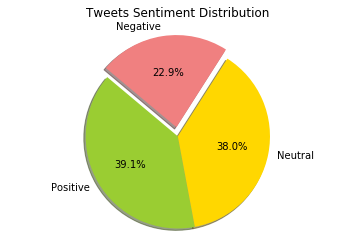

In [29]:
labels = 'Positive', 'Neutral', 'Negative'
colors = ['yellowgreen', 'gold', 'lightcoral']
explode = (0, 0, 0.1)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Tweets Sentiment Distribution')
plt.show()

In [31]:
classify_tweets_copy = classify_tweets.iloc[:, :].copy()
pred_data = classify_tweets_copy.drop(['tweet_text', 'location', 'lat_coord', 'lon_coord', 
                                       'lat_box_coord', 'lon_box_coord', 'sentiment'], axis=1)
# tweet_text	location	lat_coord	lon_coord	lat_box_coord	lon_box_coord	sentiment
pred_data = pred_data.groupby('screen_name').sum()

user_sentiment = []
for i in pred_data.polarity:
    if i > 0:
        user_sentiment.append('Positive')
    elif i == 0:
        user_sentiment.append('Neutral')
    elif i < 0:
        user_sentiment.append('Negative')

# print(len(user_sentiment))
ctr = collections.Counter(user_sentiment)
sizes = []
sizes_percent = []
for i in ctr.keys():
    sizes.append(ctr[i])
    percent_calc = round((float(ctr[i]) / float(sum(ctr.values())) * 100), 2)
    sizes_percent.append(percent_calc)
    print("The percentage of {} tweets : {}% (total number of tweets {})".format(i, round(percent_calc,2), ctr[i]))

The percentage of Positive tweets : 46.55% (total number of tweets 93184)
The percentage of Neutral tweets : 27.82% (total number of tweets 55679)
The percentage of Negative tweets : 25.63% (total number of tweets 51304)


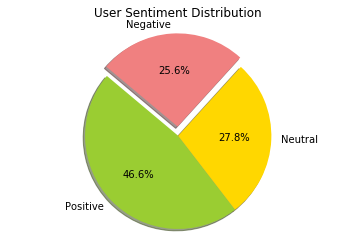

In [32]:
labels = 'Positive', 'Neutral', 'Negative'
colors = ['yellowgreen', 'gold', 'lightcoral']
explode = (0, 0, 0.1)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('User Sentiment Distribution')
plt.show()

Some insights can be interesting such as there is still positive number of opinions even after such an event for 'Facebook'.

**Note:** Apologies, due to lack of time I have been unable to merge the sentiment analysis with geo-spatial analysis. Also, I had initially planned to create my own NLP processor for the sentiment analysis but again had to use an already existing one (other caveats like managing stop words in the tweets etc. has not been performed).

## Geo-Spatial Analysis of the tweets

Even after collecting information from different sources within the JSON string accessing the Twitter API we were unable to track location of only 3.3 % of the tweets downloaded. This problem has been documented several places where researchers studying people behaviour have to take measured steps to sample the data available.

We are going to read from our data in the final tweets file and only plot those instances of tweets for which we have the coordinates.

* Standard Library for Geo-Spatial analysis
    * [mpl_toolkits.basemap](https://matplotlib.org/basemap/users/installing.html)
    
First we need to clean and get rid of the 'NAN' values and use the 1195 observations (tweets) which have a location, the dataframe will look something like below and we will leverage the **pandas read_csv** for the same.


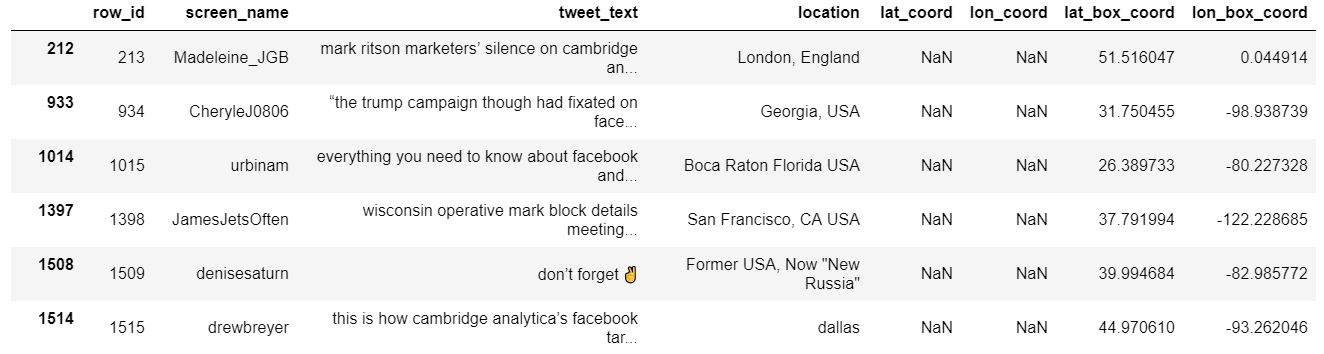

In [ ]:
building_map = pd.read_csv('facebook_related_tweets.csv')
# print(building_map.head(5))
print(building_map.shape)

In [ ]:
cleaned_building_map = building_map.dropna(subset = ['lat_box_coord', 'lon_box_coord'])
print(cleaned_building_map.shape)
# print(cleaned_building_map.head(5))

Now we need to convert the pandas dataframe into a list for the Latitude and Longitude. This is a requirement as the basemap uses list as data structures for its values. The following steps in the process are fairly simple:
    
   * Define the minimum and maximum lattude and longitude for the boundaries (with a margin if required)
   * create a Basemap: 
       * Center of the map
       * Resolution = full or high (others options like crude, low, intermediate)
       * Projection as 'Mercator' [other projections](https://matplotlib.org/basemap/users/mapsetup.html)
   * Draw Coastlines, Countries, States, Map boundaries and fill with colors in the map
   * Converting (lat & lon) to map projection coordinates
   * Plot the figure of a certain size by passing the parameters along with lat, long


Source: 
* [Reference 1](https://stackoverflow.com/questions/44488167/plotting-lat-long-points-using-basemap)
* [Reference 2](http://www.datadependence.com/2016/06/creating-map-visualisations-in-python/)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# lat = cleaned_building_map.lat_box_coord
location_data = cleaned_building_map.iloc[:, -2:].copy()
clean_location_data = pd.np.array(location_data)
lat = [i[0] for i in clean_location_data] 
lon =  [i[1] for i in clean_location_data] 
# print(len(lat), type(lat), type(lon))

In [ ]:
# determine range to print based on min, max lat and lon of the data
margin = 10 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

fig, ax = plt.subplots(figsize=(20,35))

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'f',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=5)
plt.show()
fig.savefig('my_graph_image.png')

### Will capture the below image:

We can clearly see high activity in countries affect by this event of cmabridge analytics namely **United States**, **UK**, **India**, **Singapore** and other locations as well.

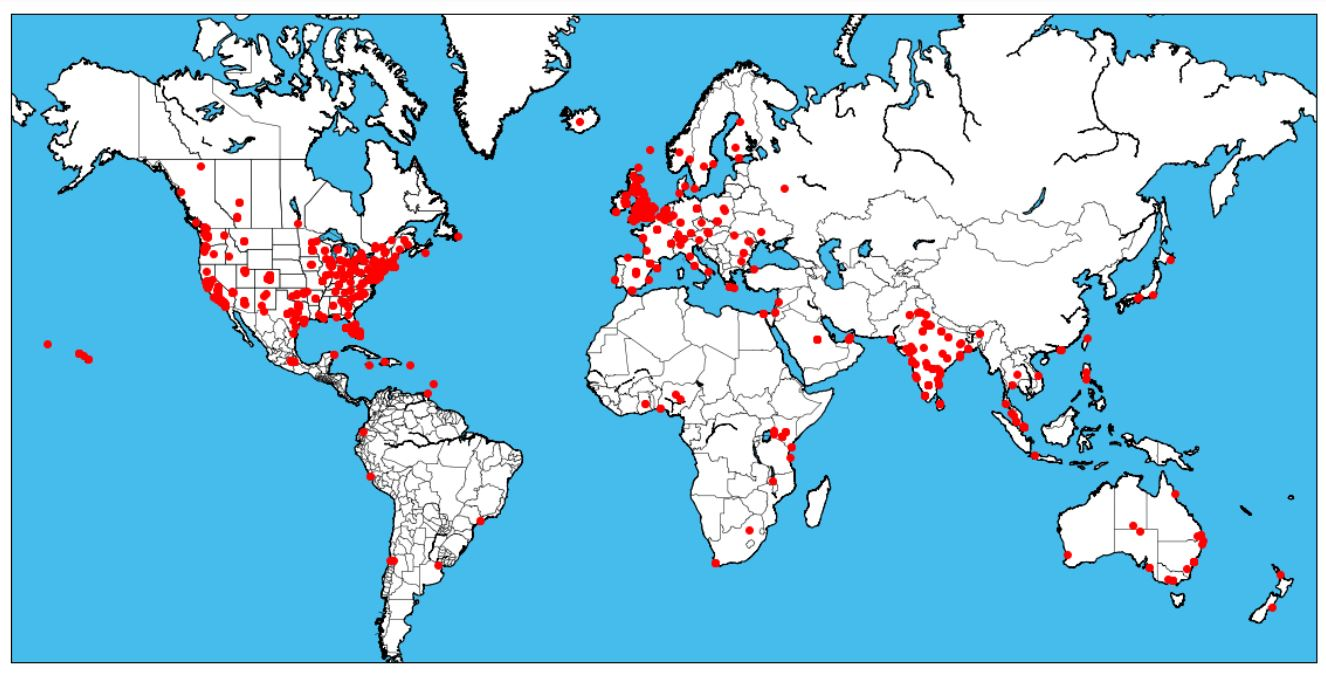

## Future Work

Major functions that are needed to be included:
* Create a geo-coder for the 'location' feild that we have saved (if we can get more coordinates to plot from users account location)
* Create our own text classifier
* Merge sentiment analysis with geo-spatial analysis